# <center> Final Project </center>
<center> SML 310 - Research Projects in Data Science </center> 
<center> Chesley Chan </center> 
<center> 11/25/2020 </center> 

# I. Data engineering
*   Dataset A: 9 Oral Histories
*   Dataset B: 6 Oral Histories

## Load and Preprocess Dataset A 

In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset A, Oral History 1

In [ ]:
# read in .txt file for data_a1
file_a1 = open("AlfredsBerzins_MN_A1.txt", "r")
data_a1 = file_a1.readlines()


In [ ]:
# preprocess data_a1
# start on 16th line to eliminate header
data_a1 = data_a1[16:]

In [ ]:
# explore: read first 10 lines
for x in data_a1[:10]:
  print(x)

NASH: Today is June 18, 1974. I am visiting with Mr. Alfreds Berzins who lives here in 

Manhattan. Mr. Berzins is the last living minister living in the free world of Free Latvia. Mr. 

Berzins was born in Latvia in the year 1899. Many things happened to him before he came to 

the United States in 1950 and he is going to tell us the story of how it came to be that he came to 

live in the United States.

BERZINS: My name is Alfreds Berzins. I am born in Latvia, 1899. My father was at that time 

forest inspector in Latvia, and so I was grown up in wooden area and therefore I still very much 

like and love countryside certainly much better than cities. I was educated in a small city, north 

part of Latvia, in high school when was proclaimed Latvian independence in October,

November 1918. started liberations war and I left school and took part for two years in



In [ ]:
# explore: print the first word of every line
for x in data_a1[:10]:
  print(x.split(' ')[0])

NASH:
Manhattan.
Berzins
the
live
BERZINS:
forest
like
part
November


In [ ]:
# explore: criteria for when someone is speaking; use first of every line as our cue; everytime first word ends with a colin, it's a dialogue 
for x in data_a1[:10]:
  is_header = (x.split(' ')[0][-1] == ':')
  print(x.split(' ')[0], is_header)



NASH: True
Manhattan. False
Berzins False
the False
live False
BERZINS: True
forest False
like False
part False
November False


In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a1 = []
for x in data_a1:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a1.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a1.append(temp_str)
newdata_a1 = newdata_a1[1:]

print(newdata_a1)

['NASH: Today is June 18, 1974. I am visiting with Mr. Alfreds Berzins who lives here in \nManhattan. Mr. Berzins is the last living minister living in the free world of Free Latvia. Mr. \nBerzins was born in Latvia in the year 1899. Many things happened to him before he came to \nthe United States in 1950 and he is going to tell us the story of how it came to be that he came to \nlive in the United States.\n', 'BERZINS: My name is Alfreds Berzins. I am born in Latvia, 1899. My father was at that time \nforest inspector in Latvia, and so I was grown up in wooden area and therefore I still very much \nlike and love countryside certainly much better than cities. I was educated in a small city, north \npart of Latvia, in high school when was proclaimed Latvian independence in October,\nNovember 1918. started liberations war and I left school and took part for two years in\nliberations war. After I studied and later was elected in Latvian Parliament in 1931 from the list \nof Farmers Union

In [ ]:
# explore new data_a1 that separates each new dialogue 
for x in newdata_a1[:10]:
  print(x)

NASH: Today is June 18, 1974. I am visiting with Mr. Alfreds Berzins who lives here in 
Manhattan. Mr. Berzins is the last living minister living in the free world of Free Latvia. Mr. 
Berzins was born in Latvia in the year 1899. Many things happened to him before he came to 
the United States in 1950 and he is going to tell us the story of how it came to be that he came to 
live in the United States.

BERZINS: My name is Alfreds Berzins. I am born in Latvia, 1899. My father was at that time 
forest inspector in Latvia, and so I was grown up in wooden area and therefore I still very much 
like and love countryside certainly much better than cities. I was educated in a small city, north 
part of Latvia, in high school when was proclaimed Latvian independence in October,
November 1918. started liberations war and I left school and took part for two years in
liberations war. After I studied and later was elected in Latvian Parliament in 1931 from the list 
of Farmers Union and in 1934 I w

In [ ]:
# explore: print the first word of the second person talking 
respondent = newdata_a1[1].split(' ')[0]
print(respondent)

BERZINS:


In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a1 = []
for x in newdata_a1:
  respondent = newdata_a1[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a1.append(temp_list)
    temp_list = x
  

respondent_newdata_a1.append(temp_list)
respondent_newdata_a1 = respondent_newdata_a1[1:]
print(respondent_newdata_a1)


['BERZINS: My name is Alfreds Berzins. I am born in Latvia, 1899. My father was at that time \nforest inspector in Latvia, and so I was grown up in wooden area and therefore I still very much \nlike and love countryside certainly much better than cities. I was educated in a small city, north \npart of Latvia, in high school when was proclaimed Latvian independence in October,\nNovember 1918. started liberations war and I left school and took part for two years in\nliberations war. After I studied and later was elected in Latvian Parliament in 1931 from the list \nof Farmers Union and in 1934 I was appointed as a Minister for Public and Social Affairs. On \nJune 17,1940, Communists took over all the country and I went underground.\n', 'BERZINS: Oh, it was a very sad day. At that day I met President in castle who was actually \nalready prisoner of (?), and he suggested when possible to leave the country. It was July 1, 1917. \nOn the same day I took farewell from my family and went to es

In [ ]:
# explore: respondent new data a1 where only second person talks
for x in respondent_newdata_a1[:10]:
  print(x)

BERZINS: My name is Alfreds Berzins. I am born in Latvia, 1899. My father was at that time 
forest inspector in Latvia, and so I was grown up in wooden area and therefore I still very much 
like and love countryside certainly much better than cities. I was educated in a small city, north 
part of Latvia, in high school when was proclaimed Latvian independence in October,
November 1918. started liberations war and I left school and took part for two years in
liberations war. After I studied and later was elected in Latvian Parliament in 1931 from the list 
of Farmers Union and in 1934 I was appointed as a Minister for Public and Social Affairs. On 
June 17,1940, Communists took over all the country and I went underground.

BERZINS: Oh, it was a very sad day. At that day I met President in castle who was actually 
already prisoner of (?), and he suggested when possible to leave the country. It was July 1, 1917. 
On the same day I took farewell from my family and went to estonia. It is ov

In [ ]:
text_a1 = TextBlob('''['BERZINS: My name is Alfreds Berzins. I am born in Latvia, 1899. My father was at that time \nforest inspector in Latvia, and so I was grown up in wooden area and therefore I still very much \nlike and love countryside certainly much better than cities. I was educated in a small city, north \npart of Latvia, in high school when was proclaimed Latvian independence in October,\nNovember 1918. started liberations war and I left school and took part for two years in\nliberations war. After I studied and later was elected in Latvian Parliament in 1931 from the list \nof Farmers Union and in 1934 I was appointed as a Minister for Public and Social Affairs. On \nJune 17,1940, Communists took over all the country and I went underground.\n', 'BERZINS: Oh, it was a very sad day. At that day I met President in castle who was actually \nalready prisoner of (?), and he suggested when possible to leave the country. It was July 1, 1917. \nOn the same day I took farewell from my family and went to estonia. It is over north neighbor, \nand with false documents I crossed the bay and went to (?).\n', 'BERZINS: I went by boat and it happens that this boat was not controlled by Soviets on the \nhigh sea, so on the start I came to Finland. I have in Finland many friends from Finnish Home \nGuard, while I was Chief of Latvian Home Guard.\n', "BERZINS: Not very much. I shortened my hairs, took glasses, didn't real g;asses, and I have a \nsmall mustache, and a little bit disguise, but not very much. And in Finland I spent only some \ntwenty days or so, then I went to Sweden and so I have no means to live because when I left\n\n\nLatvia I have nothing more than what I have on me. And I worked for some three months as \nfarmhand in one farm not far from Stockholm. and then I made connections with other \nambassadors in free world, in Switzerland, England. and I got from Switzerland money and \nfrom ambassador, (?), and so we decided to meet how many we are from (?) was one, out and \nLatvian ambassadors in Europe. So we met in first day, so December 1940 in Switzerland.\n", "BERZINS: Oh yes, I was the one who came out and the ambassador certainly was not in Latvia \nwhen Communists took over so I informed him about the situation in Latvia, how it is, and how \nhelpless it looks, everything, and what we can do, being in free world. And in Germany we \ncouldn't do that much because germans, like Russians, were interested to incorporate Baltic \ncountries in Germany like Russians did it, incorporating in Soviet Union. And a small nation\nwith two million, we were helpless to resist to one either to the other. And our hopes at that \ntime was as it is now, (?) allied forces, this means England, France, the States, and after the\nFirst World War my baby can again regain all the lost independence. So we decided to work in \ncertain directions to inform America, england, about our fate and what is going over country. \nAnd from Switzerland they went to Italy and on the way back to Sweden I met one gestapo man \nwho was arrested in '38 in Latvia. It happens in Berlin, and the Gestapo man recognized me \nand on the day I was arrested.\n", 'BERZINS: No, it was very strange meeting. He actually was living in Polsen and he came to \nBerlin to Gestapo. He was a close friend to Heydrich, the head of the Gestapo. As you \nremember, Heydrich who was killed in Czechoslovakia. And I, on the way from Switzerland, \nstopped for a few days in Berlin to get might be more information what is going in my country, \nand because at that time came out the German, both the Germans from Latvia, and the man \nwas both German too, by name of Kreuger. He recognized me and took revenge for he was \narrested in our country, Nazi Party was underground as Communist Party. And so as he was a \nleader of Nazi Party in our country, he was arrested and expelled from Latvia. And so I was \narrested, sent to police prison, Alexanderplatz, and after two months or so to concentration \ncamp Sachsenhousen and also Berlin. And so I was put in solitary confinement.\n', 'BERZINS: It was a very small cell, five steps by three steps. And the people there were some, \nabout three blocks, and it was inside big laager. and this laager was approximately twenty-six \nthousand inmates. And in Cellinbough it was laager prison, it was called the german\nCellinbough. Might be was some hundred fifty cells or so, and I was put in cell 44 and I had no \nmore name. I was owner of that cell 44.\n', "BERZINS: Oh, yes. The reason in my opinion was that the Germans didn't like that somebody \nin Latvia know that I am arrested,and because I was one of the government and the Latvians \nwhen the Nazis occupied Latvia, naturally with us what happens to such a person, what \nhappens to and then when it came out in Latvia that I am arrested, and I am concentration \ncamp, then they invited the story that I smuggled billions of diamonds and gold and so on, and\n\n\ntold them that I am arrested because of smuggling and such things. And they myself, they only \ninterrogated only once. And then I was accused as English and American spy, and I am coming \nto the Germany because of orders by American or England.\n", "BERZINS: No, there was no such thing as trials. (?) and (?) Gestapo, there is no such things. \nIt's simply accuse that I am dangerous for nazi interests and there fore I am kept in \nconcentration camp, so.\n", "BERZINS: And it was pretty humiliating and the first eleven months I have nothing to read, \nnothing to do. It was terrible and from four o'clock in the morning till eight o'clock I couldn't \neven lay down on a a bed, I couldn't walk or sit on small chair and nothing to do. (?) oh, the five \nsteps. And food was very bad. It was some two hundred fifty grams bad, bread, some vegetable \nsoup once a day, and at evening again, some soup, vegetable. No potatoes or such, but it was \ncarrot soup or something light, and vegetable greens during the summer and little bit salt, no \nfat at all. no sugar at all. And so it was not an easy life, but it was--we have no right to speak to \neach other even not to say good morning or so when we went out of that cells. And there was a \n(?) for example, Austrian prime minister. There was some Stalin (?) who was captured by\nBrionsks in the Cellinbough, there was a Polish bishop from Lutsk, there was Horace Seamer \nthe chairman of (?) from Romania, and the man who organized (?) out of Hitler in Munich in \nBeerskeller so-called, and there was some pretty interesting people.\n", 'BERZINS: No, I just know that they are. I saw almost all of them. We have fifteen minutes \neveryday for walk in this Cellinbough, it was a courtyard and only one at that time, and it \nhappened sometimes that I was brought over somewhere for something to do or so, then I saw \nthose people and in corridors the workers who clean the corridors was, in Germans they call \npeople (?) and here you call Jehovah Witnesses, it is so, it seems in English they are called.\nThey were very decent and good people. They rejected to go to army and therefore they ere put \nin concentration camp. So they were the cleaners of the corridors in laager prison and then \nthey told in that cell is this and that, so we were kept informed pretty well who is who with the \nhelp of those religious people who were in prison.\n', 'BERZINS: (?)\n', 'BERZINS: Son?\n', "BERZINS: Stalin's son, oh yes. \n", "BERZINS: He was medium size, dark, like caucasian should be and he was pretty depressed at \nthat time. And it is later was told stories that Stalin's son jumped on the fence and was killed. It \nwas one sure way to have suicide because the guards on the (?) was ordered to shoot everybody \nwho is coming close to the fence. And I read here being in New York, in New York Times that \nsomebody told the story that he was killed by guards in such way, it is not true. When I came\n\n\nout, shortly before the end of war, I was released Stalin's son was still in his cell 73. I was in cell \n44 and Stalin's son was in cell 73, and he never came out in the big laager so he could approach \nthe fence. He was kept very, very, closely guarded in his cell. In my opinion he's killed by\nSoviets because Soviets when they occupied Berlin, at the Sachsenhousen where I was thirty \nkilometers, some twenty miles from North Berlin. So that Sachsenhousen was captured by the \nReds. In my deepest opinion, he was liquidated by Stalin himself.\n", 'BERZINS: Yes, there was probably no reason to liquidate or as we say or to kill because it \nseems to me that they kept me isolated so long as the war will be to end, and the (?) Baltic \ncountries, firm in the hands of Nazis and probably then I will be released, if I will be still alive \nat that time.\n', "BERZINS: Oh, it is, the first trick is six months are very difficult, very hard. We are absolutely \nisolated and nothing to do. And some of those people really lost their minds, and sometimes \nwhen it happens often when came evening, and when we heard somebody's shouting and\nsomeone very wild voice, it was like animals, it is not like human voice more. And is demolition \nof that cell, there is nothing to demolish it was iron bed and one small chair and that was all, \nbut with a small wooden chair they are beating the doors or windows or what they can do. And \nwhen they didn't stop this shouting and so they was ten o'clock, eleven o'clock in the evening \nbrought to the crematory, killed and that was the end. But, how I managed I built in my \nfantasy, fantasy (?) outside concentration camp, and I thought about my youth, about my farm, \nI had a farm in Latvia, when I will come out what I will do there in this farm, and about my \nfamily because I didn't know at that time that my family was deported to Siberia. And so I am \nalways and always, I live just in this fantasy, not to say that I am here arrested or so, and that \nhelped a great deal.\n", 'BERZINS: Yes, it was because I do not feel, sometimes I was so, in my fantasy so deep that I \nsay, oh, now I have to go and do this and this, and I step some few steps the iron doors, and \nthen was reality and very sad reality. And after in later months, months they give me first \neducation literature,it was Nazi literature like (?) written by Rosenberg, one foolish book.\n', "BERZINS: In English it would be Meters of the Twentieth Century. And before I read one book \nwas written by Austen Chamberlain and this was a very fundamental book, and Rosenebrg \nwrote in the art as he, Chamberlain. It was Chamberlain lived in Germany and an Englishman, \nbut in Nineteenth Century Hero. And he was anti-Jewish Chamberlain and anti-Catholic, and \nRosenberg wrote the same book in the same way, but it was written be Chamberlain with sense, \nyou can accept or not accept, it's another question, but it was with some logic written. But with \nNazi, Rosenberg (?) it was a foolish book, was no sense to read, I mean, only when you are in\njail you can read such a book, not when you are free. So and then later I got, even history of the \nUnited States I read.\n", "BERZINS: I don't remember by whom written, Constitution and history. It was a pretty heavy \nbook, might be some three or four hundred thousand pages. It was my first knowledge about \nthe United States. It was in German because at that time I couldn't speak English, not one\nsingle word. And it was by some German historian or probably translated from English, but \nthat was this book. Then was about philosophy, adventure books and such. That was in \nSachsenhousen, I was told there was a pretty large library, some twenty, thirty thousand books \nprobably because every people who were arrested that a lot of them was intelligent people.\nThere were professors, lawyers, doctors and so they took with them some books when they \nwere arrested. And when they came to the laager, the camp, the books was taken away and put, \nif they was not anti-Nazi books certainly, they was in the laager library. So every week I could \nread one book, but later when I was already some two years or so in laager they were more \ngenerous and gave me some two or three books per week to read. And when one had a book to \nread then you are already mentally balanced. There is no more trouble to lose the sense \nbecause then you have to argue with yourself right or agree and to learn, and then it was every \nthing okay already, but before this eleven months it was very, very, very unpleasant. And I \nremember it was the most unpleasant feeling this time. And so it was. And then when Germany \nwas close to collapse I was released.\n", 'BERZINS: From my country? \n', 'BERZINS: Well, yes. The same after one year or so, I could exchange one letter per month with \nsomebody. So my relatives or my family was not, but some relatives and friends. They would \nsend some letters and they informed what happened in countries, and even one day I was \ncalled to what they call in German, it was Polish optilong, it is political division, and it was all \nthis bad when they was called to this political division and it was bad. I was interrogated and \nbeaten and so, and then suddenly they brought in two people, and I looked at them, I couldn\'t \nrecognize. It was two friends from Latvia, and I was so tired that I really looked at them and the \nasked, "Would you not recognize me?" And then I said, "Yes, certainly, how you are here." And \nso then one day came, one man from Gestapo and offered me the way out. And he say, "Well, \nyou can be free tomorrow, but then you have to go Latvia," and at that time Hitler organized \nLatvian legion, Latvian young people would serve in the German army, and I have to take all \nthe propaganda work and naturally I could not accept this. And why, more is one reason, one, I \nthought they asked me were officer in Latvian Army, I say, "Yes, I was. In Liberations Army I \nwas an officer." And now you will be again officer. and I say, "Yes, in Latvian uniform?" "No, in \nSS uniform." I say, "No, I would only put on the Latvian officer\'s uniform or not at all, and \nsecondly, what I cannot accept, it was I could not tell the young Latvians go to German war and \nto die, not for Latvia, but to die for Nazi regime. Maybe I will be free, maybe I will stay alive, \nbut that all my life I will live with consciousness that I for my freedom I saved maybe hundreds \nand hundreds of lives of young Latvians. And therefore I say, no. And it was one man, pretty \nhonest I mean, and he say, "But, this is the only way to come out of this hell." And I ask him, \n"Well, it seems to me that you are thinking good about me, but I would ask you a very straight \nquestion, would you change this horror and this prison dress for an SS uniform?" After a short \nwhile he say, very slowly, "No." And say, "not me too." So was possibility to come out. I didn\'t\n\n\nuse this possibility. And then in at that time after, might be some five or six months, he came \nagain and offered me to work in Goebel\'s ministry. and I say, "Well, why not, if I will be a \ndoorman I will do it, but not other job." And then it was kept again.\n', 'BERZINS: I was unhappy because I have a feeling that when I have to reject this Nazi offers \nthey could be more cruel to me or to take the books away or something to repress me for\nrejecting. It didn\'t happen I have to tell you, but it could happen. And therefore I told this man, \nhis name was Volensky, and he was one of Baltic German family from my native country, and \nhe could speak Latvian even. And so I say I am very unhappy that I have to reject your \nproposals, but I can tell you that I will never accept no one work which will be against the\ninterest of my people, never in Secret Service I will work, and never I would put on other\nuniform as Latvian uniform. (?) if you have to offer me some job which is connected with one \nor other of that then the problem, I will reject already in advance. I will not do it. And then they \ndidn\'t come to me more. And only on the end when Berlin was already heavy bombarded and \nthen came the same,told me well, no we will release you, but you have to stay in Berlin and you \ncannot go to Latvia. And every week you have to come to police commissariat and in person \nshow that you are in Berlin. I say, "Okay." And then they gave me work in one insurance \ncompany for two hundred fifty German Marks, two hundred German Marks you can buy food, \nnothing more.\n', 'BERZINS: At that time? When I was in, I rented my small room, of a former ambassador who \nwas n Berlin before the Communists took over, it was in Berlin too. And he helped me a little \nbit, relieved to get mein small room and so, and a little bit more food. and so I managed, but it \nwas not a longtime. Then the Gestapo was bombarded, bombarded by Americans.\n', "BERZINS: It was '44. It was short before the end. And then Gestapo fled from Berlin to \nsomewhere to South Germany. And when it was over I left Berlin too because the Red Army, \ntheir tanks might be already some thirty, fort miles from Berlin on order. And then I left Berlin \nand went to with, from my ministry there was people in one village not far from Vienna, and \nthen they brought me there my people and I lived in this village when the Americans came in \nApril.\n", 'BERZINS: Oh, yes. That was from Riga film. There was in my ministry was one division of film, \nand there was some might be forty, fifty people with the families was therein this village and in \nnext village. And so they accumulated, they got some papers so I could leave Berlin and then it \nwas good. They took care about me and about food, about everything.\n', 'BERZINS: Yes, and then came the Americans in April, and life changed. \n', 'BERZINS: (?)\n', 'BERZINS: Oh, Latvians when I went to this village--then I was again-and then I started when \nAmericans came in, then I started active work again in Latvian communities because at that \ntime in Germany was Latvian refugees, in West Germany might be some eighty, ninety \nthousand Latvians who fled from Communism. They were in West Germany and (?) camps, \nand there was thousands of Latvians who were in Latvian religion who fled over to American\nand to English Army and was captured with them and later released. And there was thousands \nand thousand of people, young people, who were brought from Latvia to work in German \nfactories. And now they all were free. And then we were put there by American Army and \nEnglish Army in refugee camps. And we got some food to eat and in some, it was in German\nArmy barracks or somewhere else in, we were some accommodated in small rooms, three, four, \nfive, and people. It was again, a bad life, but it was not prison life more, we were free and we \ncan move out. We organized our schools for young people, we even managed to organized our \nuniversity in most part of Hamburg.\n', "BERZINS: The community lasted from 1945 to '49. Almost four years. And then was started\nimmigration. First to Australia and then to Canada, England, and at last here to the States. And \ntheir greatest group came to the States around forty, right thousand. To Australia some twenty \nthousand, and in England there are some fourteen thousand, and in West Germany the old \npeople who could not immigrate were no accepted because of, or they have too bad clothes or \nsomething like, they are still in or mostly died out in those years, but they were let back in \nGermany. And so I came in by ship, I came here to the United States in august, 1950.\n", 'BERZINS: It was general Taylor. You know, during the war was built these transport ships and \nthey was named by general, like General Black, General Taylor and so on and so, and General \n(?) and it happens that I came with General Taylor here to this country. And again, I am\nstarting to work here.\n', 'BERZINS: Oh, it was pretty nice. The first evening it was oh, it was dinner. On the ship it was \nchicken, it was some oranges and a little bit water, and so for a long time we have no chickens. \nBut, on the high sea I am not sailor, I was sick so I was more in bed when the sea was high, and \nI was in bed. The first evening and the first meal I remember, it was very tasty and it was white \nbread not as we used to eat, but the soft bread. In Europe we do not know this soft bread which \nis here (?). But, anyway, it was nice. We came over and then I was for a short time worked \nsomewhere in Summit in Jersey.\n', 'BERZINS: Oh, then came my friends who was my foreign sponsor, who was already one year \nher. He left \'49, and was working he was an engineer. And he some chemistry factory in \nSummit, in Jersey have job, and already bought small house during this one year. And the \nLatvians are very diligent people, it might be it this joke, but if it is joke that is a good one.\nWhen you have to swear the citizenship before the judge, the judge you ask him some questions \nabout American history, and the judge asked the Latvian how many houses are, he say,"Well it \nis Senate, it is Congress, and he could not the third one remember, and he said, the third house\n\n\nis my own." And the judge said, "So, in short time you get whatever your house, then you are a \ngood citizen. Everything is okay." And then I started to work in Radio Free Europe, it was \'51 \nalready.\n', 'BERZINS: In Radio Free Europe it is one American organization to help at that time, in 1950, to \nhelp liberate oppressed countries of the Soviets. And this was organized in many divisions, it \nwas radio broadcastings for five countries, to five countries and then was exile division where \nwe had nine countries were united. First were organized national committee like Latvia and \nEstonian, Lithuanian, Baltic countries, and Polish, Hungarian, Romanian, Bulgarian, and not \nYugoslavia, but--\n', 'BERZINS: Yes, nine countries, Albanians, small friends. And later these all nine national \ncommittees were united in one organization assembly of captive European Nations. And we got \nsupport from American organizations, so we could rent small rooms for our committees, and \nwe could even publish in our native languages some magazines. So we published Baltic Review, \nall through Baltic countries by support of Americans and it was many years we worked with \nand to inform American society and American. And even in Spanish we publish the same, the \n(?) Baltic of the Baltic Review for South American countries, so we were pretty active, and \nmyself too. And now we all got older and many passed away of my colleagues in Latvian\ncommittee. And actually, on the beginning we were seven and now we are from the seven still \ntwo alive. Seven during those years died. And now since some two years Americans stopped \nhelp to the committee. It seems to me that now when the policy is on decline is the good war, \nand might be they feel that could be some disturbance in policy between Russia and the United \nStates, but Nixon was very generous. And when this no help for our organization stopped and \nhere they made a fund available, one million eight hundred thousand dollars for annuity \npayment. So all who were in ACN, in Assembly of Captive European Nations, all received\nbesides social security--the members of this Assembly of Captive European Nations from this \nfund are receiving monthly three hundred and fifty dollars support.\n', 'BERZINS: It was in my--if I can remember it was approximately at that time some fifty-eight. \n', "BERZINS: This annuity payment before two years. It is now seventyfour to seventy-two. But \nstill, we by our own means we are keeping the committee alive and in much, much smaller \nwork we can do, we cannot publish our magazines but still we have, we are renting one room, \nwe have a secretary general for ACN, one Pole, Mr. Gradomsky an experience man. He is\ncoming a few days a week. And we are gathering money, some Americans are helping us, all of \nour own organizations are helping us, so we are keeping still as alive and well. Writing memos \nto Congressmen, to Senators, visiting them who are friendly. We are presenting our views \nconcerning coexistence with Soviets. I can tell not only myself, when I (?) the two faces of \ncoexistence it means that I am writing that Soviets have two faces. One is the smiling face and \nthe other is a brutal face, and I do not believe that the Soviets can be honest and would be \nhonest ever keeping promise or--because I know Communism from 1917 when Communists \ncame to power, I was school boy, I was arrested first time by Communists because I was a \nleader at that time in National Youth Organization in this Volka in small town where I was in\n\n\nhigh school. And I know all brutality and there is nothing is changed. And the aims have not \nchanged, and only the tactic changed. And Lenin (?) was a diabolical man, but was a very \nshrewd man, and he knows the nature of capitalists very well. He started not only being in exile \nsome fifteen or more years when he escaped from Czarist Russia, then he spend the time in \nFrance, in Switzerland, England, in West Europe, in Germany. and he started very carefully \ncapitalists, and when Communists come took over, then he very openly told to his comrades \nthat we cannot with our knowledge and with our means to build the Communism in our \ncountry, but the capitalists will help us to do it, with their money, with their knowledge because \nthey would, we will promise big gain, big money, for the help and they through this money will \ndo what we need to be done. and all this time as you know, all these fifty years as Communists \n(?) exactly in the way that Lenin, it was at that time predicted it is the capitalists are doing. And \nnow is the same. The Communists are asking Brezhnev, and asking to help with American or \nGerman or some knowledge the complicated computers which (?) themselves cannot do. (?) \nsold to Soviets and then when the Soviets have few of those very complicated machinery for \nwhich Americans wasted years and money and millions and millions, the Soviets are buying for \ntoken and building now themself. And so it is done and it will be continued as long as Soviets \nwill collapse or capitalists will collapse. I don't know which side, but the world does not look \nsweet today. Not because there is no war. It is hot war is one and sometimes maybe not so \ndangerous as this underground war which is carrying out every day by Soviets against America, \nbut it you have to speakings, smiling with Nixon and his agents are working here in the United \nStates to destroy America. This is the way the Soviets are operating. And personally, they have\nin that respect great experience, and I believe that Nixon do not trust Soviets because when he \ncame before, what is a year back from the Soviet Union when he first visited, he gave interview \nin World Report, in this magazine, and then he say very clearly the Soviets didn't change in \nheart. They changed only in mind because they need some kind of cooperation with the \nWestern World to improve the living standard in the Soviet Union and therefore they are\nlooking the help and trying to probably to give some concessions to the Western World, and it is \ngood that the President does not believe to the partners whom he will bargain in very short time \nnow, in 27 June, he will go to Moscow again, and I mean the same Kissinger. I read some of his \nbooks and he is still warned, he was not at that time here in as I believe their foreign\npolicy, but he was at that time professor at Harvard. And he wrote in his books that the greater \ndanger still is the Soviet Union, and I do not think that by experience he has now being the \nhead of Department of State, that he has changed his mind. I am sure he has a much deeper \nlook in Soviet's methods than he has at that time, but this world is not very big and this very \ndestructive forces which is atom bombs, it is dangerous for every country and it will be suicide \nif they would not try to find, and enemy knowing, knowing that is an enemy, to find some \naccommodation to, if not to avoid, to prevent this destruction of the world. And politically it \nshould be done in that way. We don't like any step which is coming closer between America \nbecause now in Finland, as you remember, and the Soviets insist that to come, that (?) five\nnations together and security conference and cooperations conference, that what Soviets would \nhave to achieve to recognize the existing borders which was by Soviets made by force with their \narmy and included all (?) countries, three Baltic countries, and the so-called Satellite countries, \nsome hundred million, and then it is accepted by the United States that this--we lose the hopes \nof liberation. Therefore, we are not happy, but we cannot change American policies, (?). And if \nwe were maybe in here as leaders of America, we would do the same way. So we have it on that \nstand and to accept things which are for us dangerous, but which we cannot change.\n\n\n", "BERZINS: Yes, it is how far I know, the greatest percentage of all Jews who are born or \neducated here from every refugee group, is Latvians, they are I mean already some seven, eight \nhundred professors, Latvians, in universities and high schools, in this relatively short time \nfrom '50 to '74, it is twenty-four years only and well-educated people, some of them are\nscientists, don't think very much about politics, but there are very active groups who make his \ndoctorates and so, Ph.D. as you call it. In Europe it is Doctor of Science, and here many of them \nmake Ph.D. and still are active in Latvian community work. We have some national schools, \nthe church schools, Sunday schools, for small children, and that church schools is by almost \nevery community and there are not only the former school teachers from Latvia, but now who \nare graduated here and is working in american schools as school teachers they are working in \nLatvian school and teaching Latvian language and Latvian history and such things which the \nchildren couldn't learn just only for parents at home. So we are keeping our community very \nactive and I am very proud that the Latvians probably are the only minority group here in this \ncountry which are united in one organization. We have American-Latvian Association, and in \nthis American-Latvian Association are united all Latvians, churches and schools and various\nkinds of private organizations are members of this organization. And the same is Australia, in \nEngland, in Germany, there is local organizations. And all of those organizations in Free World \nare organized in one common organization so-called The Association of Free Latvians in the \nFree World.\n", 'BERZINS: It seems to me that the leaders, very much depends from leaders because the people \nin communities are not all active. There are a few active and those, when we came over to this \ncountry it was a lot of educated people. The lawyers and professors were working as janitors \nhere in New York and other places because of lack of knowledge of English and the lawyer what \nhe could do. He cannot be a lawyer here without graduation and license from American Bar \nAssociation. And therefore, the people worked in factories and were very intelligent people.\nSome doctors. For example, my wife from graduated in (?) and second time was graduated in \nNYU here in New York. Have to start three years more to simply get license and then to work. \nAnd this elite of Latvians who came to this country were not only well-educated people, but \npolitically educated too, and they understood that if we would like to achieve something, we \nhave to keep together, we have to support each other, and we have our political life to organize \ntogether, and so we organized not only in between us, but some of out active groups, younger \npeople, now are in those parties in the Republican Party and Democratic Party, and our people \nare trying who are Republicans through the Republican Party impressed, and express through \nthis party our interests, our national interests here in this country and out national interests in \nour native country.\n', 'BERZINS: American-Latvians, no, we are American-Latvians, and I say I think there are very \nfew. I am still Latvian citizen, I am not American citizen, but it is difficult to say, but it seems to \nme that Latvians are more Republicans, and that is very easy to understand. In Democrats are \nmore liberals who are for understanding with the Soviets. We consider that Republicans are \nstronger against Communism and so we are all anti-Communism as is very understandable. So\n\n\nwe are, our people are looking for those, or say the Congress and so, very often not so much \nwho belongs to one or the other party, but who is against Communism. For example, my people \nlike much more Jackson, Democrat, as some republicans, something like because Jackson is \nmore anti-Communist.\n', 'BERZINS: Yes, Senator Jackson. And so therefore we are for Jackson and if there will be \nelections that even republicans in his Oregon will vote for Jackson. That is my opinion.\n', 'BERZINS: That could be a problem, but we are trying to balance somehow, the balance that we \nare not only in one party, we are in, the young people are in both parties and we are not trying \nto antagonize one or the other or so. We dislike, for example, all captive people. Assembly of \nCaptive people we visited every year tens of tens of senators, (?) but never we approach\nFullbright because we know Fullbright is our enemy and they have nothing to do with this man. \nFullbright is against us, against Radio Free Europe, against political activities which might be \nanti-Soviet, but it was not question of Democrat or Republican. It was a question of a person, \nFullbright. And you can believe that many, many of our people received this news that\nFullbright was no more candidate with great satisfaction. It is good or bad, that is other \nquestion. But the people, as you know, are living with some sentiment and sometimes maybe\nnot so much logic, but with their own feelings. And we have, and we share (?) for twenty years, \nin ACN, assembly of Captive Nations. We know who our friends in Capitol and we know who \nare our enemies.\n', 'BERZINS: I am still a member of General Committee. General Committee consists od one \nmember, one delegate from each national committee, so we are nine national committees \nunited in Assembly of Captive European Nations and I am a delegate from Latvian National \nCommittee, so I am still active and I hope for years to come I will be.\n', 'BERZINS: Which countries you mean?\n', 'BERZINS: It is still from Estonia, Latvia, Lithuania, Poland Hungary, Romania, Bulgaria, \nCzechoslovakia, and Albania., so nine countries still are trying to keep us together and just now \nwe prepared a (?) end of this month our people who are living in Washington will visit some\ngroup of senators to express out opinion concerning low approachment with the Soviets. \n', "BERZINS: No. As you know, there is still iron casting, and from Poland and from Hungary, so \ncan come out, some people, but not from Russia proper, from Baltic countries, and they are, \nBaltic countries by Russians are considered as dangerous countries because we were free and \nwe are not forgotten our freedom and we are doing everything to be free again, and the Jews in \nLatvia, disregarding the schooling and teaching of Communism and so. The Jews in Latvia are\n\n\nvery patriotic, and from Latvia came out very few, who jumped from ships and so, but so-called \nimmigrants like from Italy and so, it doesn't exist. So it is our life here and the end I would like \nto express my thanks to American people and to government who in very, very difficult time \nwhen we were homeless and helpless and hopeless in Germany, in these camps, gave us \nopportunity to come here and I know all countries because I visited my people in australia, \nNew Zealand, England, Sweden, everywhere in this world that Latvians are living, I visited all \nof them. I know the life, the living standard, and the life and so, and it seems Latvians who are \nin the States can be considered the most happy because there is no discrimination, not\nnationality discrimination and not job discrimination. We are diligent people and are very well \nregarded. In fact, everywhere, everywhere where the Latvians are working. There is not more \nLatvians (?), like Italians who may be generations and generations are working as hand \nworkers, some (?), there are no more Latvians who they started with janitors. There are no \nmore Latvian janitors. They are all skilled workers in factories or they have already achieved \nwhat they are working in banks and financial institutions as clerks, but the Latvians are well- \nto-do people here in this country and that is because they have no discrimination here, and I \nam not expressing in that moment only my own feelings, but I can tell you generally about all \nLatvians who are living the United States, and we are more or less sixty thousand now\nLatvians. They came from other countries too, from England, come over, and from germany, \nlater years. And everybody have already established his life and his place here and very few \nLatvians you can read the names in criminal offenses. Very, very few young people, (?) doing \nsome foolishness and very few Latvians you can find that (?) between extremists or right or left \nextremists, and there are not beatniks and peaceniks between Latvians, and if then very, very \nfew. And they are no more considered as Latvians. So even from families they are expelled.\nWhen they are, I know one very nice family, old friends, and his son fell in love with a girl who \nwas once a kind of peacenik and she took part in demonstrations in Washington before years \nand he is expelled from all Latvian society, even parents don't like know about him. So we are \npretty strong against such people who are disturbing the life here and our life as well. We are \nnot soft with Communists or friendly to Communists with those people. We consider still it is a \ndanger and do you don't know Communism, you don't know what does it mean. We know. We \ntraveled thousands and thousands kilometers with bleeding hearts from our country and we \nwould like to be back in our country and to live. It might be poorer life as here. We would start \nfrom beginning in our country, so deep we love our country. But we know America is the last \nplace where to escape from Communism. There is no more other place and therefore we like \nthat America, to see America strong, america healthy, America rich, and America happy \nbecause it is the last bastille for freedom against Communism. Thank you for coming to see me.\n"]
''')

### Dataset A, Oral History 2

In [ ]:
# read in .txt file for data_a1
file_a2 = open("AnneHanneloreGasner_HD_A2.txt", "r")
data_a2 = file_a2.readlines()
print(data_a2)


['\n', 'Interview of Anne Hannelore Gasner by Harvey Dixon, August 5, \n', '1980\n', 'ANNE HANNELORE GASNER\n', 'NPS-122\n', 'ANNE HANNELORE GASNER \n', 'BIRTH DATE: UNKNOWN \n', 'INTERVIEW DATE: AUGUST 5, 1980 \n', 'RUNNING TIME:\n', 'INTERVIEWER: HARVEY DIXON \n', 'RECORDING ENGINEER: UNKNOWN \n', 'INTERVIEW LOCATION: NEW YORK CITY, NY\n', 'TRANSCRIPT ORIGINALLY PREPARED BY: LINDA JANTZEN, DATE UNKNOWN \n', 'TRANSCRIPT RECONCEIVED BY: CHICK LEMONICK, 5/1995\n', 'GERMANY, 1938\n', 'AGE 10\n', "DIXON: Today is August 5, 1980. I'm visiting with Anne Gasner who lives in Castle Village \n", 'which is on Cabrini Boulevard and 181st Street which is on the very upper west side of \n', 'Manhattan. I guess the best way to begin is to ask when you immigrated to the United States. \n', 'Did you come through Ellis Island?\n', 'GASNER: No. I did not.\n', 'DIXON: When did you actually come and--\n', 'GASNER: We landed in the United States, June 24, 1938. \n', 'DIXON: Right. And where did you land, 

In [ ]:
# preprocess data_a2
# start on 16th line to eliminate header
data_a2 = data_a2[16:]


In [ ]:
# explore: read first 10 lines
for x in data_a2[:10]:
  print(x)

DIXON: Today is August 5, 1980. I'm visiting with Anne Gasner who lives in Castle Village 

which is on Cabrini Boulevard and 181st Street which is on the very upper west side of 

Manhattan. I guess the best way to begin is to ask when you immigrated to the United States. 

Did you come through Ellis Island?

GASNER: No. I did not.

DIXON: When did you actually come and--

GASNER: We landed in the United States, June 24, 1938. 

DIXON: Right. And where did you land, I mean--

GASNER: In Hoboken, a horrible place to land, terrible introduction (chuckle) to the country. 

DIXON: You came to Hoboken, you came by boat or you came by plane or--



In [ ]:
# explore: print the first word of every line
for x in data_a2[:10]:
  print(x.split(' ')[0])

DIXON:
which
Manhattan.
Did
GASNER:
DIXON:
GASNER:
DIXON:
GASNER:
DIXON:


In [ ]:
# explore: criteria for when someone is speaking; use first of every line as our cue; everytime first word ends with a colin, it's a dialogue 
for x in data_a2[:10]:
  is_header = (x.split(' ')[0][-1] == ':')
  print(x.split(' ')[0], is_header)



DIXON: True
which False
Manhattan. False
Did False
GASNER: True
DIXON: True
GASNER: True
DIXON: True
GASNER: True
DIXON: True


In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a2 = []
for x in data_a2:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a2.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a2.append(temp_str)
newdata_a2 = newdata_a2[1:]

print(newdata_a2)

["DIXON: Today is August 5, 1980. I'm visiting with Anne Gasner who lives in Castle Village \nwhich is on Cabrini Boulevard and 181st Street which is on the very upper west side of \nManhattan. I guess the best way to begin is to ask when you immigrated to the United States. \nDid you come through Ellis Island?\n", 'GASNER: No. I did not.\n', 'DIXON: When did you actually come and--\n', 'GASNER: We landed in the United States, June 24, 1938. \n', 'DIXON: Right. And where did you land, I mean--\n', 'GASNER: In Hoboken, a horrible place to land, terrible introduction (chuckle) to the country. \n', 'DIXON: You came to Hoboken, you came by boat or you came by plane or--\n', 'GASNER: We came by boat on the S.S. Statendam.\n', 'DIXON: Which was, do you remember steam, the line company? \n', 'GASNER: Yes, it was the Dutch Line. Holland American Line.\n', 'DIXON: Right.\n', "GASNER: It was not the present Statendam that boat sank and it's been replaced.\n", "DIXON: That's interesting because t

In [ ]:
# explore new data_a2 that separates each new dialogue 
for x in newdata_a2[:10]:
  print(x)

DIXON: Today is August 5, 1980. I'm visiting with Anne Gasner who lives in Castle Village 
which is on Cabrini Boulevard and 181st Street which is on the very upper west side of 
Manhattan. I guess the best way to begin is to ask when you immigrated to the United States. 
Did you come through Ellis Island?

GASNER: No. I did not.

DIXON: When did you actually come and--

GASNER: We landed in the United States, June 24, 1938. 

DIXON: Right. And where did you land, I mean--

GASNER: In Hoboken, a horrible place to land, terrible introduction (chuckle) to the country. 

DIXON: You came to Hoboken, you came by boat or you came by plane or--

GASNER: We came by boat on the S.S. Statendam.

DIXON: Which was, do you remember steam, the line company? 

GASNER: Yes, it was the Dutch Line. Holland American Line.



In [ ]:
# explore: print the first word of the second person talking 
respondent = newdata_a2[1].split(' ')[0]
print(respondent)

GASNER:


In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a2 = []
for x in newdata_a2:
  respondent = newdata_a2[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a2.append(temp_list)
    temp_list = x
  

respondent_newdata_a2.append(temp_list)
respondent_newdata_a2 = respondent_newdata_a2[1:]
print(respondent_newdata_a2)


['GASNER: No. I did not.\n', 'GASNER: We landed in the United States, June 24, 1938. \n', 'GASNER: In Hoboken, a horrible place to land, terrible introduction (chuckle) to the country. \n', 'GASNER: We came by boat on the S.S. Statendam.\n', 'GASNER: Yes, it was the Dutch Line. Holland American Line.\n', "GASNER: It was not the present Statendam that boat sank and it's been replaced.\n", 'GASNER: Oh, really!\n', 'GASNER: Of course, I had a different name then.\n', 'GASNER: Totally different name.\n\n\n', 'GASNER: Not only my maiden name, Anne is not my name. \n', "GASNER: Okay. My German name is Hannelore, H-A-N-N-E-L-O-R-E. That was the legal \nname that was given to me when I was born, although my family always called me Henni. It \nwas a name that was never used except on papers. In fact, I think it's on my German report \ncards which I still have. But I believe that on a formal record as a ship's passenger list, I \nprobably would be Hannelore on that.\n", 'GASNER: I was born in Ge

In [ ]:
# explore: respondent new data a1 where only second person talks
for x in respondent_newdata_a2[:10]:
  print(x)

GASNER: No. I did not.

GASNER: We landed in the United States, June 24, 1938. 

GASNER: In Hoboken, a horrible place to land, terrible introduction (chuckle) to the country. 

GASNER: We came by boat on the S.S. Statendam.

GASNER: Yes, it was the Dutch Line. Holland American Line.

GASNER: It was not the present Statendam that boat sank and it's been replaced.

GASNER: Oh, really!

GASNER: Of course, I had a different name then.

GASNER: Totally different name.



GASNER: Not only my maiden name, Anne is not my name. 



In [ ]:
text_a2 = TextBlob('''['GASNER: No. I did not.\n', 'GASNER: We landed in the United States, June 24, 1938. \n', 'GASNER: In Hoboken, a horrible place to land, terrible introduction (chuckle) to the country. \n', 'GASNER: We came by boat on the S.S. Statendam.\n', 'GASNER: Yes, it was the Dutch Line. Holland American Line.\n', "GASNER: It was not the present Statendam that boat sank and it's been replaced.\n", 'GASNER: Oh, really!\n', 'GASNER: Of course, I had a different name then.\n', 'GASNER: Totally different name.\n\n\n', 'GASNER: Not only my maiden name, Anne is not my name. \n', "GASNER: Okay. My German name is Hannelore, H-A-N-N-E-L-O-R-E. That was the legal \nname that was given to me when I was born, although my family always called me Henni. It \nwas a name that was never used except on papers. In fact, I think it's on my German report \ncards which I still have. But I believe that on a formal record as a ship's passenger list, I \nprobably would be Hannelore on that.\n", 'GASNER: I was born in Germany, but I am not a German national because my parents were \nborn in Poland, although they came here as mall children. Nevertheless, they were Polish\ncitizens. And I went on the same quota as they because I never formally became a German\ncitizen. In Germany you were not automatically a citizen of the country although you were born \nthere.\n', "GASNER: We went from Berlin to Rotterdam. My mother, my brother, myself, my aunt and my \ncousin, and in Rotterdam we rendezvoused with my father and my father's brother, my uncle. \nThey had left sooner, I believe in order to avoid suspicion of departure. I'm not quite sure, but \nthere was something clandestine about the whole thing. They left before we did, and when we \nmet each other in Rotterdam and from there we went to the United States on that boat.\n", 'GASNER: The voyage? It was eight days. We should have landed the night before, but there \nwas a very heavy fog so we stayed on board an extra night.\n', 'GASNER: Yes. My mother woke me up in the morning and that was my very first sight of \ncountry and very memorable. Everyone was standing on deck to see the Statue of Liberty. It \nwas a very meaningful experience.\n', 'GASNER: It was a regular passenger boat, but I believe that most of the passengers were \nprobably Jews leaving.\n', 'GASNER: I was ten, I was going,-this was June-and I was eleven the coming October, so I was \nabout ten and three-quarters.\n', 'GASNER: We lived in Berlin itself. I was born in Berlin and we lived there all my life.\n', 'GASNER: My entire family, well, not the entire family. \n', "GASNER: The family began to leave Germany actually shortly after Hitler came into power. \nTwo of my aunts went to the then Palestine and in order to leave they had, one of them had, a \nproxy marriage. We were just discussing that the other night. She married a man who had \npapers to come and bring a spouse there. It was a marriage in name only and this aunt is still in \nwhat is now Israel. And another aunt went too, and an uncle, my mother's brother, also went, \nand he in turn married a woman so that he could bring her over. And subsequently the rest of \nthe family began to go. We came to America. My grandparents went to Palestine. Some of our \nrelatives went to Cuba. And some of our family were still left in Poland and in Czechoslovakia. \nThose were the two countries we had family, no other places. But we were very fortunate a lot \nof us came, because we were rather sophisticated about what was happening, unlike a lot of \nother Jews who deluded themselves that thing s were going to straighten out. We knew that it \nwas not going to straighten out. And our efforts to emigrate from Germany began far sooner \nthan we actually did go. In fact a year before we were able to get the visa to come to the United \nStates my parents, myself and my brother went to Belgium to attempt to get a visa from there, \nbut the consul turned us down.\n", 'GASNER: German, no, it must have been the United States consul.\n', 'GASNER: Yes.\n', "GASNER: Oh, it was very difficult. We were turned down a year before. And I remember at that \ntime I was a year younger and we were in Antwerp. I hated that city ever since because all I \nremember is my parents crying. My parents were very young. They were in their thirties, which \nreally is a very young age. And my mother was constantly crying because we knew we had to \nback to Germany. And it was then I got a stronger sense than ever of you can't go where you \nwant to go. I believe that the reason we were able to finally get the papers in Berlin, my father \nsaid we were on a capitalist visa, whatever that meant. And I understand that there was an \nAdler milk company here, maybe the consul believed we were related or whatever.\n", 'GASNER: To immigrate, yes.\n', 'GASNER: So far as I know, they did not. But nevertheless people left in a clandestine fashion. \nPerhaps it was because they tried to take property with them and that had to be done secretly. I \nbelieve there was a rule about taking money out, and that may have been the reason that we left \nsecretly.\n\n\n', 'GASNER: I always thought it was only the United States, but ny father, with whom I lately \nargued the point, I said, "Why did we stay so long when it was so dangerous?" He said that we \ntried to go to Palestine, but we couldn\'t. That was very difficult. The British, if you recall, had a \nvery strict quota there, so although my parents tried to immigrate to Palestine, they weren\'t \nsuccessful. Then this must have been second choice.\n', 'GASNER: Because I left? \n', "GASNER: I didn't say really goodbye to friends. I don't know if I was instructed not to, but I \nreally didn't say goodbye to anybody. And I remember mainly my grandparents crying, my \ngrandfather especially crying terribly and said he would never see us again. And, in fact, he \ndidn't.\n", "GASNER: They went to Palestine. I did see my grandmother again, but there were relatives \nthat we said farewell to, and we didn't see them anymore. That was that. My father never saw \nhis mother anymore.\n", "GASNER: No. We sold the whole thing, lock, stock and barrel for a very nominal amount \ncompared to what it was worth, but at least we were able to sell. My father had a printing shop. \nIt wasn't only an apartment. The store was attached to the apartment and he sold the \nmachinery very, very cheaply.\n", 'GASNER: Yes, basically. No furniture or anything like that.\n', 'GASNER: Oh, no, no, no, no, no. (Chuckle) \n', "GASNER: My entire recollection of Germany is the fear and anti-Semitism. I thought you were \nreferring specifically to when I left. I don't remember any time walking on the street and being \nafraid. Perhaps I did before Hitler, but that was before, when I was such a little girl I wasn't \nallowed to walk on the street. I almost never went unaccompanied on the street. To school, \nsomebody took me. And I was scared because gangs of kids would come and beat you up, pelt \nyou with snowballs or stones or torment you in some horrible way. That's all I remember of \nBerlin. I really have no memories of walking cheerfully down the street by myself.\n", 'GASNER: Do you remember that movie, Voyage of the Damned? It was also a book. \n', 'GASNER: This one scene in there, it so happens incidentally that I had relatives on that boat \nwho were sent back, but there was one scene in that movie where the Nazis were pursuing a \nman and he was running, I believe to reach the boat. Of the entire movie, this was the thing \nthat frightened me the most because this was what I recall, being--it was a though I was being \nstalked all the time.\n', 'GASNER: Yes, well, my uncle came on the last boat. We have relatives who came on the last \nboat. There was big swastika painted outside our store which in fact is still there. My brother \nsaw a movie of East Berlin, where we lived is now East Berlin, and believe it or not in that TV \nmovie that swastika was still there. I guess nobody bothered to paint it out.\n', 'GASNER: Yes. As far as I know that was the major problem. We were very, very careful not to \nantagonize anybody in the German government. We paid our taxes and we conducted ourselves \nto make sure that we never would create a problem.\n', 'GASNER: Yes.\n', "GASNER: Yes. There was. I remember it very well because I was so frightened. I was terribly \nafraid that we wouldn't pass because my mother had told me a story of somebody who went to \nthe Consulate and was rubbing his eyes and got a red eye and then they couldn't get the\nmedical certificate to come through.\n", "GASNER: No, no. I don't recall any, no.\n", "GASNER: We got off the boat. We were met by an uncle, and he took us to an apartment he'd \nrented for us on the lower est side on Ridge Street.\n", 'GASNER: Agents came on the boat, I believe. I remember lining up under our initial.\n', "GASNER: So far as I know they left in Hoboken. I don't remember. I had heard talk about Ellis \nIsland, but nobody I know went. You mean was anybody detained?\n\n\n", "GASNER: I don't recall.\n", "GASNER: I don't recall. None of the people in our group, and we were more than just my uncle, \nwe met people on the boat that we became friendly with. In fact, I'm still friendly with, and they \nweren't detained either.\n", 'GASNER: That was the reason. \n', "GASNER: Was it ever. One of the things that really bothered me when we came here was the \npeople asked us whether it was true that they called us bad names. I was appalled that they \nknew so little about what was going on. How we were in fear of our lives every single day. The \nAmerican Jews didn't seem to understand that at all.\n", "GASNER: And they were entirely too surprised. They really didn't know what was going on. \nExcept for some sophisticated people who did, but entirely too many did not. My mother went \naround visiting relatives of people who were left behind, pleading with them to send visas to \ntheir relatives, and their reaction would be, oh, I'm so poor and it's a depression and I don't \nmake any money and so on and so forth. They didn't understand that those relatives were\ngoing to get killed. And indeed they did.\n", "GASNER: Yes, yes. In our circles the people who sent visas were those who had come \nthemselves. an aunt of mine had a brother who came to the United States a couple of years \nearlier, he sent countless visas. In fact, I don't know if you have ever heard the composer, \nSiegfred Landau. He is a conductor I think; his father was a very well-known rabbi and he came \nhere with his family as a result of papers sent by my aunt's brother, Mr. Lieberman, because he \nknew what was going on. So those who preceded us were very active in getting the others out.\n", "GASNER: I think there was probably some guarantee involved that you made yourself \nresponsible because we weren't allowed to become public charges.\n", "GASNER: Unbelievably so. My husband is American born, and I've asked him, what did you \nknow about the period. And he knew nothing. And I can't understand that because it was going \non for so many years, and people were escaping and being killed then in concentration camps. \nAnd how could none of this have filtered here? It just didn't make sense.\n\n\n", "GASNER: Well, we stayed overnight in the lower east side. (Chuckle) My uncle rented us this \napartment. My mother had an uncle here, and he gave my uncle thirty-five dollars to find an \napartment for us. And he decided that rather than pay one month's rent, he was going to pay \ntwo months and took this cheap apartment in the lower east side. And overnight we were eaten \nup by bed bugs. And we didn't stay there. We were not the type of immigrants who was \naccustomed to the lower east side. I came with trunks full of custom-made monogrammed \nclothing. We were financially well-to-do there, and we just couldn't stay there, I mean, we \nstayed one night and then we moved into a hotel. And from there we visited my aunt who had \nrelatives in the Bronx. We took an apartment there. The adjustment period was a very weird \none. In some respects, it was a good period of life and others it was horrible. My father had a \nvery difficult time finding employment. And I have in my German diary that Papa got a job, \nand I spelled D-S-C-H-A-T-P, that's how I spelled job. I didn't know what it was. And he was \nonly making fourteen dollars a week. The fact that we were Sabbath observers made it very, \nvery difficult for us to-He was fired Fridays by other Jews who couldn't understand. Despite \nour experience he was still Orthodox. And the language was probably the least problem. My \nparents went to night school, and I went to school. I came in June, In September I started \nschool and I was put in 5B which gave me actually half a year. I only completed four years of \nschool in Germany. And on the strength of my very good report cards I was put ahead a class \nand within one year I knew enough English to skip the whole year. So language was no problem \nat all. The major thing was economic, getting a job because my father had been a businessman\nin Germany. Not that he was too proud. He eventually became a pants presser and so on. But \nwe, I will say, we pulled ourselves out of that routine very quickly. And my father is now in\ndiamond manufacturing.\n", 'GASNER: It was a hard time for the U. S. It was a very hard time for them to accept\nimmigrants because, as they claimed, they had no jobs and it was a very difficult time \neconomically. And we came, not as poor little immigrants from Russia and Poland as they \nexpected us. They were calling us "greene" when we were so much more sophisticated, in fact, \nthan they. And they resented us to a large extent.\n', 'GASNER: There was question about that. \n', "GASNER: Yes, they were. Except that they couldn't see it was a matter of life and death. \n", "GASNER: No, we stayed in the Bronx until 1944, which makes it, well, six years; my goodness. \nI can't believe, it seemed like such a big portion of my life. And then we were well off enough to \npossibly put a down payment on a house. And just the day we were going to look at a house, \nsomeone came, a friend of ours from Berlin, and said there was an apartment available in \nWashington Heights and there were many Jews of German extraction living there. And we \nwent to live in a building only six blocks away from here. My parents moved in there, and after \nI was married, I moved in there too. And we've remained in this neighborhood.\n\n\n", 'GASNER: Yes, oh, yes.\n', "GASNER: Kissinger's parents live here. \n", 'GASNER: Yes. Just a few block away. I issued him a reduced coffee card in my senior center. \nThis is the German neighborhood. Not the Berlin neighborhood, but most of the people are \nfrom Frankfurt. It is a very large German Orthodox community here.\n', 'GASNER: Yes.\n', "GASNER: Well, I didn't take that route because I went via the Bronx, but the other group did. \nand they belong to a congregation where the rabbi recently passed away, Rabbi Breuer. It made \nthe front page of the New York Times. And he has many hundreds and hundreds of followers. \nand they settled on Bennett Avenue, and they are a large group in that community. Now \nalthough I'm German, I really do not quite fit in with them because I'm from Berlin, I'm not \nfrom Frankfurt. They have rather small townish ways as far as I am concerned. But they came \nas a, almost as an entity, bringing their schools and their synagogues and so on with them, and \nthey're still here.\n", 'GASNER: Oh, yes! Everybody left because of Hitler.\n', "GASNER: I think this particular rabbi was able to take a large group with him. And those who \ndidn't come at the same time came around the same time. But when we moved here, they were \nvery well established already.\n", 'GASNER: Very.\n', 'GASNER: Far more cosmopolitan than New York, frankly. (Chuckle) \n', 'GASNER: It was.\n', 'GASNER: It was very cosmopolitan. And also it had a different set of Jew, it had eastern Jews. \nThe Jews from Frankfurt are several generation German born. And we, Berlin had more of a \nconglomerate. Like my parents were Polish and people were Russian and so on.\n\n\n', 'GASNER: There was more diversity.\n', "GASNER: They were in the small cities more like islands and couldn't be because we mixed \nautomatically.\n", "GASNER: Well, it's always the question of what might have been.\n", "GASNER: As a place and as a, you know, the family relationships were different and closer and \nI had very close friends. Naturally it's hard for me to say. I met my husband here and obviously \nI've made a new life here, but I often think of, you know, what would have been if we had \nstayed. We were very, very close-knit family unit there. And some of us never got together\nagain.\n", 'GASNER: They were, and how! All over! \n', 'GASNER: They were in uniform. They were marching, the Hitler Jugend, everybody. \n', "GASNER: Well, far more than the police. They were always present. Everywhere! That's all you \nsaw.\n", "GASNER: Well, we left in June before that famous, infamous, event came in November. So we \nleft before that. There were synagogues there when I left, but there were restrictions on Jews \nall along. We couldn't employ a young German cleaning lady. My father wasn't allowed to do \nbusiness with Germans. I didn't have any German friends, none, although I remember having \nthem when I was a little kid.\n", "GASNER: Non-Jewish, yes, that's what I mean. It's interesting that I made that distinction.\n", 'GASNER: It was. And a very well organized community, despite its diversity. I guess all the \nproblems that they had made a whole of them. We had a community newspaper with camps \nand schools. I had to go to a Jewish school.\n', 'GASNER: I think a lot of people just couldn\'t believe that this was happening. They were pillars \nof society. A friend told me a story that her father had been in World War I and much \ndecorated. And when they came to take his business away he said, "What do you mean, I\'m\ngoing to call the army. I was a soldier. Take a look at my medals," and he thought that that was \ngoing to stand him in good stead. It didn\'t. For me, being Orthodox, was in a sense a\nprotection. I expected it. (Chuckle) Those people who were more assimilated felt that they were \nGermans first and Jews second, and to Hitler it didn\'t matter. If you were a teeny little bit\nJewish, you were Jewish in his eyes. And I learned then it doesn\'t matter what you think you \nare. It\'s what they think you are that counts. And so all their German, wonderful German \nbackground whether through intermarriage or having given up the religion and feeling \nthemselves German didn\'t matter. According to Hitler they were Jewish and they were all in \nthe same boat.\n', 'GASNER: Completely. I became a totally different person.\n', "GASNER: It was difficult starting from scratch. I had been the top student in my class in\nBerlin. I was very distressed not to be the top student anymore. It was difficult making friends \nat first. Not so much, because I was an unfriendly person, but because I had very large family \ngroup that I had automatic friends. I didn't have to go seek them. It was difficult at first not \nspeaking the language, however brief the period was. It was hard. It was hard having to lower \nour standard of living a great deal. And I really resented also being called a refugee. That really \nbothered me. (Chuckle) In fact, people still sometime refer to us as refugees and I consider \nmyself, you know, a rather sophisticated young lady and to be put in the class of, even be \nlabeled immigrant, bothered me because in my mind that was associated with someone who \ncame on a freighter or what-ever, not the way we did.\n", 'GASNER: Oh, absolutely not!\n', 'GASNER: No, certainly not. We were very well off financially even until the end. My parents \nmade trips and took cruises, to Palestine. They also went to Italy.\n', 'GASNER: They took over everybody. They just took the businesses over.\n', "GASNER: No, I remember we did not feel prejudice against Jews. And frankly, I've been \ncareful to insulate myself against it ever since. I literally lead my life in such a way as not to \nencounter prejudice. I can give you a good example. There was a co-of available right across the \nstreet, Hudson View Gardens, that had once been restricted. And when my husband wanted to \npurchase it at a very good price, I told him that I wasn't interested because I didn't want to be \nthe one Jew in the building. And when my husband told this to the prospective seller, the \nprospective seller said, oh, no, we have a very nice Jewish family here. The words a very nice \nJewish family was enough to set me off. I would never get myself into a situation where I would \nbe the only Jewish person. I'm not a trailblazer in that way.\n", 'GASNER: Against Jews.\n', 'GASNER: This one, too.\n', "GASNER: I'm not. This one, too. And I'm talking about nine years ago. They had a very nice \nJewish family living here.\n", 'GASNER: Across the street.\n', 'GASNER: Yes. Not--\n', 'GASNER: Not formally, you know, subtly. \n', 'GASNER: There was no formal policy. Well, here Casa Village 2 in the thirties had no Jews. \n', 'GASNER: All the old tenants are Wasps. (Chuckle) \n', 'GASNER: Yes.\n', "GASNER: But I'm super sensitive to it, but I would not go to a resort or anything like that \nwhere I would find myself the only Jew. My husband has no such feelings. And my kids say I \nhave the ghetto attitude, but it's very deeply ingrained. (Chuckle)\n", 'GASNER: Not that far. But I\'ll tell you my first encounter with anti-Semitism came not in \nBerlin but in Poland. Anti-Semitism was such a fact of life in Germany that in itself, you know, \nas you say, the name calling, that wouldn\'t have bothered me. My mother went to German \nschools and the teacher would come in and sniff and say, "I smell a Jew in here."\n', "GASNER: So (Chuckle) that's how far back that goes. I mean there was always anti-Semitism, \nbut if you didn't endanger life or limb it didn't matter. And to that degree id doesn't bother me \nnow, although I wouldn't get myself into a living situation with it, you know, that I would live\nin a place where people looked down their noses at me. But I don't get that bothered with anti- \nSemitism unless it endangers life and limb which is what it meant to us.\n", 'GASNER: A peasant came and spat on me. \n', 'GASNER: Called me a name. I was with my grandmother. She said the name meant dirty Jew \nor something of that sort.\n', 'GASNER: No. (Chuckle) But that happened when I was five, so probably just before Hitler. \n', 'GASNER: Unbelievable.\n', "GASNER: They themselves say they can't imagine that they lived through that experience, the \nways. It was just in the Times the other day a reunion of people who were in Shanghai during \nthe war.\n", "GASNER: We have an acquaintance who was in Shanghai. And I'm not even talking about \npeople who were in concentration camp. That's a whole story in and of itself.\n", 'GASNER: Oh, loads of them. The largest group are Hungarians because they were the last to be \nswallowed up by Hitler, so they had the largest chance of survival. I know lots of, in our own \nfamily there were not many concentration camp survivors. Those who remained behind were \nkilled .\n', "GASNER: I can't say that because first of all I met my husband, a whole new life started for me. \nAnd I would have rather not gone through the very difficult period I did in very hard times. Not \nonly connected with the immigration. As I was reading my German diary, there was an interval\n\n\nof a few months, I'd say at the age of eleven, we'd been through a terrible time. Telegrams every \nday. And those telegrams, I'm sure, were from relatives pleading to be rescued. I don't even \nspecify, but I know what it meant.\n", "GASNER: I was writing, I began the diary in the train on the way to Rotterdam, and it\ncontinued on the boat and then the first year or so in the United States. And significantly I just \ndropped the whole thing. When I wrote the last entry, it was hard for me to write in German. I \nhad a new name and described my school situation. And I think what happened at that point, I \njust gave up my German personality. And that's why the diary meant nothing to me anymore.\n", "GASNER: No. A teacher decided that the name Hannelore was too difficult to pronounce, so he \ngave me a chance to change, he said, you take either Anne or Laura. A-N-N-E or L-A-U-R-A. \nAnd in Germany all parrots are called Lore, just like we call Polly (Chuckle) so, of course, I \nwasn't going to be called Laura, so I picked Anne. There was never any formal legal change. I \nhave that on my citizenship papers. I just call myself Anne.\n", 'GASNER: Yes.\n', 'GASNER: This is too hard. (Chuckle) Yes.\n', 'GASNER: Yes. Especially since I already had it, even the name that I was called that he could \nhave used. My name was Henni. It was a Jewish name. Could have used that. But he decided it \nwas going to be either anne or Laura.\n', "GASNER: Yes, he made a very big attempt. He gave me all kinds of books to read and, you \nknow, to learn English quickly. I mean, that was part of his problem. He gave me a buddy, an \namerican girl. you know, a kid in class, who was supposed to look after me. And I was\nassimilated quickly. I began to use the libraries here very soon. And it didn't take very long. The \ndifficult parts of it were the financial problems and also the terrible anxiety about the relatives\nin Germany or in Europe.\n", 'GASNER: In Berlin?\n', 'GASNER: Here was public school. \n', 'GASNER: Yes. My brother went to Jewish school, but I went to public school.\n\n\n', "GASNER: Well, one thing, when family came here, of course, they couldn't find work. They \nstarted playing the stock market and sit around the stock market all day long. Just they didn't \nhave any meaningful activity and I write that my cousin was in the stock market again. Just he \nhad no place to go. That's where he sat.\n", 'GASNER: Yes, however low it was, we still managed to lose. (Chuckle) I remember my father \nwas just saying that we had a little bit money and so we invested it and we lost it. Got even \nworse.\n', 'GASNER: Yes.\n', 'GASNER: Yes. Well, I would like to say one more thing.\n', "GASNER: A lot of people ask me whether I've ever gone back or whether I want o go back. And \nI can tell you intellectually here between you and me, yes, it would be an interesting\nexperience. But, I know that I never can go back.\n", "GASNER: I have been in a plane that landed in Munich, and physically couldn't get myself to \nwalk out of that plane. And told the stewardess to please allow me to stay, and I was the only \none, my husband stayed with me. I couldn't bring myself to step on German soil again. And I \nhave cousins my age who have the same experience. My husband, we were in Holland, and we \nwere told there was a beautiful road, from Holland through Germany it's such a nice trip. I\nsaid, you go, I can't. Although I will say, yes, it sounds like a nice trip. I can't. There's an\nemotional barrier to returning there, and I decided the reason is because I have just almost no \ngood memories of Germany at all. All I really can recall is Hitler. The only good memories I \nhave are within the family, but of Germany, non. And so it's nothing but bitter memories, and \nolder people than myself do return, but they have good memories, too. I have none.\n", "GASNER: They had pictures of him everywhere. All I heard was this barking voice. I didn't \nknow how the Germans understood him because, although I speak German, I didn't \nunderstand him. You would walk on the street and stand somewhere and you'd hear his voice, \nyou know, with his speeches coming over loudspeakers everywhere.\n", "GASNER: He was. The German people themselves other than their antiSemitism which goes \nback a long way were not that way. We had some very good German friends who I'm sure did \nnot survive the war. My father had a German customer who, after Hitler declared not to do\n\n\nbusiness with Jews anymore, came and said, Mr. Adler, he had a laundry, this guy, he said, \nfrom now on you're getting all my business. I can't imagine that that man survived the war. He \nwas far too outspoken.\n", "GASNER: We had other, we had German friends. people who came to visit my grandmother, \nwho also spoke against the regime because they had been members of some kind of an upper \nclass, and they too were dissatisfied with the regime. But, as I said, I don't believe that these \npeople really survived.\n", 'GASNER: Well, this, yes, this man, he gave us all the business. Our cleaning lady refused to \nleave. She was an older woman. She was loyal to us until the very end. Yes, there were some \npeople--\n', "GASNER: Yes. Who were really very nice. Who just refused to accept the edicts of Hitler and \ncontinued to be friendly. The few, not very many. I guess it wasn't safe for them.\n", "GASNER: Well, it's like another life.\n", 'GASNER: Yes.\n', "GASNER: Yes. I have one short story published, and what I discuss there is the reasons that I \nfelt, perceived, you know, why people didn't leave Germany. And I saw it as three reasons. One \nwas some people felt they were too old to make a change in their lives. And the other were that \nthey felt they couldn't believe it was really happening and the third was that some people who \nwere, Orthodox Jews, felt they wouldn't be able to practice their religion when they left. And it \nwasn't easy. As I say, my father was fired every Friday and so on. And as I was writing the story, \nI was crying because it was so painful to remember all the events which I related in the story.\n", "GASNER: It was, yes. It was very good to write it and it was published in a little magazine. As I \nsaid, the experiences, we block a lot of it out. We don't want to think about it.\n", "GASNER: Yes. Or we couldn't survive were it not for that feature. There were so many people \nwho were in concentration camps say that it just was another person it happened to. It didn't \nhappen to me.. A lot of people feel that if you escaped before, if you escaped before you could \nbe put into concentration camp you had a relatively easy time of it. And I differ with that to a \ngreat extent. I mean, I'm not going to compare myself to having had a concentration camp \nexperience, but I feel that there are permanent scars in every one of us. One of the things, for \nexample, when a kid is small, they often entertain thoughts about killing their parents, and \nthey feel a lot of guilt attached to these thoughts. We, as kids, actually have that power. If we \nmisbehaved, my brother once broke the street lamp, my parents were in fear of being arrested\n\n\nbecause of my brother's relatively naughty act. So we had tremendous responsibility to behave \nourselves because not only would it reflect back on our families, but our families could be \narrested for one simple act of naughtiness.\n", "GASNER: Yes, that's it. And the adults took crazy kinds of chances. I remember my parents \ncollecting Russian records. They pulled down the blinds and they played Russian records, \nwhich was strictly forbidden. It was just for kicks, kind of (?). We were never Communists or \nanything like that, but it was just an act of defiance. And they did certain other things as well.\nBut we kids, we felt so totally helpless. DIXON: Why did they care that you played Russian \nrecords?\n", 'GASNER: Because they were always anti-Communists. \n', 'GASNER: Yes.\n', "GASNER: No. I often wondered. I don't know, but just knew. There were certain things that \nwere in the paper. Hitler has his newspaper, the Streicher it was called, one of them, and one \nday my parents telling me my uncle's name was in the paper, that Abraham Korn must get out \nof Berlin, Germany. My family has some really interesting stories. The Nazis, they were \nsearching for Jews. In the later, I think, thirty-nine--they were rounding everybody up. My \ngrandfather was rounded up with my uncle and dumped into Poland. They stayed there about a \nweek and then they were allowed to return. And my youngest uncle was bicycling around the\ncity all day long and then he went to his sister-in-law's house and his between the bed and the \nwall. And they came in and looked under the bed and in the bed, but not between the bed and \nthe wall.\n", 'GASNER: The (?).\n', 'GASNER: Police, yes. So he got away. He got away to-- \n', "GASNER: It was. I don't think people really understood how horrible it was.\n", "GASNER: Yes. There were always things to frighten, you know, scary things happening. I was \nin camp about six months before we left. And there were two little girls there with their \nbrother. They seemed to be special pets of the place. And they were like permanent guests.\nTheir father was in a concentration camp and their mother had had a nervous breakdown, I \nthink. And these children were at camp because they had nowhere else to be. And I remember \nwhen we were in our beds one night, one of the girls was telling how the Nazis knocked on the\n\n\ndoor and grabbed her father, and how she was crying. And even the idea that such a thing \ncould happen was so scary to me, although it hadn't happened. Well, my father's sister with her \nfamily, the Gestapo was knocking on the front door, and they were running out the back.\n", "GASNER: Yes. It actually is. You can't believe it. Horrible things happened. My father's mother \nwas about eighty. They shot her.\n", 'GASNER: They just rounded up everybody. Not in Berlin. They shipped her over to Poland. See \nPolish nationals they decide to go to Poland, although she had lived in Germany for umpteen \nyears, and she was shot.\n', 'GASNER: (?).\n']
''')

### Dataset A, Oral History 3

In [ ]:
# read in .txt file for data_a3
file_a3 = open("Dav􏰌idF􏰅oelich_PS_A3.txt", "r")
data_a3 = file_a3.readlines()


In [ ]:
# preprocess data_a3
# start on 17th line to eliminate header
data_a3 = data_a3[17:]

In [ ]:
# explore: read first 10 lines
for x in data_a3[:10]:
  print(x)

SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Tuesday, 

August 6, 1991. We're here in Brooklyn with David Froelich, Froelich ...

FROELICH: Froelich.

SIGRIST: Who came from Germany in 1939 when he was eleven years old. Good morning. 

FROELICH: Good morning.

SIGRIST: Could you please give me your full name, middle name included if there is one, and 

your date of birth, please?

FROELICH: David Froelich. No middle name. I was born on June 2, 1930, 1928, in Wurzburg, 

Germany, which is forty-four kilometers north of my home town Bad-Mergentheim. That's a 

health resort, a very famous health resort in southern Germany for internal diseases.



In [ ]:
# explore: print the first word of every line
for x in data_a3[:10]:
  print(x.split(' ')[0])

SIGRIST:
August
FROELICH:
SIGRIST:
FROELICH:
SIGRIST:
your
FROELICH:
Germany,
health


In [ ]:
# explore: criteria for when someone is speaking; use first of every line as our cue; everytime first word ends with a colin, it's a dialogue 
for x in data_a3[:10]:
  is_header = (x.split(' ')[0][-1] == ':')
  print(x.split(' ')[0], is_header)



SIGRIST: True
August False
FROELICH: True
SIGRIST: True
FROELICH: True
SIGRIST: True
your False
FROELICH: True
Germany, False
health False


In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a3 = []
for x in data_a3:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a3.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a3.append(temp_str)
newdata_a3 = newdata_a3[1:]

print(newdata_a3)

["SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Tuesday, \nAugust 6, 1991. We're here in Brooklyn with David Froelich, Froelich ...\n", 'FROELICH: Froelich.\n', 'SIGRIST: Who came from Germany in 1939 when he was eleven years old. Good morning. \n', 'FROELICH: Good morning.\n', 'SIGRIST: Could you please give me your full name, middle name included if there is one, and \nyour date of birth, please?\n', "FROELICH: David Froelich. No middle name. I was born on June 2, 1930, 1928, in Wurzburg, \nGermany, which is forty-four kilometers north of my home town Bad-Mergentheim. That's a \nhealth resort, a very famous health resort in southern Germany for internal diseases.\n", "SIGRIST: I'd like you to spell both towns for us, please?\n", "FROELICH: All right. That's B-A-D M-E-R-G-E-N-T-H-E-I-M. Bad-Mergentheim. Total \npopulation today is twenty thousand. In my day it had about ten thousand. During the summer \nthey have about ten thousand guests who come

In [ ]:
# explore new data_a3 that separates each new dialogue 
for x in newdata_a3[:10]:
  print(x)

SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Tuesday, 
August 6, 1991. We're here in Brooklyn with David Froelich, Froelich ...

FROELICH: Froelich.

SIGRIST: Who came from Germany in 1939 when he was eleven years old. Good morning. 

FROELICH: Good morning.

SIGRIST: Could you please give me your full name, middle name included if there is one, and 
your date of birth, please?

FROELICH: David Froelich. No middle name. I was born on June 2, 1930, 1928, in Wurzburg, 
Germany, which is forty-four kilometers north of my home town Bad-Mergentheim. That's a 
health resort, a very famous health resort in southern Germany for internal diseases.

SIGRIST: I'd like you to spell both towns for us, please?

FROELICH: All right. That's B-A-D M-E-R-G-E-N-T-H-E-I-M. Bad-Mergentheim. Total 
population today is twenty thousand. In my day it had about ten thousand. During the summer 
they have about ten thousand guests who come from all over Europe.

SIGRIST: And

In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a3 = []
for x in newdata_a3:
  respondent = newdata_a3[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a3.append(temp_list)
    temp_list = x
  

respondent_newdata_a3.append(temp_list)
respondent_newdata_a3 = respondent_newdata_a3[1:]
print(respondent_newdata_a3)


['FROELICH: Froelich.\n', 'FROELICH: Good morning.\n', "FROELICH: David Froelich. No middle name. I was born on June 2, 1930, 1928, in Wurzburg, \nGermany, which is forty-four kilometers north of my home town Bad-Mergentheim. That's a \nhealth resort, a very famous health resort in southern Germany for internal diseases.\n", "FROELICH: All right. That's B-A-D M-E-R-G-E-N-T-H-E-I-M. Bad-Mergentheim. Total \npopulation today is twenty thousand. In my day it had about ten thousand. During the summer \nthey have about ten thousand guests who come from all over Europe.\n", "FROELICH: Wrzburg. W-U, with the umlaud, R-Z-B-U-R-G. That's a university town with a \npopulation of about forty-five thousand today.\n", 'FROELICH: In Wrzburg I was five days in the hospital. In Bad-Mergentheim I lived eleven \nyears.\n', "FROELICH: Yes. Bad-Mergentheim is in the Tauber tal. That is a valley. Tauber is a river, a \nvery famous river. It is a medieval town, as so many towns are in Germany. Initially it 

In [ ]:
# explore: respondent new data a3 where only second person talks
for x in respondent_newdata_a3[:10]:
  print(x)

FROELICH: Froelich.

FROELICH: Good morning.

FROELICH: David Froelich. No middle name. I was born on June 2, 1930, 1928, in Wurzburg, 
Germany, which is forty-four kilometers north of my home town Bad-Mergentheim. That's a 
health resort, a very famous health resort in southern Germany for internal diseases.

FROELICH: All right. That's B-A-D M-E-R-G-E-N-T-H-E-I-M. Bad-Mergentheim. Total 
population today is twenty thousand. In my day it had about ten thousand. During the summer 
they have about ten thousand guests who come from all over Europe.

FROELICH: Wrzburg. W-U, with the umlaud, R-Z-B-U-R-G. That's a university town with a 
population of about forty-five thousand today.

FROELICH: In Wrzburg I was five days in the hospital. In Bad-Mergentheim I lived eleven 
years.

FROELICH: Yes. Bad-Mergentheim is in the Tauber tal. That is a valley. Tauber is a river, a 
very famous river. It is a medieval town, as so many towns are in Germany. Initially it was just 
a farmer's village, and

In [ ]:
text_a3 = TextBlob('''['FROELICH: Froelich.\n', 'FROELICH: Good morning.\n', "FROELICH: David Froelich. No middle name. I was born on June 2, 1930, 1928, in Wurzburg, \nGermany, which is forty-four kilometers north of my home town Bad-Mergentheim. That's a \nhealth resort, a very famous health resort in southern Germany for internal diseases.\n", "FROELICH: All right. That's B-A-D M-E-R-G-E-N-T-H-E-I-M. Bad-Mergentheim. Total \npopulation today is twenty thousand. In my day it had about ten thousand. During the summer \nthey have about ten thousand guests who come from all over Europe.\n", "FROELICH: Wrzburg. W-U, with the umlaud, R-Z-B-U-R-G. That's a university town with a \npopulation of about forty-five thousand today.\n", 'FROELICH: In Wrzburg I was five days in the hospital. In Bad-Mergentheim I lived eleven \nyears.\n', "FROELICH: Yes. Bad-Mergentheim is in the Tauber tal. That is a valley. Tauber is a river, a \nvery famous river. It is a medieval town, as so many towns are in Germany. Initially it was just \na farmer's village, and then it became a very famous health resort. That's the main industry.\nThere is no other industry to speak of. It is in the province, in the province of Wurttenburg \ntoday's Wurttenburg.\n", "FROELICH: W-R-E-N-B-U-R-G. W-U-R-T-T-E-N-B-U-R-G. Wurttenburg. And Baden, B-A-D-\nE-N. That's the province today. It is a very picturesque, tranquil town. It is surrounded by low \nhills, wooded low hills. It has a river, the Tauber, T-A-U-B-E-R, which is a tributary of the Main \nRiver, M-A-I-N, which flows into the Rhine. In English R-H-I-N-E.\n", "FROELICH: Yeah. It's very picturesque. In fact, I have pictures of it. We had, in my day, a \npopulation of ten thousand, and there were sixty Jewish families, all orthodox. Most of them \nwere merchants of one kind of another. It was a very close knit family type of affair. My family \nwas the wealthiest, the richest family. I was literally born with a silver spoon in my mouth. We \nwere the Rockefellers of southern Germany at that time. As a matter of fact, if I can transgress, \nmany, many years later here in New York as an adult I visited. I did not live as an adult in New \nYork initially. I lived in St. Louis, Missouri. We'll get to that later. And I visited Washington \nHeights where so many Germans Jews still are living to this day. They pulled out the red \ncarpet, not because of me, but because of the reputation of my family.\n", "FROELICH: We had a large meat packing plant. And in Germany it was allowed in those days \nto have a cartel. We had not only a meat packing plant, the packing house was leased for\nninety-nine years. But we also had a cattle business of livestock, of buying and selling livestock. \nWe were the biggest in Germany, let's say between 1925 and '35.\n", "FROELICH: Max, no David Froelich and Sons. David Froelich was my grandfather, after whom \nI'm named. My father being the oldest, it was called Max Froelich and Son, one son, although \nthere were five others. They were employed, my father was part-owner.\n", "FROELICH: My father, uh, is still living, ninety-seven years old, lives in Israel today. My father \nwas the oldest of twelve children, and at the age of fourteen he was asked to join the business. \nHe didn't get any salary or he didn't earn anything. Whatever he needed he got. He became \npart-owner upon his marriage to my mother in 1927. At that point my grandfather was no \nlonger alive. When my grandfather died in '25, the business was owned by my grandmother \nand then my father became part-owner when he married, and his brother Jacob became part- \nowner when he married. The other boys never became owners. They were salaried.\n", "FROELICH: My father was a very typical German. Very, very strong-willed. Very dominant \npersonality. Short in stature, built like a football player, a fullback. He had a heart of gold, and \nstill has. He's willing to give you the shirt off his back, but a very impulsive man. Because he \nserved in the German army in the First World War and because he was from a very small town\n\n\nand rigidly trained, he was a very rigid man and very set, and a typical Prussian type of\ndomineering personality. My father and I, our relationship has gone 365 degrees. I worshipped \nthe ground my father walked on until I became a teenager in America and then we had\ndifferences of opinion, and we became estranged, and there was a long stretch of time when we \ndidn't have good relations. But as he got older and mellowed and as I got older and, uh, we're \nnow the best of friends and have a very close understanding. And he has a great respect for me, \nand I have for him.\n", "FROELICH: My mother's first name is Kate. She's also still living, although today she's in very \nbad physical condition. She suffers from Alzheimer's and she's in a wheelchair because she \nbroke her hip and lost the ability to walk.\n", 'FROELICH: Schwatzenberger. Oh, boy. S-C-H-W-A-T-Z-E-N-B-E-R-G-E-R.\n', "FROELICH: No. No, she came from Bavaria. She came from a city which was very well-known \nas a result of the Second World War. Schweinford. That's the home of the ball bearing plants, \nwhich was bombed to smithereens. I revisited Schweinford for the first time in 1988 after\nhaving not been there for thirty years, fifty years. And the downtown area, some of it is still the \nway it was, but much of it has been destroyed and rebuilt.\n", 'FROELICH: They weren\'t youngsters. They married late in life. My father was thirty-two, my \nmother was twenty-seven. It was arranged by, we say in Hebrew "schidduch." That\'s spelled S-\nC-H-I-D-D-U-C-H. It\'s an arrangement, a marriage broker type of thing. Although there was\nno money transacted. It was through contacts. You know, this friend has this friend, and so on. \nMy father came from a very well-to-do family, a very established family, very highly sought- \nafter family. My mother\'s family was also well thought of, but they weren\'t as financially as well \noff. It was considered a good match in economic terms. It was very customary and very \ncommon in those days, since my mother was twenty-seven and still single, and my father was \ncertainly a very eligible bachelor it was an arrangement that was made.\n', "FROELICH: Typical, again, she was a very, first of all my father was a very handsome man. My \nmother was, I would say, attractive as a young woman, from pictures I've seen. She was very \ndocile, although she was a very strong-willed person in her own way, very God-fearing.\n", "FROELICH: What did she look like? She was of average height. I'd say about five-feet-one, five- \nfeet-two. Dark complected. My father was also dark complected.\n", 'FROELICH: I have two younger sisters.\n', 'FROELICH: I was the only child for seven years. I surmised that my mother must have had a \nmiscarriage. I can\'t prove it one way or the other. These are delicate subjects that in those days \nyou don\'t talk about. It\'s not like today. Even today I could not approach my mother and father \nand talk about these areas. However, I recall distinctly when I was about four years old, \nGermany was filled with foolish superstitions, the idea of a stork bringing babies and so on. I \nwas told to put sugar on the ledge, that the stork was going to bring me a brother or a sister, \nand I was asked whether I wanted either or, and I said, "I want a brother." And suddenly this \nstopped. As an adult I pieced two things together, that there was an attempt and my mother \nmiscarried or whatever. And seven years later I had a baby sister. Her name was Leah, is Leah.\nShe lives in Israel today. She is the grandmother of many children. She had thirteen children of \nher own, which is not unusual because both my sisters are much more religious than I am.\n', "FROELICH: Ruth. She came two years later, and she's nine years younger, and she has eight \nchildren and many grandchildren.\n", "FROELICH: Well, you see, the situation was we were living in a rented fancy home on the edge \nof town for many years, and I was the only child. I was the boss' son. My father had about fifty \nor sixty employed people in the slaughterhouse. I was already become acquainted with the\nbusiness. I was being trained to follow in my father's footsteps, but there was no question in my \nmind that I was going to be the boss of the business until Hitler came along and, of course, that \nchanged everything.\n", "FROELICH: Vaguely. I can describe my grandmother's house, the family house, the ancestral \nhome.\n", 'FROELICH: I spent more time there, yeah.\n', "FROELICH: I didn't like her. I didn't like either one of my grandmothers. My grandfather was \nthe one I thought very highly of, my mother's father who ...\n", "FROELICH: They just didn't know how to handle children. They were very limited in their \nunderstanding of how to deal with little children. I mean, I say this now as an adult. In those \ndays they were not very kind to me like my grandfather was. He had a way with children. He \nwas psychologically attune to young kids. My grandmothers, both of them weren't. My \ngrandmother Bertha, my father's mother was living in the ancestral home. She was a diabetic. I \nremember that. She favored the other grandchildren over me, and I resented that. The others \ndidn't live in the same town. I was the only one that lived in town. The others came for\nvisitations from other parts of Germany. Many ... \n", 'FROELICH: It was a big house, yes. Three stories. A typical medieval house. It still stands, \nalthough it has been renovated recently. The family homestead had in back of it a shed and a \nstable, and they built a huge office in 1935. My father was against it, because Hitler was already \nin power and the business was going downhill, but my uncle insisted. My father used to joke, \n"We used to have a big business with a small office, and now we have a small business and a big \noffice." The business began to dwindle in \'34. Hitler came to power in \'33, only because we \nwere the Froelichs, which meant something. There was a time where the name Froelich meant \nmore than our religion. And then at a certain turning point the name meant less and the fact \nthat we were Jews, it was a common denominator, meant more. My father was the only one \nwhose license to operate was renewed in \'35 and \'36. But in \'37 it was not renewed, and at that \npoint the business was forcibly taken away. It was sold for about one-tenth of its real value to a \ndesignated new owner, who was a member of the Nazi party and a former employee of my \nfather\'s. They held onto the business until it went down the drain. The business no longer\nexisted altogether. But from \'37 until about \'80, the business was in the hands of these other \npeople.\n', 'FROELICH: Well, I was born in an Orthodox family. We were not fanatically Orthodox. We \nwere traditional Orthodox.\n', "FROELICH: Right. Now, it's interesting to note historically, German Jews were not known for \ntheir orthodoxy. On the contrast, most German Jews were Reform, because after 1815 and the \ndivision of Europe under Meternick when Napoleon was defeated. As a matter of fact, I want to \nchange course here. My family, I can trace to 1815. They fled with Napoleon. When he fled \nRussia, many Jews fled with him and went westward. These Jews, in large number, stopped \nalong the way in Germany, in southern Germany, in the small towns, including my own family. \nThose who stopped in the large cities wound up Reform. Most cities, except Frankfurt, which \nretained its orthodoxy in the Jewish community. And that's due to one particular rabbi,\nSampson Raphael Hirsch, who was a very noted orthodox German rabbi of that particular \nperiod. But my family were of peasant stock. We were uneducated, poor. They remained that \nway. They were not living in Bad-Mergentheim initially. They lived in another community not \nfar away where my great, great-grandfather settled down.\n", "FROELICH: Yes, and that synagogue has an interesting history. It was built in fifteen-\nsomething. I'm not sure the exact year. They found only recently the grave of the founder. His\nname was Baron, or Baron in English, who became a free Jew at the time when Jews were not \nfreed by the local baron, and that's probably why he took the name Baron. And he donated all \nof his wealth that he gained from being the money-lender of this duke who lived there. Now, \nthe town is an ancient dukedom that initially belonged to some higher order in Prussia and we \nhave a castle that still exists till this day in this town, and part of a wall. It was a walled city at \none point. And ...\n", 'FROELICH: Oh, yeah, certainly. Not only did I attend services ...\n', "FROELICH: It was a very beautiful synagogue. It was not burned to the ground like most \nsynagogues at the first pogrom in November of '38. It was destroyed, but only the inside. They \nwanted to burn it down, but the neighbors were afraid that if they burn it down their property \nwould burn down with it. It was surrounded by, to the rear, a monastery, on the left a farmer \nand on the right a farmer. And in those days you didn't have space in between. It was all built \ntogether. So they destroyed it. It was a horrible sight. I came the day after the Crystal Night \npogrom was over, and together with my buddies we had to clean up the mess.\n", 'FROELICH: Ten, and I vividly remember it. \n', 'FROELICH: Well, first of all, if you want to talk about Krystallnacht ... \n', 'FROELICH: Okay. I\'m talking about my own home. My father had already decided to go to \nAmerica at that point. And he did not have a trade, and he recognized that in order to earn a\nliving he had to have a trade. So he went for the butchery trade. He had signed up for a butcher \ncourse in Munich, but he never was able to get to Munich. He got sick a few days before \nKrystallnacht, and he was laid up with a severe case of strep throat and fever. But a Jewish \ndoctor was already in Dachau, the concentration camp. So the doctor who attended my father \nwas a Gentile, and a member of the Nazi party. On the eve of Crystal Night we knew nothing, \nalthough all the other people were attacked and beaten up. Because we were who we were, my \nfather was spared. So we knew nothing until the next morning when the neighbor came\nhysterically to our door telling us that there is this pogrom, that Jews are being rounded up, \nmales, age fourteen and over, and being arrested, presumably to be taken away to a \nconcentration camp. That they\'re trying to burn down, the school was together with the \nsynagogue. I was already in the fourth grade at that point, fifth grade. I started school in 1935, \nand in \'35 we have the infamous Nuremburg Laws. These Nuremburg Laws, among other \nthings, prohibited Jewish children from attending public school, so I only attended a Jewish \nschool. The Jewish school was in the complex where the synagogue was. It was like in a \ncourtyard. There was a synagogue and then the school, and then the residency of the teacher. \nNow, I was at home in the morning, looked out the window. We lived no longer in the fancy \nsuburban areas. We were denied that. We lived in a rented home over a shoe store in the town \nsquare. And I knew something was unusual. And then the neighbor came and told us what was \nhappening, and I became petrified, and I pleaded with my parents, "I don\'t want to go to \nschool." And they said, "Okay. You can stay home." My father, who was sick in bed, said to my \nmother, "Why don\'t you go and check on my mother and see that she\'s all right." Because she \nwas all alone. She lived catty-corner across from the synagogue in what is called the Juden \nGasse, which is a Jewish street. It\'s a little alley, medieval alley, like so many.\n', 'FROELICH: J-U-D-E-N, that\'s Juden, and Gasse, which is alley. That\'s G-A-S-S-E. My mother \nasked a neighbor to babysit for my sisters and myself and she agreed. In the meantime, a\npoliceman came to our door, and I became hysterical. I knew why he came, and I ran to the \nkitchen and I began to cry and pray. He was wearing the typical police uniform and the boots,\nwhich had cleats, so they made a lot of noise. And he said, "Heil, Hitler." He said he wanted to \nsee my father. The neighbors, he thought the neighbor was my mother. She said she\'s just a\n\n\nbabysitter. He asked for my Dad. He was told he was sick in bed. He says, "I want to see him." \nAnd that\'s when I began to pray. I heard boots, I heard a pair of boots, and I didn\'t hear four \nfeet, I heard two feet. And the neighbor came and touched me on the shoulder and said, "You \ncan relax. They didn\'t take your Daddy." What had happened was and this, of course, I didn\'t \nknow until much later, is that he went to my father\'s bedside, he asked what\'s the matter with \nhim, my father told him. He looked at the medicine and he saw the name of the doctor, and he \nrecognized that he was a Gentile, he was a member of the Nazi Party. He was a decent Joe. He \nwas about twenty-four, twenty-five years old, and he left my father alone. Now comes another \npart of the story. When the policeman came in to answer to the police station he got chewed \nout by the S.S., the gauleiter. He\'s the head of the Nazi party. And he, the S.S. officer called the \ndoctor to verify, and the doctor went out on a limb, and he said as follows. This I got from the \ndoctor\'s son when I met him some time, \'83, I believe, I met him, at a reunion of Holocaust \nsurvivors. Both the doctor and his son are dead today. But he says, "My father told me this \nstory. That he was called by the S.S. officer and he said to him, \'This man is my patient. He is\nill. Don\'t you dare touch him. If you do, I will call up Himmler myself.\'" Now, everybody knew \nHimmler was the head of the S.S. nationally, and that frightened the officer away. Now, he was \nbluffing. He pretended that he was a personal friend of Himmler. He did this to save my father, \nand he did. I\'m convinced, knowing my father, while he was physically a very tough cookie, \neven down to his old age, even to this day I might say, he has tremendous physical stamina. But \npsychologically he would not have survived Dachau because he was not that kind of a person.\nSo this doctor definitely saved my father. \n', 'FROELICH: My father recovered within a few days, and he was the only man in our town who \nwas not arrested. It scared the living daylights out of my father and, uh ...\n', 'FROELICH: Right, right. He went to Stuttgart to the American Consulate and asked for, we \nhad to have a quota number because it was a quota system. We got a number, and things began \nto go from bad to worse. Shortly thereafter he lost all rights to operate. He was alone in\nbusiness by this time. \n', 'FROELICH: We\'re talking about \'38. I might also digress here a little bit about another\nincident. The person who is still one of my closest friends today, who was my first teacher, the \nteacher in Germany, who now lives in Chicago. He\'s retired. David Zucker is his name. David \nbefriended me from the first day I entered school. I became somewhat of a teacher\'s pet. There \nwas a certain chemistry between us from the very beginning. He shielded me from a lot of \nrough stuff. He shielded all of us, but me in particular. He understood I was a very sensitive, a \nvery delicate type of person. I favor my mother when it comes to psych and physical condition \nas well. While I have many traits of my father, basically I\'m the type of person who will swallow \nthings and eat things inside. That\'s why today I have psoriasis and many other problems.\nAnyway, he was of Polish descent. He was born in Germany. Hitler took all the Poles one day, \nabout thirty days before Krystallnacht, and dumped them into Poland, including my teacher. \nDavid came back to Germany because he recognized, he got permission from the Polish \ngovernment to get his belongings because they left without so much as a toothbrush. He felt he \ncould do his mother no good. His mother was told that his father was a victim, a casualty of \nWorld War One. He couldn\'t do his mother any good in Poland. He was fearful that if he stayed\n\n\nin Poland he would be drafted in the Polish army, and he didn\'t want that. So he went to \nGermany and he recognized that in Germany he would become stateless, and that\'s what \nhappened to him. I\'ll talk about David later. David is one of the people that played a major role \nin my development, together with my father and my grandfather and a few people later on in \nmy life. As far as Krystallnacht was concerned, it was one of the worst experiences I\'ve had. I \nhad one other that was about a year later, just before we left and I want to talk about it. I got \nbeaten up routinely from \'35 on. There was one particular person in our town who was the \nbully of the Hitler Youth. Children can be very cruel, sometimes more so than adults. And the \nHitler Youth, which were my peers and those that were a little bit older than me, were\nmerciless. And they used to corner us and spit at us and taunt us and give us a licking, but it \nwas all superficial, nothing really drastic. Until I happened to be the one who was exposed to \nthe first real drastic incident. The incident started out innocently enough. It was about a month \nbefore we left, so it must have been in September of \'39. And my father and my mother were \ntaking English lessons and they told me to take this English textbook back to the teacher, who \nlived only a block away from us. I walked outside, across the churchyard. We lived across the \nstreet from the Catholic church, outside, when this town bully spotted me. And he never \nwalked alone. He always wore with his uniform, he always had a dagger with him. He was \nfourteen years of age. I was then eleven. He spotted me and he cornered me into the \nchurchyard and he threw me against the outer wall of the church. And first the traditional thing \nwas they spit in my face. They said, "Sing a Jewish song." I did as I was told because I was\npetrified. A crowd gathered, mostly kids, boys and girls, teenagers, pre-teens, and also adults, \nbut they were further back. When he saw the book, he was ignorant of the fact that it was \nEnglish. He only realized it wasn\'t German. He thought it was Hebrew. He said, "Read it." I\nsaid, "I can\'t." He says, "Read it or I\'ll kill you." In the meantime he\'s being taunted by the kids, \n"Kill him, kill him, kill him." So he says, "Read it." I says, "I can\'t." So he took his dagger, and \nthis is something they never did before, but as we move along in date, this is typical of \nHolocaust. Holocaust was not a revolutionary thing. It was a very gradual strangulation of \nJewish life and it was an evolutionary process. Each day and each month and each year it got a \nlittle bit worse. And there was no physical danger to adult Jews in Germany in 1938 until the \npogrom of Krystallnacht. There was (he pauses), did somebody knock on the door? Okay.\n', 'FROELICH: He took the dagger and cut me across. He cut me here (he gestures) and I saw \nblood, and I knew he meant business. I got petrified. And the kids kept screaming, "Kill him, \nkill him, kill him." He said, he saw that I couldn\'t do it, he says, "Say your father is a bastard." I \nrefused. And he took his thumbs and began to choke me. And he meant business. And I knew \nhe meant business. And I didn\'t do this consciously. I didn\'t do it deliberately. It all happened \nfast as I can talk about it. But I stopped breathing, and obviously when you stop breathing you \nfaint. And I fainted. And I was wearing the Tyrola pants, the leather pants like in Bavaria, and \nmy knees were exposed and I fell. It was a dirt area with stones and so on. I lacerated my knee\nand I began to bleed. They also cut me here (he gestures), because I have a scar here. When this \nhappened, I don\'t remember. But anyway, there was a policeman, just before they cut me, I \nstarted screaming, "Help me, help me, help me." And he turned around and went the other \nway. Now, what happened to me in comparison what happened to others later, long after I left, \nis child\'s play, is a Sunday school picnic. The man who was responsible for this is still alive. I \ndon\'t know where. I don\'t want to know. I wouldn\'t want to face him. I don\'t know what I \nwould do. I have been told that he became a lawyer and that he\'s an honorable and an honored\n\n\ncitizen in another community, I presume Stuttgart, but this is a guess on my part. Because \nmany of the people who survived World War II moved. Most of the people who live in our \ntown, in this town now, are not native born.\n', 'FROELICH: Okay. We got out of Germany legally. We entered Holland illegally. \n', 'FROELICH: Yes. Well, we went to Stuttgart five days after the outbreak of World War II. We \ngot our papers. My father had passage on a German liner that was canceled. We were stuck in \nGermany. Now there was a new requirement. You had to have an exit visa, a special permit \nfrom the local authority.\n', 'FROELICH: Yeah.\n', "FROELICH: That's right. We had packed the lift with our belongings and that was in port in \nBremerhaven.\n", 'FROELICH: Yeah. We packed five rooms, complete furnishings. Some of my prized \npossessions, which included a rocking horse, a stamp collection, part of a stamp collection \nbecause part of it I took with me personally.\n', 'FROELICH: To America, right. But we were advised not to take it out of Germany until we get \non the boat, and put it on the boat. Well, when we couldn\'t do that, it was sent to Rotterdam, \npresumably that we would get to, okay. My father did a foolish thing. The day we left, first of \nall, we left, I said we have German papers, passports. We got the document, the exit permit, \nwhich was limited for three days. The end would be October first, 1939, not to be renewed, not \nrenewable. I knew the kids in town, my father didn\'t. We were not allowed to take anything but \na suit, one small suitcase. My father went to a friend of his who was a butcher and says, "Do me \na favor. Drive us to the nearest big town, Wurzburg again, where there is an express stop for a \ntrain. We want to go to Cologne where I have a sister. And then from Cologne we were \nsupposed to go to Holland. My father had faked papers to get into Holland. We had faked \npassage on a Dutch liner which had already left. My father was in touch with a cousin in \nAmsterdam who was in touch with the HIAS, which is a service organization that would help\nimmigrants. Anyway, he told this kid, "Take the suitcases, your boss is going to take us." Well, \nthe kid went to the boss and says, "If you take this Jew, I\'m going to report you to the Gestapo." \nThe guy was afraid to do it to begin with, so we had to go to the edge of town. This was during \nwar time. It was complete blackout. We said goodbye to my grandmother and my aunt, my \nyoungest aunt. She\'s still living today in Israel. And we waited, and waited, and waited. And \nthis same kid came by sneakingly out, and says, "I\'m sorry, but Mr. Market can\'t take you.\nSomething came up." And when my father realized that I was right, we had to go back into the \ntown. We went to the local railroad station. We took a local train. We went to Wurzburg. My \nfather says, "I don\'t want to go to the waiting room. The train we\'d want to take was already \ngone. We had to take another train. Let\'s walk out." My father used to travel a great deal by\n\n\ntrain all over Germany, and he knew all about trains. "Let\'s go to the track. I know where the \ntrain is waiting." The train emanated from Wurzburg and was going as far as Cologne. So we \nwere going from end to end. That\'s a trip of about eight hours. It was four o\'clock in the\nmorning. We went out into the, out to the track to the train. There was a German officer, not a \nNazi but a soldier, and he vacated, you know, the German trains to this day are not like\nAmerican trains. It\'s not just one big coach, but there are compartments, like all European\ntrains. And we went into a compartment. It was empty. We left at six o\'clock. We went towards \nFrankfurt. We got into Frankfurt. More and more people came on. It got to be crowded by the \ntime we got into the Rhineland. People realized that we were Jews. I mean, who would travel in \nthose days. Most of the people in the train were military personnel. It was during the war time.\nThey began to taunt us and curse us and spit at us. We had to stand. It was miserable. We \nfinally got to Cologne. It was a holiday, a Jewish holiday. And we took a taxi, now, a taxi in \nthose days was a horse and carriage, and went to my uncle\'s and aunt\'s house. They weren\'t\nhome yet. They were still in synagogue so they waited outside. They came shortly. We spent the \nweekend with them. Now comes the first of hair-raising experience. Since we had this permit \nwhich was expiring on Sunday, this was Sunday morning, October 1st. They set an alarm clock \nSaturday night so they would be sure to get up on time. There was one train leaving per day for \nthe Dutch border, and that train was at nine o\'clock. We were supposed to get up at six. We \nwere an hour\'s travel away from the station. We overslept. My mother was hysterical. "We will \nnever get out. The permit can\'t be renewed." My father was a realist and he felt very bad. My \nuncle, who was a very pious person, says, "If it\'s God\'s will," we say in Jewish, or in Yiddish, \n"bashert", "you\'ll get out. I\'ll call the station master. Maybe there\'s a second train." My father \nsays, "Nonsense. There is no second train. What\'s the point?" My father has always been a\nrealist. At any rate, my uncle called and for some strange reason, I don\'t know to this day why, \nthere was a second train, just an exception, at two in the afternoon. Well, we ran like hell to the \nstation, and we got on this train, and we rolled along. We went to the Dutch border. There were \na lot of people, but they got off one by one, mostly military. Until we got to the last town, and \nthat I\'ll spell for you, too. Kleve, K-L-E-V-E, which was the border. There was nobody on the \ntrain by my family and one single man. We were in the first coach. He was in the rear. My \nfather says, "I want to get into the station because we\'re not allowed to take any currency out \nwhatsoever. I\'ll wire all my money back to my sister." My father goes into the station, and I see \nthree men coming out of the station. One in civilian clothes, one in a policeman\'s uniform, and \none in the black S.S. uniform. He has a pistol. And within minutes he takes the solo man off the \ntrain at gunpoint. My mother sees it, and she gets very upset. "What are they going to do to \nDaddy?" And we had a coal engine to the border, but the Dutch were a little bit more advanced. \nThey had already electricity. Electrical engine or diesel engine. In those days to change engines \nyou have to take the whole train out, put it on a turntable, and put on the other caboose. We\ndidn\'t know that. Anyway, the train begins to move, and my mother is worried about my father. \nThey\'re going to arrest Father, or they arrested Father. We were out there a few minutes, and \nwe moved back into the station, we had the other engine. The three men come back, they come \nto my mother. "Heil, Hitler. Your passport?" And we had, up in the suitcase my parents secretly \nsmuggled out their wedding bands. We were supposed to surrender all silver and gold after \nCrystal Night. And they had put those in a jar of cold cream. And I had part of my stamp \ncollection, which was forbidden. I hid that somewhere in the suitcase. Because they made us \ncrazy in Cologne. The Jews were suffering a great deal more in the large cities than in the small \ntowns. I had two pair of underwear and three pair of socks, what have you. This man, the Nazi \nwho spoke, he says, "May I see your passport?" He looked at the passport. He says, "Why do\n\n\nyou want to leave Germany?" He addressed my mother. And she says, "Well, you see, you see \nour passport." I have the original passport with me still in Israel. "A great big red \'J\'." She says, \n"You see why we\'re leaving." So he laughed sort of sarcastically, "That\'s a good idea." My \nmother says, "You want to look at our luggage." He says, "That\'s not necessary." He was \ncorrect. He wasn\'t friendly, but he was correct. And he left us alone. He wished us Godspeed \nand he walked off. And my mother says, "I know why he was so nice. They arrested Father as a \nhostage." And the train starts pulling out again. No Daddy. The train moves out, you know, \nvery, very slowly, five kilometers an hour. And I see out of the corner of my eye as we move out \nof the station, my father walks out of the station like nothing happened. He doesn\'t know from \nanything. He sees the train in motion, and he runs after it, he jumps on, and he comes to us. He \nlooks at my mother and she\'s white as a sheet. "Kate, what happened?" She opens her mouth, \nnothing happens. I\'m the oldest, he comes to me. "David, what happened?" I opened my \nmouth, but I can\'t talk. We move two seconds, we stop. We\'re at the physical border. On the \nGerman side, one soldier with a rifle. That\'s all. We go around the little hill, forty-five degree \nangle. We\'re now inside Holland. Hundreds of tanks, soldiers, all in black uniform. A Dutch \nsecurity officer comes on. He comes to us, he looks at our German passport. He says, "Dach," \nwhich is Dutch for hello. He looks at our faces, he realizes we don\'t speak any Dutch. He said \nsomething in Dutch. We didn\'t understand it. He switches over to German and he said, in \nGerman, to my father and mother, "You can relax now. You\'re free." (German), in German.\nWhen that registered, we all began to bawl because the realization had sunken in, we\'ve made \nit. We\'re out of it, we\'re free. Now the next hurdle comes. We get into Ninweigen, which is the \nend of the line.\n', "FROELICH: That's Dutch. I'm going to spell it the German way. I can't spell the Dutch way. N- \nI-N-W-E-I-G-E-N. (doorbell rings) I think we have to stop now.\n", 'FROELICH: Okay. We\'re now in Ninweigen, which is the terminus of the train ride from \nGermany. It is Sunday afternoon, October 1st, about 5:00 p.m., and we are still, we still have to \nface the Dutch authorities. I must explain, the Dutch had a strict rule of allowing only\ntransients to enter Holland. They did not accept anyone else. Now, the trick was for us to get \nacross the barrier. There were two gentlemen, two guards, one a younger fellow who was a \nspokesman, and an older man, a man about fifty. On the other side of the barrier was my \nfather\'s cousin and a stranger, who was an agent of the HIAS organization, whose function was \nto see that we get across into Holland illegally. The spokesman asked for the ship\'s passage, the \nticket, which was a fake passage. And he was a clever fellow, and he says, "I\'m sorry, this boat \nhas left already. You cannot come in." Obviously all of our hearts sank. Here we are, stranded. \nAt this precise second the agent went into operation. He approached the older man. He \nwhispered something into his ear, and they shook hands. And I saw that in the hand was \nmoney. He bribed him. And the older man nudged the younger man, and says, "Hey, Karl, \nyou\'re mistaken." And he showed him his hand with the money in it. "That boat was delayed.\n\n\nIt\'s leaving tomorrow." And the younger man seized the money, and he says, "Ach, ja, Karl." \nAnd he says to my father and my mother, "I\'m sorry, forgive me." And he opens the portal \ndoors, and that\'s how we got into Holland. We went to another part of the railroad station and \nwent on a train. We went into Amsterdam. This was still the festival of booths, which is a fall \nholiday for Jewish people. Now, we haven\'t had any meat in five years because we keep kosher, \nand there was no kosher meat available in Nazi Germany. Furthermore, we had to have ration. \nJews had less ration than non-Jews, but ration was for everybody in Germany. So our stomachs \nhad shrunken and we were barely subsisting on basics. In fact, my sister Ruth had developed\nrickets because she was a baby and she didn\'t get the proper vitamins. We went to a restaurant, \na kosher restaurant in Amsterdam, and we sat in one of the booths, The Succah, S-U-C-C-A-H, \nThe Succah, which was supposed to, by tradition, eat during that week. And they gave us, of all \nthings, roast duck, which is about the greasiest and fattest. Obviously, the next day all of us got \nsicker than a dog. The next day, Monday, my father went to the government, the authorities, \nand told them the truth. "Here I am, I am here illegally. I have no intention of staying. I have a \nvisa to come to the United States. I ask of you only one thing: to give me a transit visa for thirty \ndays. Tomorrow I\'ll get me a ship\'s passage on the liner and I\'ll be out of here." The official\nsaid, "Mr. Froelich, know ye your request will be granted for thirty days. But after thirty days, \nand if you\'re still in Holland, you\'re going to be shipped back to Germany." My father came \nhome singing and dancing, "We have thirty days grace." The next day he went down to the \nagents. There was one street where all the agents were located. What he didn\'t realize was that \neverybody, every Tom, Dick and Harry, had the same idea. There were literally hundreds and \nhundreds of people who were wanting to get out of Europe before the Nazis march into the low \ncountries. Well, one week went by, nothing. We have three weeks. Two weeks went by. Still no \npassage.\n', 'FROELICH: All right. My mother, my father and my sisters were in a rooming house which was \npaid for by the cousin. The cousin took me into his home. He had a little baby, a little baby girl \nwho was about two years of age, and they were living in a very fancy section, almost like a \nsuburb of Amsterdam. And I walked every day. It was about two kilometers from where I was \nstaying, to be with my parents all day long. Two weeks, nothing. The third week still nothing.\nNow we\'re really beginning to worry. We have seven days left. Well, in Jewish tradition, \nTuesday is supposed to be a better day because in the Bible when God, the creation story, God \non the third day didn\'t say "and it was good," it says "very good." And on Tuesday my father \ncame home, he says, "I got good news and I got bad news." "So what\'s the good news?" "I got \npassage on a Dutch liner that\'s leaving from Antwerp." "What\'s the bad news?" "We have to \ntravel on the Sabbath," which normally we don\'t do. But the first law of Judaism is to save life, \nand to preserve life you can violate any and all rules. My father pleaded with the authorities, \nplease don\'t move until sundown. This is wintertime. Sundown is over, Sabbath is over about \nfour thirty, five o\'clock. "No, no, no, no, no. The procedure is very rigid. You have to report to \nthe port in Rotterdam at nine o\'clock Saturday morning. There will be a sealed train leaving \nwith all passengers on board because we have experience that many times people will jump off \nthe train while it\'s in motion and hide somewhere and stay illegally. To avoid that, we have\nguards on the train." Well, if you have to, you have to. We said goodbye to my father\'s cousin in \nAmsterdam Friday. We took a train to Rotterdam Friday afternoon. We checked into a hotel \nnear the port. Saturday morning we took a taxi and went to the port. We sat there. Nine o\'clock, \nten o\'clock, twelve o\'clock, two o\'clock, three o\'clock. Four fifteen, about fifteen or twenty\nminutes before sundown they called us. We got on the train. Sure enough it was guarded. Every\n\n\ndoor had a guard there. And we rumbled along, jam-packed, all Jews, I suppose, all going to \nthe same boat. The name of the boat was Veedam. V-E-E-D-A-M. I guess that\'s it. Veedam, on \nthe Dutch American line. It was one of the smaller boats, but for me, an impressionable eleven \nyears, it was a huge boat. My father saw the crush of humanity, because there were not only the \nseven hundred and fifty passengers, but about five thousand people who tried to get on\nillegally. Because everybody smelled this was the last boat. It was literally the last boat, that we \ntook. My father said to my mother and to us, "Let\'s make a human chain, otherwise we\'re going \nto get separated." So he told me to lead, and I had my sister Lottie on one hand who was four \nyears of age, and my mother was holding her hand, and my father brought up the rear, having \nmy sister Ruth in his arms and a suitcase. Somewhere along there there was a suitcase.\nSomebody had a suitcase. I think I had a suitcase. At any rate, I went to the gangplank, and \nthey were saying to me, not verbally but with sign language, "Go on up." And I saw only the \ncranes. I\'d never seen a crane in my life before, and the hold being loaded and so on. So I went \nup and I let go of my sister in this huge crush of humanity. Now, in those days I spoke just \nGerman, nothing else. I knew our cabin number. And I got so impressed by what I saw I forgot \nabout my family. I thought they were right next to me. The next thing, I turn around, no \nmother, no father, no anybody. I wasn\'t frightened, I wasn\'t upset. I said to myself when the \nboat gets going I\'ll go to the captain. He\'ll know how to, you know, get me back to the family.\nBut my mother, obviously, was hysterical. She was very, very worried. She didn\'t know whether \nI was on the boat or off the boat. I walked around, and I started asking people for the cabin \nnumber. And people answered me in every language under the rainbow but German. In my \ncourse of wandering around I literally bumped into my mother, and she was so happy to see me \nshe hugged and kissed me. Now, many years later, being a father and a grandfather, if this \nwould have happened, I don\'t know, it\'s hard to say, but she really should have beat the living \ndaylights out of me because I was wrong. I mean, I shouldn\'t have let go. My father, in the \nmeantime, had a very unpleasant experience. There were stowaways in our cabin. They were \nJews. And they refused to budge. It was them or us. So he went to the captain, or the person, or \nsome authority, and they had to be forcibly removed. My father cried, but there was nothing we \ncould do. We finally left port, Antwerp, at about eleven o\'clock Saturday night and we went to \nour cabin, and the next thing I know in the morning we were leaning left and right. I got up. I \nwent on deck. People were vomiting and were seasick all over the place. And I got hypnotized \nby the water. This is the first experience. This business, up and down. (he gestures) And that\'s \nthe worst thing that can happen. So my father was thinking he was doing me a favor. He says, \n"Let\'s go into the galley. I\'ll get you a hot cup of tea." Well, liquids is the worst thing you can do, \nso obviously I began to get sick myself. I was better off than most. I was seasick for a day or \ntwo. My mother was in bed throughout the whole journey. We got into the channel, and there \nwere a lot of boats. We were supposed to go to Southampton to pick up more passengers, but \nthere were mines all over the place. The German U-boats were after us. They did not honor the \nGeneva Convention of Neutrality. And so the captain S.O.S.\'ed for a British destroyer escort.\nWhen the Germans saw the British coming, then they let us go. They blew up a merchant vessel \nabout a half a mile away from us, and we were given S.O.S. signals to pick up survivors. We \ncouldn\'t pick anybody up. So we just anchored right there. We had a launch come from \nSouthampton with the people and then went on board. And the destroyer escort guided us into \nthe Atlantic Ocean. When we got into the ocean, then we had a new problem. The weather was \nbad. The Atlantic is notoriously known to be very stormy in October/November. So the captain \ntold us it\'s going to change course without going to America, we\'re going to Halifax, Nova\nScotia. We were changing course for a day or two, and then we ran into icebergs, and we had to\n\n\nchange back again. And we got into severe storms. We were quartered. Our meals were given to \nus in our cabin. Two crew members were washed overboard. It was a horrible ride. Two people \ndied of natural causes. We were supposed to be on the ocean seven days. We were on the ocean \nthirteen. On November 10, at six a.m. in the morning, we finally made it into New York Harbor. \nI remember very vividly the impression, very, very elated sort of thing. I was choked up with \nemotion, even though I was only eleven. I saw all these skyscrapers lit up. It was dark. It was\nwintertime. Little jewels, little twinkles, and the Statue of Liberty within, I don\'t know, a \nhundred feet, the Statue of Liberty, heading for Ellis Island. And, um ...\n', 'FROELICH: Yeah. By that time she was feeling better. My father was very nervous, and the\nimmigration authorities came on board at Ellis Island. They were very not nice. They were all \nIrish men in those days. They were anesthetized, you know, so many people, and they were \nvery not nice. They spoke only English.\n', "FROELICH: Well, they checked visas on the boat. They checked visas, primarily, and \ndocumentation, on the boat. Otherwise they wouldn't let you, you know. And they turned you \nover to a health inspector. They used to quarantine people, although I know of no one on our \nboat who was quarantined. They may have, I don't know. I do recall that a lot of photographers \ncame on board, and there was a pretty girl, a young girl in her twenties, cheesecake pictures, \nyou know. Even though in those days skirts were long, she had skirts up to here. (he gestures) \nVery dark complected, long black hair, and taking pictures. Years later I discovered who is was. \nIt was Hedy Lamar. I remember also that it was Friday. We were petrified. My father was so \nnervous. They called people in alphabetical order. My father didn't hear his name called.\n", "FROELICH: On the boat. So they said we have to wait till the end. That the boat was due to go \nto Boston to refuel and pick up food and go back to Holland. And we were afraid that we were \ngoing to be stuck on the boat and we wouldn't want to get off on Friday afternoon later than a \ncertain time because of the Sabbath. Well, my father had an uncle who had a brother-in-law \nwho was an American, who had a famous fish restaurant at Times Square. And he came on \nboard at two o'clock in the afternoon, and he talked to the authority. I don't think he bribed \nthem. He just explained. And he had a reputation. I mean, he was, like Toots Shore, that kind \nof a thing. He had a fish restaurant. I saw the restaurant. It was a fancy restaurant. At least it \nwas fancy to me. And he got us off immediately. And not only that, there were a lot of people \nwe befriended who got off the boat and went into those cubbyholes there in alphabetical order, \npens, like. And that's where you get your luggage and you get final clearance, but we had no \nproblem at all. I mean, we were off, once we got off the boat we were in Ellis Island no more \nthan ten, fifteen minutes which, I was told later on, was very unusual.\n", 'FROELICH: That\'s very difficult to answer. I really don\'t know. My father obviously was very \nconcerned. He was always a provider. He was very concerned about what\'s the future that lies\nin store for him, especially for a man who never had to work for anybody else in his life. He was \na boss all of his life. Not only was he a boss, he was a millionaire. And now he has to start from\n\n\nscratch. He was forty-five years of age, he had three little kids, he had really no trade. He didn\'t \nknow the language. He didn\'t know how to drive a car. He had no money. He was destitute. He \nlost everything. So what I would imagine, I\'m second guessing, is, "What\'s going to happen to \nus? Who we\'re going to manage? What\'s going to be?" Now, we knew we were not going to stay \nin New York. This was already decided before. My mother had a married brother and two \nmarried sisters who had left Germany before us and relocated in St. Louis, Missouri. Initially,\nimmediately, we were taken from Ellis Island by limousine, which I\'m sure that happened to \neverybody that got off Ellis Island, to my uncle\'s house. He had a rented apartment in \nWashington Heights in Manhattan. We stayed there for a week. My father also had another \nrelative who lived in Brooklyn who was very well off who had his own meat packing plant and \nthere was, until I left America, and there still may be today, although this relative is long- \ndeceased, but he had a son who may have taken over, I don\'t know, Froelich Meat Market. He \nhad a small packing house on Hanson Street in Brooklyn. Well, he slaughtered and sold a lot of \nthe meat. No, the other way around. It was slaughtered in East St. Louis, Illinois by Hunter \nPacking and was bought by my father\'s relative. And the relative wrote a letter to Hunter\nsaying, "I will buy X number of sides in addition to what I normally buy if you get my cousin a \njob in the meat packing plant." And that\'s what happened. My father got a job, initially, at \nHunter Packing in East St. Louis. My father was working from the first day. We never had any \nproblems. My father got a job that was a very low-stationed position. He was a helper in the\nkosher department. Kosher meat had to be, put a seal into it verifying that it\'s kosher, and it\'s a \nvery menial task. I mean, you just take a seal and put it into the meat. He got ten dollars a \nweek, but he made a living of that. In \'39 you could do that.\n', 'FROELICH: Good question. Yes, yes, yes. I knew about one thing. America is full of Indians. \nAmerica is a wild country, cowboys and Indians. In fact, on my tenth birthday in Germany, \nfrom my uncle and aunt living in America, I got a cowboy suit. And I also remembered that my \nfirst motion picture in America was "Drums on the Mohawk," which scared the living daylights \nout of me.\n', 'FROELICH: Right. I did not think of civilized life here. I thought it would be like it was in 1492. \n', "FROELICH: Well, New York was like paradise. I wasn't here very long. I was here a week. I do \nremember a subway ride, which was alien and strange to me. I do remember seeing 42nd \nStreet and all the neon signs and all the hubbub and so on, but I didn't like it. I didn't like St. \nLouis when I first came either, and I was crying I want to go back, Nazis and all.\n", 'FROELICH: Yeah, some rudimentary English lessons. First of all, it was English English, not \nAmerican English. Second of all, they only learned "yes" and "no" and "hello." Not enough to \nreally speak.\n', 'FROELICH: A week.\n', 'FROELICH: The HIAS gave us a railroad ticket on the, in those days New York Central, to go \nthe long way. I took a two-day journey to St. Louis by train. That was also horrible.\n', 'FROELICH: Okay. We went to Grand Central and took a train to Buffalo. That was a good\ntrain, it was an express train, but it was an all-day affair. It took about ten hours. But we had to \ngo from one railroad station to another. Now, we had American money that was given to us by \nHIAS to tidy us over on the train ride, but we didn\'t know one coin from another, and we didn\'t \nknow how to speak. My father and I went to the heart of town looking for a kosher deli, or a \nplace where we could get some kosher food and something to drink. And we spotted a kosher \nbutcher shop that had the word kosher, "kasher" in Hebrew, and the guy spoke Yiddish, which \nis near to German. And when he heard that we were refugees, he gave us a lot of food free of, he \nwouldn\'t take any money, but he didn\'t have any drinks. So we went back to the railroad\nstation. Now, the other thing about the railroad station is, the railroad station had a symbolical \nstuffed buffalo, life-size. My little sister Lottie saw that buffalo and she went hysterical. And we \nhad to move away from the center of the station because of that. What we didn\'t know is that \nmy sisters had contacted measles on the boat, and they began to break out on the train. And \nthey were getting sick with fever on the train. Oh, we were looking for some liquid and we\ndidn\'t know any words. We just pointed, and we got something entirely different than we \nwanted. We gave them a coin. We didn\'t know if it was the right coin or the wrong coin. They \ngave us some coin back that had no significance whatsoever, but somehow we managed. We \nwent from Buffalo. The train left about eight o\'clock at night, and went all night long to \nCleveland. And from Cleveland, this is really going the long way, I mean, the Pennsylvania \nRailroad would have been much quicker going from here to Philadelphia, Pittsburgh,\nIndianapolis, St. Louis. But we went the long way, from Cleveland, all the way through Ohio, \nIndiana, and then down to southern Illinois, to Cairo, Illinois, and finally up to St. Louis. We \ngot to St. Louis on a Friday again at three, and we were met by my mother\'s brother and sisters \nand they took us to a rented apartment, furnished, a.\none-room, two-room place. And my aunt went to the store and bought some food, and we were \nvery lonesome and miserable. But my father got a job and I was taken to school, and gradually \nwe acclimated slowly.\n', 'FROELICH: No. My mother never worked. My father was the only provider. My father got \nraises and got different jobs and I went to elementary school and gradually I learned English. \nRelatively speaking I learned it rather quickly. My sister certainly did.\n', 'FROELICH: All right. The Jewish children were very kind to me. There were several Jewish \nchildren who spoke Yiddish, and with them I was able to communicate.\n', "FROELICH: Yes. St. Louis had sixty thousand Jews. St. Louis in those days was one of the top \nten cities in America. I think it ranked sixth or seventh in the nation. We had seven hundred \nand fifty thousand people in St. Louis, which is about double of what it has today. And it was a \nwhite town, not a black town like it is today. And the Jewish community was still living in the \ncity proper. Today, there are many Jews in St. Louis but there isn't a single Jew in St. Louis\n\n\ncity, just like there isn't any white people in St. Louis city. They all live in St. Louis county, \nwhich is the suburbs. St. Louis is an oddity. It is the only city in America with no county. \nWashington also is like that, but every other city has a county. St. Louis county is not St. Louis \ncity. It's separate, and University City and Clayton and La Dieux and Webster Grove and \nFerguson and fifty other suburbs are St. Louis county, and St. Louis county has about a million \nand a half people today.\n", 'FROELICH: Many, many. I went to a very lousy elementary school in a poor section of St. \nLouis.\n', "FROELICH: Fifth. I repeated the fifth grade because they felt that's where I belonged. The \nregular teacher was not there. She was recovering from an automobile accident. We had a sub- \nteacher. She just left me alone. She didn't do much of anything. And when the regular teacher \ncame back, who was a very strong disciplinarian but a very kind woman who befriended me,\nlike my teacher in Germany, she was very rough on me in some ways, she demanded a great \ndeal, and it did me a lot of good. Miss Farrell, may she rest in peace, and I became friends in \nadulthood. She and I met when I became a teacher myself, and we had many reminiscences. \nShe never married because in those days, by law, it was forbidden for married women to be \nteachers. Only single women were allowed to be teachers.\n", 'FROELICH: She helped me a lot, Miss Farrell. \n', "FROELICH: By demanding that I pay attention. By repeating over and over. She gave me a lot \nof private lessons after school, but an awful lot of time with me individually on a one-to-one.\nShe used to make an example of me. This was good for her, vis-a-vis the other kids that if I\ndidn't respond because I didn't understand, she would grab me by the ear and drag me to the \nblackboard. She was also instrumental of my becoming a history buff because she was basically \na major in history.\n", 'FROELICH: None.\n', 'FROELICH: No, no. None. This was an integrated Jewish, non-Jewish. Not black, white. There \nwere no blacks. I had no contact with blacks for many, many years thereafter.\n', 'FROELICH: No, no. It was not odd, no. Because I did not ...\n', "FROELICH: Yeah, but I didn't experience it in Holland, and I didn't see any anti-Semitism in \nNew York. And I recognized already then that I was in a free country.\n", 'FROELICH: My mother was a homemaker, and she was ...\n\n\n', "FROELICH: She adapted to America. What she didn't adapt to is having to do all the work \nherself, because we had maids and butlers in Germany, and now she had to do it all herself. We \nhad a series of illnesses. I was the one who came down with a middle ear infection and I was \nvery sick for about two weeks, oh, after a month we were in America. My mother became very\nill. She had a goiter, an external goiter, and in those days they didn't treat it the way they do \nnow. Eventually she had surgery and she, it was fifty-fifty. It was very tough. This was in '44. By \nthat time I was a teenager and I dropped out of school, took care of my sisters. My father had a \njob in World War II he transferred from one department to another department in order to \nmake more money. And he was in a cooler in the beef-boning department and his blood froze \non him and he got diphtheria. And he was very sick, and he was in an isolation hospital. We \nhad some very rough sledding. My father had to work from scratch. I mean, here was a fellow \nwho worked with his head all the time, and now he had to work with his hands. My father \nworked for others for nine years till '48. Then he went into business for himself again.\n", "FROELICH: Only until Pearl Harbor, then it was impossible. Once America got into the war, \nwe were cut off. Yes, and in fact I have a letter in my possession of my father's sister, who had \nwanted to come to America but somehow we couldn't raise the necessary money to get a visa \nand the American Consulate in Hamburg was not as nice and as generous as the one in \nStuttgart, and they didn't get it, and they perished. This is the only family that there were no \nsurvivors. Even those uncles and aunts who did not come out had children who came out \nahead. That's another thing. My mother was the instrument here. My father was very keen on \nmy leaving ahead of the family in what was called a children's transport and the one that I was \nsupposed to go on perished. My mother says we were going to survive. We're going to die \ntogether or live together. She was dead right. Now, I have one friend who now lives in Atlanta \nwho was in a children's transport and he survived because he was taken to France and nuns \nwere able to hide him and some others. But he was cut off from his family throughout the \nwhole war and he didn't get liberated until 1945. His family got out in '40 and came to America. \nBetween '40 and '45 his mother and father and sister were in the United States and he was in \nFrance, and they didn't know whether he was living or dead. But most cases the children, \ntransport children did not survive, and they perished. Now, the only thing that perished as far \nas we were concerned was our lift. The lift was confiscated by the Germans once they marched\ninto Rotterdam.\n", 'FROELICH: Our possessions. That was down the drain. \n', "FROELICH: That's right. What happened was that people who were Polish Jews and Russian \nJews who had come to St. Louis in the '20s and '30s and had made it, you know, established \nthemselves. One donated a chair, one a bed, a table, a dresser. That was our first furniture until \nour father was able to have enough money to buy his own stuff. We lived in a rented furnished \napartment six months, then we went into an unfurnished apartment which we lived for ten \nyears. And by that time my father was in business for himself and, uh ...\n", 'FROELICH: Yeah.\n\n\n', "FROELICH: All right. The other thing is that my mother and father both learned English \nsufficiently to be considered fluent, to be able to write it and read it and speak it. My mother \nlearned how to type on the English typewriter and was able to type letters. My father had to \nknow English in order to use it in his work. Ironically, when they retired and emigrated to \nIsrael, over the years they lost it. My mother, of course, can't speak at all today. She is \ncompletely vegetable. But my father communicates with us today in German. Now, with my \nwife, he still communicates in English, but his English has deteriorated greatly.\n", 'FROELICH: No, no, no. In fact, my father had the opportunity, because I had the opportunity \nto go visit. He refused. What my father had wanted to do was to come back to America, but \nthere was no chance for doing that.\n', "FROELICH: He had very good years early on in Israel, but as he got older things got worse for \nhim, and he's still thinking and dreaming of how, he doesn't realize that things have changed in \nAmerica drastically. There are dichotomies in my own mind. Financially, of course, had I \nstayed, I would have been much better off than I am today.\n", "FROELICH: No, no, no. I'm talking about, I'm not talking about Germany. I had never wanted \nto be in Germany or wanted to go back. I have gone back to Germany a lot to visit.\n", "FROELICH: Yes, had I stayed in New York or in St. Louis. Had I stayed in St. Louis, I would \nhave easily become a high school principal within a short five or six years. Had I stayed in New \nYork because of my political affiliation, I would be a member of Congress today. There's no \ndoubt about that. As it is, I am a publicly elected official. I've been the Chairman of the \nDemocrats Abroad in Israel. The democratic party and the republican party have branches in \nforeign countries and there the democratic party are treated like states. And a country chair is \nlike a county chair. I've been to three democratic conventions, the last three as a delegate. We \nhave representation at national headquarters in Washington, and I've become very active in \nthat. I became an educator. I have a high school principal's license. I've served as a chairman of \nthe department, as an assistant principal, for a short time in Israel as a principal, although I \ndon't like administration in Israel. I just finished as a classroom teacher after thirty-five years.\nI have my own newspaper, English newspaper, local paper in Rehovot today. I'm very active \nwith our City Hall as a volunteer. I've been a playwright. Uh ...\n", "FROELICH: Yeah. And I hope I'm not through yet.\n", 'FROELICH: Absolutely. No doubt about it. If they hadn\'t there for the grace of God I would be \nexterminated along with the six million, no doubt about it. Another fair question of me is, and \nI\'ll give you a definitive answer on that, "Are you glad you emigrated and left America and went \nto Israel?" And that is, while it\'s definitive, I would say yes. It requires an explanation. The \nanswer has to be yes, because I have no opportunity to do it any other way. When I came to \nIsrael I had a year where I took a leave of absence and I could have come back. But we burned \nour bridges, and it\'s humanly impossible for me. It\'s not true in the case. In every case there are \nmany people who came to Israel and went back. In my case it\'s just not possible. The Israeli \ngovernment is not as generous as the American government, and I cannot take with me, or can \nget my pension from Israel in America, as I can get an American pension in Israel. I\'m a dual\ncitizen and I take my citizenship, my American citizenship very seriously. When people ask me, \nthis is different from most of my colleagues, I say, "I\'m an American living in Israel. German- \nborn American living in Israel." Most of those people like myself who have come to America \nand moved to Israel and been there permanently, will say, "I am a former American. I\'m an \nIsraeli." I don\'t look at it that way. I am first and foremost and always and last an American.\nI\'m thoroughly ingrained. I have vested interests in this country. I have great love for this \ncountry. I know this country saved my life. I am proud of being a Jew, and I live in Israel. I\'m \nnot completely in concert with what\'s going on in Israel, politically or otherwise, but I\'ve \nlearned to live with it and deal with it, and I\'ve found a niche in Israel. I was a little fish in a big \npond here, and I\'m a big fish in a little pond there. And for the rest of my days I do not want to \nlive anywhere but in Israel, hoping to come and visit America as often as I can. I have at this \nparticular moment my children and my grandchild here, in addition to other close relatives.\nMany friends, many fond memories, and I hope America will hear from me in the not-too- \ndistant future. I still have high hopes of peddling my play. My play has not been produced.\nWhile the subject matter of the play is very traumatic, what happened to it after it was \ncompleted is equally traumatic. I\'ve had it sold three times and yet, at the last minute before it \nwas staged, something unusual happened and it was not staged. I\'m hoping that in the near \nfuture it will be staged. I have not given up hope. I know that the children of Israel wandered in \nthe desert for forty years. Menahem Begin waited to become Prime Minister of Israel for \ntwenty-nine years. I\'m only in my thirteenth year since I\'ve written it, so I keep plugging it.\n', 'FROELICH: I want to thank you for listening to me and coming out here, and I hope that \nwhatever little I said, or a lot I said, will have some use to your work and to the people who will \nhear what I have to say.\n', 'FROELICH: I do want to say, in closing, that people who come to these shores, if you really\nstick your nose to the grindstone and keep plugging there is room for everyone in this country, \nand it certainly is a Land of Opportunity.\n']
''')

### Dataset A, Oral History 4

In [ ]:
# read in .txt file for data_a4
file_a4 = open("GoldaLasman_JL_A4.txt", "r")
data_a4 = file_a4.readlines()


In [ ]:
# preprocess data_a4
# start on 16th line to eliminate header
data_a4 = data_a4[14:]

In [ ]:
# explore: read first 10 lines
for x in data_a4[:10]:
  print(x)

LEVINE: This is Janet Levine for the National Park Service. And I'm here today in Hallandale, 

Florida. It's May 7, 1992. I'm here with Golda Lasman who came, originally was born in Lodz, 

Poland, came through Ellis Island in 1951 when she was thirty-six years old. Why don't we 

start, well, first give your birth date.

LASMAN: Uh, December 15, '15.

LEVINE: 1915. Okay, uh, maybe to begin with if you would just tell how it was you decided to 

come to the United States.

LASMAN: Uh, after the war I was seven years in hospital sanitoriums, till '52. Actually I came

in '52. And they told, and I had an operation on chest. I had T.B., and I had an operation on the 

chest. And they said to me that if I wait two years I can go straight to America. I didn't want to 



In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a4 = []
for x in data_a4:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a4.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a4.append(temp_str)
newdata_a4 = newdata_a4[1:]

print(newdata_a4)

["LEVINE: This is Janet Levine for the National Park Service. And I'm here today in Hallandale, \nFlorida. It's May 7, 1992. I'm here with Golda Lasman who came, originally was born in Lodz, \nPoland, came through Ellis Island in 1951 when she was thirty-six years old. Why don't we \nstart, well, first give your birth date.\n", "LASMAN: Uh, December 15, '15.\n", 'LEVINE: 1915. Okay, uh, maybe to begin with if you would just tell how it was you decided to \ncome to the United States.\n', 'LASMAN: Uh, after the war I was seven years in hospital sanitoriums, till \'52. Actually I came\nin \'52. And they told, and I had an operation on chest. I had T.B., and I had an operation on the \nchest. And they said to me that if I wait two years I can go straight to America. I didn\'t want to \nstay in Europe at all. At that time everybody used to go to America because nobody wanted to \nstay in Europe. And besides we didn\'t have anybody. So, (she pauses) I was waiting more than \ntwo years becaus

In [ ]:
# explore new data_a4 that separates each new dialogue 
for x in newdata_a4[:10]:
  print(x)

LEVINE: This is Janet Levine for the National Park Service. And I'm here today in Hallandale, 
Florida. It's May 7, 1992. I'm here with Golda Lasman who came, originally was born in Lodz, 
Poland, came through Ellis Island in 1951 when she was thirty-six years old. Why don't we 
start, well, first give your birth date.

LASMAN: Uh, December 15, '15.

LEVINE: 1915. Okay, uh, maybe to begin with if you would just tell how it was you decided to 
come to the United States.

LASMAN: Uh, after the war I was seven years in hospital sanitoriums, till '52. Actually I came
in '52. And they told, and I had an operation on chest. I had T.B., and I had an operation on the 
chest. And they said to me that if I wait two years I can go straight to America. I didn't want to 
stay in Europe at all. At that time everybody used to go to America because nobody wanted to 
stay in Europe. And besides we didn't have anybody. So, (she pauses) I was waiting more than 
two years because I came here seven years a

In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a4 = []
for x in newdata_a4:
  respondent = newdata_a4[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a4.append(temp_list)
    temp_list = x
  

respondent_newdata_a4.append(temp_list)
respondent_newdata_a4 = respondent_newdata_a4[1:]
print(respondent_newdata_a4)


["LASMAN: Uh, December 15, '15.\n", 'LASMAN: Uh, after the war I was seven years in hospital sanitoriums, till \'52. Actually I came\nin \'52. And they told, and I had an operation on chest. I had T.B., and I had an operation on the \nchest. And they said to me that if I wait two years I can go straight to America. I didn\'t want to \nstay in Europe at all. At that time everybody used to go to America because nobody wanted to \nstay in Europe. And besides we didn\'t have anybody. So, (she pauses) I was waiting more than \ntwo years because I came here seven years after the war. I came in \'52. And I went through \ndoctors, and they said everything is okay, you can go. I didn\'t go by myself. There was a whole \nship, a thousand, eleven hundred people. Everybody went down from the ship and we stayed \nabout a hundred seventy some people. And I saw that my friends who live in New York, they \nwere waiting, but they couldn\'t see me. I saw them. And nobody came to us. They didn\'t give us

In [ ]:
# explore: respondent new data a4 where only second person talks
for x in respondent_newdata_a4[:10]:
  print(x)

LASMAN: Uh, December 15, '15.

LASMAN: Uh, after the war I was seven years in hospital sanitoriums, till '52. Actually I came
in '52. And they told, and I had an operation on chest. I had T.B., and I had an operation on the 
chest. And they said to me that if I wait two years I can go straight to America. I didn't want to 
stay in Europe at all. At that time everybody used to go to America because nobody wanted to 
stay in Europe. And besides we didn't have anybody. So, (she pauses) I was waiting more than 
two years because I came here seven years after the war. I came in '52. And I went through 
doctors, and they said everything is okay, you can go. I didn't go by myself. There was a whole 
ship, a thousand, eleven hundred people. Everybody went down from the ship and we stayed 
about a hundred seventy some people. And I saw that my friends who live in New York, they 
were waiting, but they couldn't see me. I saw them. And nobody came to us. They didn't give us 
nothing to drink, not

In [ ]:
text_a4 = TextBlob('''[["LASMAN: Uh, December 15, '15.\n", 'LASMAN: Uh, after the war I was seven years in hospital sanitoriums, till \'52. Actually I came\nin \'52. And they told, and I had an operation on chest. I had T.B., and I had an operation on the \nchest. And they said to me that if I wait two years I can go straight to America. I didn\'t want to \nstay in Europe at all. At that time everybody used to go to America because nobody wanted to \nstay in Europe. And besides we didn\'t have anybody. So, (she pauses) I was waiting more than \ntwo years because I came here seven years after the war. I came in \'52. And I went through \ndoctors, and they said everything is okay, you can go. I didn\'t go by myself. There was a whole \nship, a thousand, eleven hundred people. Everybody went down from the ship and we stayed \nabout a hundred seventy some people. And I saw that my friends who live in New York, they \nwere waiting, but they couldn\'t see me. I saw them. And nobody came to us. They didn\'t give us \nnothing to drink, nothing to eat, the whole day. Well, finally at the evening, I am always the \none, I must say, (she laughs) and I said, "What the hell you think, we\'re going to stay here a \nwhole day?" We didn\'t have a little water, nothing.\n', 'LASMAN: On the ship!\n', "LASMAN: Then about ten o'clock in the evening they started to come, Jewish organizations, \nand they took a boat and took us to Ellis Island.\n", 'LASMAN: Eleven days.\n\n\n', 'LASMAN: From Germany, from Bremen.\n', 'LASMAN: (she laughs) You remember, I don\'t. I don\'t it\'s from Bremen, Bremerhaven. And \nthey took us to Ellis Island, we were about a hundred seventy some people. It\'s not a prison, \nbut we were not free. Then we saw that people are going out and we are, whoever had family \noutside, they probably took care, or whoever had some other connections, and we were staying. \nAnd I send a card, a note, to the director of Ellis Island, and I pushed under the door, so he \ncame out and he said, "Who\'s Golda Lasman." I said, "Me." I said, "Well, I didn\'t come to \nAmerica to stay in Ellis Island. I came to work, to live here." He said, "I can, you want to go \nback?" I said, "Yes. I don\'t want to stay here." So he said, "I can send you back only to Germany \nfrom where you came, because you are st?ttelose." St?ttelose means I don\'t belong to any \ncountry. Poland is not my country any more and Germany certainly not. I was only there \nbecause I had to. So he said, I don\'t know how you say St?ttelose in English. I had, I didn\'t \nbelong to any country. We stayed, a small group was left. So I said, "How long are we going to \nstay here?" It wasn\'t that, it wasn\'t bad there. I mean, they didn\'t, you know, I could get \ncompany. I got company. I had to send, there was a big book, like this, and if I sent, let\'s say, to \nyou an invitation, they send you a note that you can. Because you couldn\'t get in or out from \nEllis Island.\n', 'LASMAN: To whom?\n', 'LASMAN: So I started to make, I said, "Look, we\'re not going to stay here. I\'m going to write in \nPolish, or German." And there was one man, I wrote in Polish, somebody translated this in \nEnglish. We had a lawyer, we were only about eighteen people left. They all went.\n', 'LASMAN: No, no. And he translated this and we sent a letter to Eleanor Roosevelt, to the\nimmigration. I don\'t know from where I took the paper, I don\'t know from where I took the \nenvelopes, because we didn\'t have anything there and they wouldn\'t give us. I don\'t know, \nmaybe I ask somebody who came to visit me or someone else, we wrote letters to all the\nimmigration, naturalization, to all the offices. Next day, the very next day, about ten o\'clock in \nthe evening, came a policeman, a woman. We had women policemen. And she said, "Who is \nGolda Lasman?" I said, "Me." "Come with me." And in Ellis Island they are underground, also. \nShe took me, and I figure I don\'t speak English a word, and she, she said, "I know what you\'re \nthinking, don\'t worry. I speak Yiddish." I said, "Where I am going?" She said, "I was today in \nthe office and there was a telephone from Canada for you, but we are not allowed to call \npassengers to the telephone. So I wrote down the number, I was in the office so I wrote down \nthe number, and now I\'m going to connect you." I said, "I don\'t have anybody in Canada." But \nshe connected me, and it was a girl that I was working in the ghetto five years. And her \nhusband is a journalist, so he could make the arrangements. I said, "How do you know where I \nam?" She said, "Don\'t you know today in the paper, in The New York Times, next day was, and \nI saw your name?" But Eleanor Roosevelt said, "If they are sick, we should send them to\nhospitals and heal them, and if they are well, they should go out and be free." Because I had an \nold case of, uh, and the White House decided that we should go for six months and every\n\n\nmonth to give blood and check if everything is okay. So I was sent, I was just talking to a friend, \nthey sent somewhere in Chicago, near Chicago was a sanitorium, and me they sent to Colorado, \nDenver, the National Jewish Hospital, which is the best in the country. And over there they, I \nwas there six months and every month you give sputum and blood and all, and this was sent to \nthe White House, they should check that everything is okay. And then I went out after six \nmonths. They wanted me to stay in Colorado. A social worker, she said, "Stay, and I\'m going to \ngive you a good job, and it\'s beautiful here." And so I liked it, I said, "Okay." I didn\'t have \nanybody, so what difference? So I said, "Okay." She said, "There is a family here, they have two \nchildren. You\'re not going to clean or do nothing. You speak French, you speak German, you \nspeak Polish, they want you to speak with the children in those languages, and you will only be \noccupied with the two children." I said, "Okay." I didn\'t ask about money, nothing. I was not\ninterested. Next day (she laughs) she came and she said, "I have very bad news for you. Did you \nhear last night a plane fell down on their house and even with the, nobody got killed, but there \nwas no house any more." She said, "You must have something that you didn\'t go there, that you \nare lucky." And then I went to, I went out. She said, "I can look for another job." I said, "No, no, \nno, no. I\'m not staying here. I\'m not staying here any more." I went to Philadelphia and I got a\njob right away and I ...\n', 'LASMAN: Oh, in Philadelphia I had a very important job because I was working five years \nduring the ghetto in the pharmacy. So I had a cousin, this is a very big company that I\'m \ntalking in Philadelphia. I think one of the biggest in the world, Westrac Wholesale. And how\ndo, I said to my cousin, he was working, "Talk to somebody. Anybody who can give me a job, I \nwill sweep the floor, I will wash the floor. I will do anything, but I want to work." So, but he was \nvery shy, and this, and I said, "With him I will go nowhere." I said, "What\'s the name of the \nboss?" He says, "What do you need the name?" I said, "I want to know the name of the boss." \nAnd I went there. Of course, they didn\'t let me in. The secretaries, you know, he was a big man. \nAnd I couldn\'t speak English. So she said to me, "Who are you?" I said, "Family." When she \nheard family, she didn\'t know, maybe I came through, she said, "Go." And he was sitting in a\nbig, you know, chair and hotel (?) and I said to him, "Look, I don\'t speak English." He said, but \nI said, "You can speak to me English." And he said, "You can speak to me Yiddish. I understand \na little." And they gave me, all my cousins were pharmacists, and they were their customers, so \nhe knew that I am not just from the street. He said, "I have a very important job for you, but \nyou have to take this offer from the man who\'s right now, we want to take him out from there. \nYou will need two weeks." Well, I didn\'t need two weeks. A few days, and I said, "You can go." I \nwas working in a room like this, only narcotics. Actually, I was working for the paid person that \nI sent to Washington. I made, I ordered, this was a one-man job. I have to order, receive, fill \nout the orders and write those papers to and I send them to Washington. Well, they probably \nhad a lot of trouble with the narcotics, because sometime it falls down something, and I didn\'t, \nyou know, look. There must be a thousand. I don\'t know. I put them in, and as long as you have \nthe ...\n', 'LASMAN: The seal, they give you credit every year and, well, as long as I was there they never \nhad any trouble. I don\'t take narcotics. (she laughs) And they were nice to me. I didn\'t make a \nlot of money. I remember they started from twenty-four dollars. He said, "You will get more."\n', "LASMAN: Yeah. Well, I, they knew that I'm coming from Europe. They knew that I don't speak. \nBut, you know, little by, I started to go to school and I started right away to read. And ...\n", 'LASMAN: Yes. I went to school, but the most important I started to read right away in English. \nI never took any other work. And a friend of mine who was with me, she said, "If you don\'t \nunderstand everything, don\'t look in the dictionary. Only if this repeats, write down on a paper. \nIf this one word repeats many time, write down, but otherwise I will ask you at the end about \nwhat was the book." And I remember the book.\n', 'LASMAN: No, no. This was, four girls, we were on the ship together, you know. One was from \nYugoslavia, she wasn\'t even from Poland. She said, "I will ask you about the book."\n', 'LASMAN: No, Ellis Island.\n', 'LASMAN: Yeah.\n', 'LASMAN: The book was about the painter Gauguin. I still remember. And I started to read and \nlater I got this job and I was in Philadelphia, and I didn\'t like Philadelphia. I got my citizenship \npapers, and I, my boss was very unhappy. He said, "Don\'t you have enough money? Why do \nyou go away?" Because they had always trouble with those narcotics. People used to swallow \nthem, and with me he was, he knew that I never had, I worked there I think fourteen years, \nnever any question from Internal Revenue, never. And then I didn\'t want to stay in \nPhiladelphia. I went to New York. In New York I got also right away a job, and about one day I \nsit down, I said, "I\'m going to count how many years I work in my life." I don\'t remember if I \ncounted five years in the concentration camp, I didn\'t. This I don\'t remember. But it was thirty- \nfive years. I said, "This is enough. I\'m not working any more." I am not so for money, you \nknow, anxious. I said, "Now I want to see the world." And my boss couldn\'t stand this. He said, \n"I give you more money, and I give you." I said, "I am not." "When are you coming back?" "I \ndon\'t know." And I, in the room, I packed a little bag, I traveled very easy, and I went to China, \nto Japan, to Hawaii, to Scandinavian countries, and I saw world. And I said, "I am not going,\nno. I don\'t want to work any more. I want to read. \n', 'LASMAN: No. I think I said, for thirty-five years working for a woman is enough. Who makes \nthis that sixty-five you have to work. (they laugh) But, anyway, I got, you know, people\nsometimes they think so me, I didn\'t know, even. I was fifty-six. And he, I came, somebody told \nme, "Go there." The country in upstate New York, "And tell them you want to freeze your \nwages." I said, "What do you mean? What does it mean?" And I, but I went. And I said, "Some \npeople sent me here to freeze the wages. I don\'t know what this is." He said, "Are you\nworking?" I said, "No." "Why?" I said, "Because I had a big operation on the chest." In Berlin, I \nhave letters here, this operation was a short-lived operation, and they operated in Heidelberg. \nThis is one of the biggest places in Europe, and one of the biggest professors. But this operation \nwas a, was not good. They operate only maybe ten, eleven years, and they saw the system is no\n\n\ngood, but I had it already, and you cannot change this. So he said, "Why are you not working?" \nSo I said, "Because I had an operation and I had T.B." And he said, "You should be on disability \nuntil you\'re sixty-five." And they gave me a disability. And he said to me, "How long are you not \nworking?" I said, "Three years." I came home once and I got a check. I didn\'t even know from \nwhere it was, over three thousand dollars, three thousand something. So I called a friend of\nmine, I said, "Look, I got the check, maybe some uncle left me. I don\'t know from whom this \nis." He said, "Read the whole check." So I read it, it was Philadelphia. He said, "You started to \nwork in Philadelphia, and from there you got for three years that you didn\'t work." They were \nvery nice to me. I can\'t complain. I also got a pension from the Germans. I had three lawyers, \nand I wrote them a letter. I withdraw my case. (she laughs) They said, "Look, we are working \non it, and you will be the first one to get. Now you ..." I said, "Look, I withdraw my case. I\'m \ngoing myself to Germany. Because the doctors here, I said, "I want this and this percentage."\nHe said, "I cannot give you, because they, they didn\'t want to give me." Okay, so I said, she\nsaid, "You are working. How can I give you?" So then I got swollen legs, and I came to her and I \nsaid, she said, "I see, I see. You have to go to a doctor. I am not a specialist." And I went to a \ndoctor, and he said, "You shouldn\'t work." I went to Germany and I got what I wanted.\n', 'LASMAN: Yes. They didn\'t want to give me here, and I came there. I didn\'t, I wasn\'t, you know, \nI said, he said, "Look, Mrs. Lasman, you just came, and you are always so well-dressed." I said, \n"This is not of your business. Are you going to sign this or not?" He signed it right away. (she \nlaughs) I wasn\'t fresh, but I spoke quietly, just like I talk to you. "You are always well-dressed." \nI said, "This is not of your business. I came to sign something." And I went to Germany, and \nthey sent me right away to a beautiful sanitorium in Schwartzfeld, Black Forest. And the doctor \nsaid, "You can stay here as long as I tell you to stay." I was there for a long time.\n', 'LASMAN: No. About eight, nine months. \nEND OF SIDE ONE, TAPE ONE \nBEGINNING OF SIDE TWO, TAPE ONE\n', 'LASMAN: I didn\'t fight for going. I didn\'t fight for my life. You know, when they were taking \nevery day thousands of people I said, "Well, the only thing is death, so what." You don\'t have to \nlive always. I have enough. I didn\'t, I never fight for my life. I never did anything. And the first \nthing I must tell you, when the war broke out I said, "Never will I take anything a job, you \nknow, that you can do bad things for people or something." Because I want to work, that\'s all. I \nwant to go out clean and after the war I want to walk proud in the street. Because there are \npeople, they did, even Jews, couples, you had probably they were a couple. Couples like a\npoliceman. They were very, in fact, now I read that there is a group of people, they\'re going \naround the world and looking for those couples who did bad for the people.\n', 'LASMAN: Yeah, worse. They had a better life. You know, the girls, we had a big business before \nthe war, and the girls know me from school. They said, "Why do you lie on the floor and the lice \neat you up?" There were millions of lice. I, she said, "Why don\'t you go to one of those big \nshots? They will give you a job." I said, "Not me. I\'m not going nowhere." If I have to live, this is \nthe way I want to live." And I really was in very bad camps.\n', 'LASMAN: Auschwitz, Stutthoff, Neur ..., about six, seven. But I was liberated and you probably \nheard Carlsbad. Rich people are going there before the war. I was liberated in a hotel, but there \nwas a camp, a small camp. And last year I went there, and I said to one who was making \nmassages, I said, "Introduce me to somebody. You are from here." Who was here before the \nwar, during the war and after the war. Because I want to find my camp and I can\'t find it. She \nsaid, "I will do it." And a couple, and I invited to the hotel for supper. They didn\'t want to come. \nI should come to them. They said, "I know where you were working." Because you tell me how \nlong it took you, I was working, they bombed, there was an international agreement not to \nbomb three cities. Carlsbad, because it\'s for health, Heidelberg because of the universities and \nDresden because of the beauty. And I was in all three. I was when was bombed, the most\nbombing was at Dresden. You ever heard? You never read? You should read about this. This \nwas an international, when we came there the only bomb was the, where the train goes, the \nstation. This was bombed. And I was supposed to work there, so he asked me, "How long did it \ntake you from the camp there?" He knew right away. He knew right away where it, he said, \n"Your camp is here." But, you know, when we came to Dresden, a beautiful city. All over, you \nknow, I wasn\'t used anymore. Flowers in every window, clean, people are, you know, dressed. \nWe were walking. We looked terrible. (she raises her voice) How could the Germans say they \ndidn\'t see, they didn\'t know? Didn\'t they see us going in every city, going to work, how we\nlooked? So I was cleaning that railway station. (she laughs) This was bombed. But Dresden was \nsuch a gorgeous city, and one evening, coming down, the woman, she was terrible. They killed \nher. Our boys killed her after the war. She said a very heavy, you say bomb Angriff, \nbombardment will be. I didn\'t move. I didn\'t want to go down to six floors. The doctor said \nalways, I have a friend, a doctor, she was also a friend, she said, "Go, don\'t go down. Cover\nyourself. You cannot walk six floors up and down." So I didn\'t go down, but then I saw already \nfire in the window. I had no window right away. This was, they bombed house after house, \nhouse after house. You never saw. We were working in the street in a burning city. They \nprobably, they built it up, but not ...\n', 'LASMAN: No, no. So I say, and, not everybody was in such places. I was in a place near Danzig, \nyou know it? Near there. You heard probably that they, what they did over there. There was a \ngas chamber too, and there was gas and crematorium, but they took ships with women and \nthrow them in the sea. I said, "For me it\'s no good. I don\'t know how to swim." (she laughs) But \nit didn\'t come to it, but they killed all of them, all of them. Every, not every day. We were the \nlast ones, and the Russians were coming. We were about eighteen girls on that little boat, and \nthe boat, and the men who worked there, I saw them at night. They\'re getting off the boat in \nSeville, and they change. I said, "It\'s no good." If they\'re running away, the ship will sink, and \nthe ship was like this already. (she gestures) But some, it was not far from the, somebody saw \nus, and he came with little boats and took us out. We saved his life. I don\'t know what he was \ndoing during the war, but when the Russians came we said, "This man saved us, all of us." So \nhe probably did something. I don\'t know what, I don\'t want to say anything, but we said to the \nRussians.\n', "LASMAN: No. I am Jewish but I'm not religious. How can you believe? I used to stay at night, \nyou know. They used to take us out, three o'clock at night, and count us, you know, till ten \no'clock in the morning, and the cold. The cold was worse than the hunger. And we were one \nafter, you know, one girl, we were, it was so cold because it was near the ocean and it was\nwinter. It was worse than, well, hunger is, when you are hungry you don't think about anything.\nJust how to eat. We met there Norwegians, not Sweden, Denmark people. Yeah, they had a \nlittle better than we. We had the worst. We, they got packages from Red Cross. We never got \nanything. (a telephone rings) You will excuse me. (break in tape)\n", 'LASMAN: Did you get copies of this?\n', 'LASMAN: This, all these things.\n', 'LASMAN: Well, I have it. My family is waiting, my nephews. I said, they want this. I said, \n"When I die, you can have it. As long as I live, this stays with me."\n', 'LASMAN: Look, I used to stay three o\'clock at night in the frost and cold and this. I said, \n"Where is God?" How can you believe in anything? They killed a million and a half children. \nWhat, the children were, did something wrong? You know, to kill six million Jews, it\'s a whole \nworld. If not for the Russians, we wouldn\'t have Jews. Whoever went to Russia with their \nfamilies, they came back later. (she pauses) I saw them coming back. I said, "Wait till you\'re \ngoing to see this here in Europe." A man with six children, seven children, where? It didn\'t\nexist.\n', "LASMAN: We didn't have. There was no contact.\n\n\n", "LASMAN: (she raises her voice) Look, we were walking to clean, to work. How could they not \nsee us? Now they say they didn't know. That's not true. My opinion is that it is not only Hitler, \nbut it's the whole German Germany, the whole, all the folks in Germany. They all helped him. \nHe would never be a Hitler. He would never be what he did if not for the people. He was Maler, \na painter, without education, without anything. So I was there where he committed suicide. I \nwas there after the war, and I put my name. I took a nail and I put my, so big, my name, that I \nwas there. Over there he killed himself and Eva Braun his, uh, I think ...\n", 'LASMAN: Mistress, maybe they got married, who knows. (she pauses)\n', "LASMAN: They are still, don't you see them now on television going with (?) Kreis. They start \nagain, and this can happen again. The whole, you see, I have, if I have, I say always that the \nwhole war is their fault because everybody was quiet, nobody said anything, and this didn't \ntake a year, it didn't take months, it took from 1933 to '45. All right, to Poland he came in '39 \nwhen the war broke out, but he did plenty from '33. He couldn't do this alone. And the whole \nworld was quiet, nobody said anything. There was this week on television. I knew about this \nbecause I read. I read all the books and everything what comes out about the war that I didn't \nknow, because we were so closed, no paper, no radio, nothing. There is, I wanted to say \nsomething.\n", 'LASMAN: And then he was not Jewish. And he lived in Warsaw. And he saw that there is a \nghetto, and he saw, but he was out of the ghetto because he was not a Jew. And he said, "He \nmust go in." You are not allowed, you know, to go, like, in Lodz, the ghetto, you cannot go out \nor in, nothing. He said he must see if this is true what people are talking. And he went in. He \nwas working a few days like around, and he went in, and he saw what\'s going on in Warsaw. \nPeople are lying in the street. (telephone rings) I\'m not answering. I\'m not home. I should put \naway the receiver.\n', 'LASMAN: Take it off, but now let them go. I don\'t have such important, I have two brothers in \nFrance. They call Saturday and Sunday. I call. (telephone stops) Okay. So he went there, and he \nsaw what\'s going on, and I don\'t know how he took the money, and how he came to America, \nand straight to Roosevelt, and he told Roosevelt what he saw. Roosevelt answered, "I know."\n', 'LASMAN: This was \'42, I think. Everybody knew, but they didn\'t do anything. Nobody said \nanything. There were people, they\'re begging, they were begging the Americans that they \nshould bomb those, you know, the way where the trains were going with people, you know. \nThey never bombed this. If they would bomb, they wouldn\'t be able to go. Listen, those are \nthings that I, I knew less than you. I didn\'t know anything what was going on. We were like, uh, \nI didn\'t work so hard. Me, I\'m not such a hard worker. (she laughs) In camp I remember he \ntold me to clean such a big stones, and he was standing far away, he said to me, "I am watching \nyou. You never took the shovel." I said, "Give me to eat." Because I knew the war is to end. I\n\n\nsaid, "Give me to eat, I will work." I run away four times. But they always caught me. And one \ntime I was supposed to be, uh, they was supposed to kill me at eleven o\'clock. So the girl said, \n"Guta," because my name was Guta, not Goldie. "Guta, you\'re going to wait till they come? It\'s \nalready nine o\'clock." They throw me over the, you know, over ...\n', 'LASMAN: Yeah, and I was walking in the street with the big Kahl "L" on the, concentration, \nlike, such a big, and I was out there. Nobody paid attention to me. It was already, you know,\ntowards the end. You see, when Germany came back from Russia, actually, the war was ended \nbecause they got some knocking down there. And I was just there to see them coming back. The \nway they look, terrible. With swollen legs, you know, it\'s cold there. They are not used to that \nclimate. And Stalin. Stalin said, he wasn\'t such an angel either, but the Germans were terrible \nwhen they went to Russia. They cut off the breasts and they did terrible things. So Stalin was \ncrying. When he saw the women lying like this, he said, "We are going the same thing to do to \nthe Germans." It was a very, I don\'t have any complaints. I have only complaints to the whole \nworld, that they were quiet and nobody said anything. Like nothing would happen. He couldn\'t \nbe a Hitler without people. Do you have copies of, did I make copies?\n', 'LASMAN: I did?\n', 'LASMAN: No, no. No. The people, what can I have to the people. Those are, I\'m talking about \nthe big people, that they can do. The small people, some were very nice. They even took in \nsome Jews and hide them. You know that the Pollacks are always were known as big anti- \nSemites, against the Jews, but they still took in, I have a friend, she lives next door, she was, \nshe and her husband all the years hidden by a Pollack. So you cannot generalize. I lost my \nwhole family. I\'m the only one left. I had two brothers in France, but they were over fifty years\nthere. They didn\'t go to camps or nothing. But from Poland I am from a big family and I am the \nonly one left. And they knew, my brother said, "If anybody will be alive, it\'s Guta."\n', 'LASMAN: Well, I remember my sister-in-law especially, she\'s not alive any more. When the \nwar was ended she said, "The first one that will come will be Guta." And they send somebody to \nme and I went to France. They smuggled me. You couldn\'t go normally. But I stayed, I didn\'t \nstay long there. I was sick.\nEND OF SIDE TWO, TAPE ONE \nBEGINNING OF SIDE ONE, TAPE TWO\n', 'LASMAN: No, nothing interested me. I was sick, and they sent me over there to a sanitorium. I \nwas two years in the mountains, in a beautiful place, and the doctor said, "You are all right."\n', 'LASMAN: Yeah. And I went out in the street, and I said, "How can I be all right? I can\'t walk. \nI\'m so weak. How can, this means that I\'m healed, that I\'m all right?" And nobody knew, \nnobody was in Paris, because in Paris summer everybody is vacance, vacation. So I put my little\n\n\nbag, and I went back to Germany to the sanitorium, where I was seven years. And they make \nnew (?), and the doctor didn\'t show. And I said to my friends there, "Where is he? Why doesn\'t \nhe tell me what\'s wrong? Is there something wrong or not?" He was hiding. He didn\'t want to \nsee me. But finally they called him on the microphone and he came. And I said to him, I looked \nat him and I said, "I know. I need an operation." He said, "Yes, right away, and not here, \nbecause here they\'re going to kill you, but Heidelberg*."\n', 'LASMAN: Yes.\n', 'LASMAN: Well, it turned out later that, he realized the doctor, a short-lived operation. The \noperation was good. Somehow, look. I have, she was first operated, I was the second. She died \nalready a few years ago. (shows photograph) Look.\n', "LASMAN: The only thing I am, but this has nothing to do with the war. I think this is the time. \nI'm only tired and weak. But this is, I don't think this has to do anything with the war. I'm \ngetting older, and, well, I am, I am sure that an American who never were in any camp, they \nalso get tired, and they also are weak when they come to a certain age!\n", 'LASMAN: Oh, it took seven years. \n', 'LASMAN: Seven years.\n', 'LASMAN: Oh, good, yeah. Yeah. Better. Seven years. Straight from the sanitorium in \'52, it\'s no \ngood. \'51 I came to America. And I knew on the ship there\'s a doctor there. He called me once \nand he said, "You know, they will not let you down." He saw already, you know, they had ...\n', 'LASMAN: X-rays. Little ones. And he saw that I have something. They didn\'t know what this is. \nThey look like this and like this. Even here I don\'t go to a doctor, because they don\'t know what \nthis is. They look like this, and they look like this, and they are, "What do you have inside?\nWhat do you have?" Because nobody knows about this operation. It\'s just a spot. And you \ncannot do anything, but I don\'t complain. Without operation at my age it would be the same \nthing. I\'m glad I have an apartment, I have my place, my privacy. I\'m free. I can go wherever I \nwant.\n', "LASMAN: Oh, I saw whole world. I was, but I went with groups, not alone. I don't take friends. \nNo. She's tired, she wants to sleep, she wants to this. I go with groups. Very interesting was \nChina, very. Tokyo was just like New York, but China is very interesting.\n", "LASMAN: Very seldom, very seldom. I'm sure there were but, you know, they were afraid. They \nwere afraid. I can only tell you when, this was the end. I'm talking mostly of the end. And the \nRussians were coming nearer and nearer and Americans were not in a hurry. If they wouldn't \nbe afraid that Russia will be first in Berlin, they would still be I don't know where.\n", 'LASMAN: Well, some were sadists. Like yesterday they were showing, did you see, maybe, \nMengele. He was the one that made experiments. Mostly with, um, (she pauses) how do you \nsay, two children?\n', "LASMAN: Twins. Oh, he's well-known. But, look, he lived a beautiful life. America let him \nthrough. And South America took in all those bandits, and he, okay, they show, I knew before \nthat he fell down the water and he ...\n", 'LASMAN: Drowned. (she raises her voice) But he lived till \'85. He had a beautiful life till \'85. If \nhe wouldn\'t drown in a beautiful place he lived. You must know the old people go, everything \nthat people had from all over, they always sent to South America. Even during the war, they \nknew that this is the place where they will go. Even the Pope let them go. The Pope, yeah. Look, \nEichmann. They took him. But how many were those Eichmanns? You saw it, probably, on \ntelevision. I saw only one at the end of the war, when the Russians came they wanted us to go \nfurther, not to meet the Russians. So there was one German and he said, "Let those people stay \nhere." Because the Russians were right there. "Let those people," and they didn\'t agree, so he\nkilled himself. I saw it. He killed himself because he didn\'t agree that they should, because at \nthe end there was, how you call it, I don\'t know how many people were left. Death march, \ncalled it, they were called. And they took all the people and I said to myself, "I\'m not going." So \nhere I have the one that called, next door, we were together. We were five. I said, "I am not\ngoing to no death march." Who wants to go, let them go. I will go under the trains. You know, \nthe trains were high, so we would walk out here and there was full of shit and all, but I didn\'t \ncare. We walked out and there were two Germans with pistols like this and they saw us. They \ndidn\'t do anything. They knew it\'s the end. And we were walking and we went to a farm. We \ndidn\'t have where to sleep. It was already dark. And he didn\'t let us stay. See, the German. He \nsaid, "Rouse, rouse." He didn\'t let us. But then a woman came. She said, "Where are you\ngoing?" I said, "We have no place where to sleep." She said, "Come, I take you." And she took \nus to her camp, a little camp. And there were Ukrainians and Pollacks, and they said, "They \ndon\'t want those Jewish women." And so the commandant, he was a nice man. If he would \ncome today, I give him my whole apartment, a German. He said to me, "Don\'t worry. You will \nsleep here." He lived like in this room, we slept here. He said, "Go to the cellar and bring old \nclothes," and this, and we put on the floor, and we were there till the end of the war. He was a \nnice man, and he was, he had, he had, how do you call this? (she gestures)\n', 'LASMAN: A hunchback. And that\'s why he was, you know, he was a commandant, but he was \nvery nice, and the last night, the last day I was going from work, I met boys, they said, "Girls, \ndon\'t work any more. The war is ending. Don\'t work any more." But we didn\'t believe it. And I \ncame there and I was sitting, and there was a little house. I was sitting on the stoop, and I look\n\n\nat him, and I said, "My God, hundreds of thousands of airplanes." You never saw. And I hear \nzzzzzzzzzzzz. And he said, "You are not allowed to sit here." He saw that I am looking. I said, \n"Look, I need the air. I don\'t feel good. Let me sit here." He was working. He said, "No, you \ncan\'t." He saw it was the end. It was the 8th of May. Today is the 8th of May.\n', 'LASMAN: Oh, you see? This was the night, and he said, "Go in. You\'re not, you can\'t." I said, "I \nmust have air." And I never saw anything like it.\n', 'LASMAN: I said, "This is the end." Because the boys said, already, during the war, "Don\'t work \nany more." But I wasn\'t, we were not happy.\n', 'LASMAN: Very sad, or I would rather say no feelings at all. You see, when he wanted to go to \nsleep, he had to go through us. And about eleven o\'clock I woke up the five girls, and I said, \n"Did he go through?" Because I slept on the carpet. They said, "Uh-huh." I said, "I didn\'t see \nhim. I didn\'t see him going through." They said, "You are the only one that can go to him." \nBecause I had dysentery, and he used to give me a very strong narcotic. Otherwise, I wouldn\'t \nbe able to go to work. "And you go in and tell him you need drops." So I knocked. No one \nanswered. (she knocks) I knocked faster, no one answered. I opened the door, and I saw all the \n(?), everything on the floor, and the window was open. I said, "Girls, this afternoon." It was \ntwelve o\'clock. He left the window open. The window was like parted, but a little higher. So he \nleft this open and we were such idiots. There were such a place full with gold. We didn\'t touch \nanything, nothing. We were looking for drops, valerian drops. I was looking for mine, for the \ndys, nothing. And one that lives next door. "What are you looking for?" She wants a \nthermometer. You know? You know what was there?\n', 'LASMAN: Full with gold. We didn\'t touch anything. Another idiot, I said, "Take few here and \nthere in the pockets." Because it was so heavy we couldn\'t even lift it. This was then. The next \nday came the Russians, and they on the hunt. They took me, and they took me straight to a \nhospital. Oh, I was, if the war would be another week, not even a week, I wouldn\'t, no. They \nwere nice, the doctors, the Russian. He said, "This is not for you. You are too sick to be in such \na small hospital. You have to go to Prague, to a big hospital, and then, and they send me to \nAmerican zone. They didn\'t have, you know, the Czechs didn\'t have themselves nothing.\n', 'LASMAN: By coincidence.\n', 'LASMAN: Yeah.\n', "LASMAN: I don't know coincidence. One lives here, I am here, one lives a little further up, \nmaybe seven minutes from here. Those three. The rest. I wasn't, those were my friends and \nthose were together we run away at the end. I run away before a few times, but they caught me.\n", 'LASMAN: No, no. The Germans ask me, the soldiers, "Why did you do it?" It was, you know, \nthen otherwise they wouldn\'t talk like this. He said, "You know that the war is ending. Why did \nyou run away?" I said, "Because I don\'t care." But he said, "You are young. In another few days \nthere will be no war." I said, "I don\'t care either." You know, you come to, you don\'t care. You \nknow, you are alone, and you know that the whole family is killed and there is no, I never went \neven to the city where I was born and went to school. I went to Poland to look for somebody, \nfor a child. I figured my sister, I had an older sister who had a little girl. The boy she couldn\'t \nsave because he was circumcised, and they looked. But the girl was over a year. I said, and she \nhad only Polish girlfriends. I said, "Maybe she gave the baby away." And my brothers in France \nsaid, "You always go with this in your mind. Go!" And I went to Poland, and I went to that \ntown. Not even a town, it\'s a village, smaller than a village. And I said, "Is there anybody I can \ntalk to?" So I went to an office there. They said they were too young. I knew that they wouldn\'t \nknow. I said, "Give me somebody who would know." So they sent me to somebody, and I came \nout, I was surprised to see a man so handsome and so good-dressed in such a village. And I\nsaid, "Look, did you know, did you hear maybe about the name?" Her name was Leosha. He \nsaid, "Look, don\'t even look." I said, "Maybe I should go to another village." He said, "Don\'t \neven go because they came one day with trucks and they took all the Jews from all the small\nvillages. So don\'t go." He invited me I should sleep there, I said, I came with a taxi there. And I \nwanted to go to Czechoslovakia and this taxi man, he took me. But, you know, this is water. You \nhave to go through a bridge. So the Pollacks were there. They wouldn\'t, they didn\'t let me go. I \nsaid, "You don\'t let me go?" "Only with the police." And I asked if he could help me with the \nbag. He said, "We don\'t have porters." I said, "I don\'t need a porter. Just help." "We have \nnobody." "And I\'m going." He said, "You are not allowed." I said, "Only if you call the police." \nAnd I went. They knew that I am from concentration camp, so they were, I said, "Only with the \npolice you can do it." You know, after all this you get in a trance that you don\'t care about \nanything..\n', "LASMAN: No, I wouldn't say that. It's always, there are some people, they don't want to even \nthink. When something is on television or a book comes out, they don't want to hurt \nthemselves. And I am not that one.\n", 'LASMAN: Not that it does it good. Why should I run away from this? \n', "LASMAN: They don't want to help themselves.\n", "LASMAN: Yeah. And they don't want to hurt themselves, and I am not so delicate. I took many \nthings, so I, when, many times there is special now they were showing this week because it's, \nthe 8th of May is the end of the war, so they were showing quite a few things. I was watching \neverything. And the one, my friends that I know they are interested, I called them. The rest no. \nBecause I know that they would rather play cards or do something else.\n", "LASMAN: I don't know if they distract themselves. I don't want to run away from this. Not that \nI don't want to run, I don't ask for it, but when it comes I think that I should watch it. Because \nwho else is going to watch it?\n", "LASMAN: That's it. That's right.\n", "LASMAN: Well, actually I went out, seven years I was in hospitals, it was in '52. And now is '92. \n", 'LASMAN: Is forty years.\n', 'LASMAN: Yes, but not for me.\n', 'LASMAN: Not for me, because I was sick seven years. I went straight from the hospital to \nAmerica.\n', 'LASMAN: No, no. Before. \n', "LASMAN: Before. They didn't, he could stop me. They were standing with, but they didn't care \neither. They knew the minute the Russians, the Germans came back from Russia, actually the \nwar was ended. If you would see the Germans, in what condition they came back. I saw it. Not \nonly did I saw it, my girl, some girls, they wanted to kill me. I throw them food.\n", 'LASMAN: Yeah.\n', 'LASMAN: I took packages. We were in a hospital, the first floor, the balcony, and they were \ncleaning the garden. I throw them food. We didn\'t have too much, but I throw that. They said, \n"How could you do it?" I said, "I, whoever in my life I will see that he\'s hungry, whoever he is, \nhe will get food if I have."\n', 'LASMAN: Look, everybody has a different ... \n', "LASMAN: So even if he's German, I can't, I am not ... \n", "LASMAN: No, I'm not.\nEND OF SIDE ONE, TAPE TWO\n\n\nBEGINNING OF SIDE TWO, TAPE TWO\n", "LASMAN: One thing I can say, that nobody beat me. I never did anything, what was not \nallowed. Because I just didn't care. You know, when you are in the stage that you don't care. I \ndid care when the war started, when I have my whole family. We were seven children.\n", 'LASMAN: Uh-uh. One died in the ghetto, and the rest, they were different stages that they took \naway the people. I went to Auschwitz by myself. You know, I didn\'t even, I was now in\nAuschwitz. I didn\'t even know how, you know, when you go in and you don\'t know what they\'re \ngoing to do. I didn\'t, now when I was in Poland I went to Birrkenau, I went to, I have pictures \nhere. To Auschwitz. I didn\'t know, if I would see the gas chamber, I wouldn\'t sit here. I would \nbe gassed. I didn\'t see the crematorium because I would be burned. So I didn\'t see. But now I \nwas there. I also was in Stutthoff, near Danzig. But over there is, I would think, is like a \nmuseum. I remember there was one man, he was the guide, he had people. So I said, "Where \nare the gypsy Lager?" He said, "What do you mean the gypsy Lager? Why are you asking me \nsuch a question." " Maybe I was there." He said, "You?" You know, I was dressed. (she laughs) \nThere were so many years after the war. So he said, "It doesn\'t exist."\n', 'LASMAN: Gypsy Lager.\n', 'LASMAN: This, you know, they treated the gypsies and the Jews the same. \n', 'LASMAN: Well, he, this week was a movie, he said. I read once in a book that Hitler was afraid. \nHe had a feeling that he comes from a Jewish background.\n', "LASMAN: I don't know, so many books. If he, for you it would be very good to read at least one \nbook from him. He is an Italian. He didn't, they didn't take him because he was a Jew. They \ntook him for political reasons. But then they saw Levy, so they knew that he is political and he\nis a Jew, too. But he's one of the biggest writers now in the world. Did you ever heard Primo \nLevy?\n", 'LASMAN: Yeah?\n', 'LASMAN: Did you ever read anything?\n', "LASMAN: He's terrific.\n", 'LASMAN: He was eleven months in Auschwitz, and he writes, his first book is that he goes \nhome to Italy, one year he is walking. After the war there were no trains, nothing. One year. I \nthink I have it. (break in tape) Oh, no. Okay.\n\n\n', 'LASMAN: No.\n', "LASMAN: I think so. I think so, that they saw later, they shouldn't listen to everything what\nHitler said. They shouldn't go so blind after him what he said. I'm sure, but don't think that this \ncannot happen again. The way it looks now, what I saw now, those young Germans with the (?) \nKreis, looks very bad. But I don't care any more.\n", "LASMAN: No. I would, I do care what would happen to other people, but I'm not afraid for \nmyself.\n", 'LASMAN: I would, I care what would happen to the children, to other people, to old people. \nBut not for myself. There are some people, they never take a book. They never read. They don\'t \nwant to see. They, you know, they are like, the only work that I can find, they don\'t want to help \nthemselves. Sometimes when I come in from somewhere I cannot go now because of that Bells \nPalsy, that\'s ten months already. I said, "This is all mine. I just can\'t believe it." Oh, we lived\nlike, there was one camp I remember, I met, she said that she\'s a cousin of mine, and it was \nnobody, it was new. Those camps were new. She said, "Oh, Guta, you will never go out from \nhere." And I never saw her again. I never saw her again, but, you know, you didn\'t even pay \nattention. How many times did I lie on dead people. (she pauses) You probably saw on \ntelevision a show. The Russians came and the America. They were crying, the soldiers, when \nthey saw it. This high with naked bodies. Look, this will go to the rest of my days as long as I \nlive. This cannot be forgotten. You send this, where does it go to, what I was talking now?\nWhere does it go?\n', 'LASMAN: Like this?\n', "LASMAN: I told them I would love to be there, but I am in Florida and I don't feel like going \nnow to Ellis Island, to New York. But ...\n", 'LASMAN: When I will be in New York ... \n', 'LASMAN: I will go there.\n']
  ''')

### Dataset A, Oral History 5

In [ ]:
# read in .txt file for data_a5
file_a5 = open("LillianKaplan_PS_A5.txt", "r")
data_a5 = file_a5.readlines()


In [ ]:
# preprocess data_a5
# start on 15th line to eliminate header
data_a5 = data_a5[15:]

In [ ]:
# explore: read first 10 lines
for x in data_a5[:10]:
  print(x)

SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is 

Wednesday, August 28th, 1991. We're here at Ellis Island with Lilly Kaplan, who was born in 

what was then Czechoslovakia and through a series of events ended up in Sweden, and left 

from Sweden and came to the United States in 1952. Good morning. Mrs. Kaplan, can you 

please give me your full name, and include your maiden name in that.

KAPLAN: Lilly Kaplan. My maiden name was Schwarcz, with a C-Z. 

SIGRIST: Okay. And when were you born?

KAPLAN: November 7, 1928. 

SIGRIST: And where were you born? 

KAPLAN: In Uzhorod. Czechoslovakia. 



In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a5 = []
for x in data_a5:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a5.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a5.append(temp_str)
newdata_a5 = newdata_a5[1:]

print(newdata_a5)

["SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is \nWednesday, August 28th, 1991. We're here at Ellis Island with Lilly Kaplan, who was born in \nwhat was then Czechoslovakia and through a series of events ended up in Sweden, and left \nfrom Sweden and came to the United States in 1952. Good morning. Mrs. Kaplan, can you \nplease give me your full name, and include your maiden name in that.\n", 'KAPLAN: Lilly Kaplan. My maiden name was Schwarcz, with a C-Z. \n', 'SIGRIST: Okay. And when were you born?\n', 'KAPLAN: November 7, 1928. \n', 'SIGRIST: And where were you born? \n', 'KAPLAN: In Uzhorod. Czechoslovakia. \n', 'SIGRIST: Can you spell that, please?\n', 'KAPLAN: U-Z-H-O-R-O-D. And the Z has a little something above it. \n', 'SIGRIST: I see. Can you tell me a little bit about this town, what was it like?\n', 'KAPLAN: Actually it was a city with a large Jewish population and lots of schools. There were \ngymnasiums and high schools and, of course,

In [ ]:
# explore new data_a5 that separates each new dialogue 
for x in newdata_a5[:10]:
  print(x)

SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is 
Wednesday, August 28th, 1991. We're here at Ellis Island with Lilly Kaplan, who was born in 
what was then Czechoslovakia and through a series of events ended up in Sweden, and left 
from Sweden and came to the United States in 1952. Good morning. Mrs. Kaplan, can you 
please give me your full name, and include your maiden name in that.

KAPLAN: Lilly Kaplan. My maiden name was Schwarcz, with a C-Z. 

SIGRIST: Okay. And when were you born?

KAPLAN: November 7, 1928. 

SIGRIST: And where were you born? 

KAPLAN: In Uzhorod. Czechoslovakia. 

SIGRIST: Can you spell that, please?

KAPLAN: U-Z-H-O-R-O-D. And the Z has a little something above it. 

SIGRIST: I see. Can you tell me a little bit about this town, what was it like?

KAPLAN: Actually it was a city with a large Jewish population and lots of schools. There were 
gymnasiums and high schools and, of course, since then it has had not only universitie

In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a5 = []
for x in newdata_a5:
  respondent = newdata_a5[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a5.append(temp_list)
    temp_list = x
  

respondent_newdata_a5.append(temp_list)
respondent_newdata_a5 = respondent_newdata_a5[1:]
print(respondent_newdata_a5)


['KAPLAN: Lilly Kaplan. My maiden name was Schwarcz, with a C-Z. \n', 'KAPLAN: November 7, 1928. \n', 'KAPLAN: In Uzhorod. Czechoslovakia. \n', 'KAPLAN: U-Z-H-O-R-O-D. And the Z has a little something above it. \n', 'KAPLAN: Actually it was a city with a large Jewish population and lots of schools. There were \ngymnasiums and high schools and, of course, since then it has had not only universities but \neven a medical school. It was a beautiful city, and all the children from the surrounding \ncommunities used to come in on the railroad station every morning to attend the secondary \nschools. And there were people who were wealthy, middle class and poor. My family, we had a \nbakery, a wholesale bakery, and there were five children in the family. Three boys, two girls. I \nwas the oldest. And my parents definitely wanted to send me to schools and have as much \neducation as I could possibly get. Had it not been for the bad times and for Germany occupying \nthe city, I would have most p

In [ ]:
# explore: respondent new data a5 where only second person talks
for x in respondent_newdata_a5[:10]:
  print(x)

KAPLAN: Lilly Kaplan. My maiden name was Schwarcz, with a C-Z. 

KAPLAN: November 7, 1928. 

KAPLAN: In Uzhorod. Czechoslovakia. 

KAPLAN: U-Z-H-O-R-O-D. And the Z has a little something above it. 

KAPLAN: Actually it was a city with a large Jewish population and lots of schools. There were 
gymnasiums and high schools and, of course, since then it has had not only universities but 
even a medical school. It was a beautiful city, and all the children from the surrounding 
communities used to come in on the railroad station every morning to attend the secondary 
schools. And there were people who were wealthy, middle class and poor. My family, we had a 
bakery, a wholesale bakery, and there were five children in the family. Three boys, two girls. I 
was the oldest. And my parents definitely wanted to send me to schools and have as much 
education as I could possibly get. Had it not been for the bad times and for Germany occupying 
the city, I would have most probably continued as far a

In [ ]:
text_a5 = TextBlob('''['KAPLAN: Lilly Kaplan. My maiden name was Schwarcz, with a C-Z. \n', 'KAPLAN: November 7, 1928. \n', 'KAPLAN: In Uzhorod. Czechoslovakia. \n', 'KAPLAN: U-Z-H-O-R-O-D. And the Z has a little something above it. \n', 'KAPLAN: Actually it was a city with a large Jewish population and lots of schools. There were \ngymnasiums and high schools and, of course, since then it has had not only universities but \neven a medical school. It was a beautiful city, and all the children from the surrounding \ncommunities used to come in on the railroad station every morning to attend the secondary \nschools. And there were people who were wealthy, middle class and poor. My family, we had a \nbakery, a wholesale bakery, and there were five children in the family. Three boys, two girls. I \nwas the oldest. And my parents definitely wanted to send me to schools and have as much \neducation as I could possibly get. Had it not been for the bad times and for Germany occupying \nthe city, I would have most probably continued as far as I could go, but this all interrupted my \neducation.\n', "KAPLAN: Well, actually what happened is what my grandmother built a bakery even before my \nmother was married. My mother was, had a store, and she was in business, and I guess those \nyears knowing that she owned a bakery, which she was subletting, (she laughs) they were sort \nof, you know, introducing my mother to somebody who was in the field. So my father, who\nlived in another city, was introduced to my mother, and they were married in January 1928 and \nmy father started to operate the bakery. And it was quite a busy bakery, as a matter of fact.\nWhen times were getting very bad during the Hungarian occupation, more towards the early \n'40s, 1940's, all the Jewish bakeries were denied licenses and when they weren't denied the\nlicense, then they were denied the allocation of flour. So without flour we really couldn't exist. \nBut my father was in the service and my mother, who was a tremendous businesswoman, she \nwent over to the village, villages, and she suggested to the then, whatever mayor or whoever \nwas in charge, that instead of the peasants having to come home after a day's work baking their \nbread that if he allocated the flour to our bakery, we would bake it and deliver it ready made.\nAnd so they accepted her idea, and so that the bakery was in operation until 1944.\n", "KAPLAN: My father's name was Geza, G-E-Z-A. My mother's name was Rezsi, R-E-Z-S-I. \n", 'KAPLAN: No. My mother was and my father was from a different, small town. He also had two \nbrothers who subsequently moved to this city so that the family was all living in Uzhorod after \nthat.\n', "KAPLAN: Well, my father, I was very, very close to him. And maybe because I was the oldest. \nHe loved children. (she is moved) I get emotional. And I lost him at age seventy (?) of lung \ncancer in the United States. My daughters were very close to him. He wasn't there when my \nmother and all the children were taken to the concentration camp. Subsequently, he came back \nto Uzhorod after the war thinking that he's going to find his family, and then he found out that \nI was in Sweden and that it didn't look like anyone else was coming back. And he started to \noperate the bakery after the war, but when he saw that the Russians were coming in to take \nover he decided that he'd better escape before they close the borders or else he'll never get out. \nAnd he escaped, and he lived in Germany in a displaced person's camp for three years until I \nwas able to arrange for him to join me in Sweden, where I landed after the war. He told me this \nstory, but I was back in Uzhorod in 1986. And I met an old lady, I went to my house, and she\ndidn't know who I was, and she was telling me this story how Mr. Schwarcz came back after the \nwar, how he operated the bakery, but that he then left and he was going to try to get to the\nUnited States, upon which I told her who I was, and she broke down in tears, you know, it was \nkind of emotional.\n", "KAPLAN: My mother was very, very smart. She was a tremendous businesswoman. I was not \nas close to her as I was to my father. She was much more critical. Maybe she accepted a lot \nmore from me. I was only, you know, fifteen years old. But being that my father was in the \nservice and she had to take over the bakery and running the whole business, naturally she\ndidn't have as much time to devote to her children. We always did have household help, you \nknow, for the hard work. But nevertheless she was so preoccupied with more important things. \nBut I admired her for what she was doing, and she had a great deal on the ball.\n\n\n", 'KAPLAN: We lived in our own house, and adjoining to our house, which was right near the \nbakery, and adjoining to our house lived my uncle, my aunt, and they had three daughters.\n', "KAPLAN: On my mother's side, and he had a grocery store. Nobody came back from that \nfamily. We were very comfortable. I mean ...\n", "KAPLAN: The house, the house wasn't enormous. You know, a huge kitchen and a big living \nroom and actually two big bedrooms where we all had to, you know, share. But it was built by \nmy father, and for the circumstances it was very comfortable. There was no, you know, central \nheating or hot water. I mean, all this, very few people in my home town those years had it.\n", 'KAPLAN: Yes. We had electricity, definitely, sure. \n', "KAPLAN: And some people already had cars. I mean, you know, it was starting to, things \nstarted to get better, but we didn't (she laughs) we didn't know any better. We thought it was \nvery good. And my childhood, basically up to the point that the problem started, was a very \nhappy one.\n", "KAPLAN: All the children were very happy, because we had the basics. We had good food and \nwe had loving parents, and we certainly had a lot of friends. Except that as the Hungarians \ncame in and occupied our city on November 10, 1938, and the reason I remember the date so\nvividly is because my mother was giving birth in the house to the youngest child. And my father \nhad to get the midwife, and there was shooting all over town while he went to get her. So this is \nwhy I don't think I can ever forget the date. And it was happy until the point that my father was \naway a lot in the service. My mother and the business, and of course anti-Semitism grew by the \ndays, and it was frightening because in a police state which, of course, very few people would \nunderstand here. Here if you see a policeman you feel you have a friend, you can ask him a \nquestion. Over there if you saw a policeman you were scared that he is going to your house. So \nyou had all these different misgivings and fears and all the unknown that you didn't know \nwhat's going to happen because we heard rumors that things were happening in Poland and \nthings were happening in Slovakia, we didn't want to believe it. We couldn't conceive that \nanything like this would ever happen to us.\n", "KAPLAN: A very large Jewish population. I think the city now has maybe a population of \n200,000 at this point. I don't remember exactly what the population was then, but the area of \nthe city was very large, because over there it's not as dense. I live in a city of eighty-five \nthousand in New Rochelle, but I think my city was much bigger in the territory because they \ndon't have as many apartment buildings. You know, people all have individual houses no \nmatter how modest.\n\n\n", 'KAPLAN: Yes.\n', "KAPLAN: Well, I was going to, the first four years into a private elementary school which was \nreligion-oriented. You know, it was a Jewish private, like a parochial school. And then, when I \nfinished my fourth grade, the rumors were that the Russians are coming in, which was in 1938. \nAnd so I very quickly registered in a Russian preparatory school for the fifth year. Of course, \nthey didn't come in, and the Hungarians came in. So then I entered Hungarian, which was \ncalled, over there, high school. I would consider it over here junior high school. Our system \nworks differently. We went to school six days a week. We didn't have long summer vacations.\nWe didn't have long Christmas or Easter vacations. Only two days each time, so that I would \njudge, you know, what they called high school, which I graduated in 1943.\n", 'KAPLAN: This was already a Hungarian public school. High school, I went to a Hungarian \npublic school. But our school system was not separated from religion. Each religion did have \nreligious instruction separately.\n', "KAPLAN: We were, of course, we are Jewish and we were, I would consider, compared to \npeople here, that it was, that we were religious. But yet we were kind of modern. I mean, my \nfather went to synagogue, and he didn't smoke on the Sabbath, and we kept a kosher \nhousehold. But it wasn't ultra-orthodox.\n", 'KAPLAN: Yes. There was a synagogue in my neighborhood. The only time my mother attended \nsynagogue was the high holy days, but my father did go Friday night and Saturday morning.\n', "KAPLAN: Well, as this was happening, my mother suggested to me that maybe I ought to hide. \nAnd there were some Christian families that we were close with, and they wanted to hide me \nand dye my hair and put a cross on my neck, but I refused. I refused because my father was in \nthe service and I couldn't see myself letting my mother go with the four kids. So as a result we \nwere taking into the ghetto. As I said, my father was not there. While we were in the ghetto, my \nfather came and they allowed him to visit. But because he sneaked in some cookies and salami, \nhe was really beaten up by the Hungarian, you know, police, gendarmes, as they called them.\n", "KAPLAN: Yes. There were two places in my home town. One was a huge brick factory and the \nother one was a huge lumber yard. And where normally they would store lumber in this huge \narea, they have put down, I guess, some hay and so they just gathered up the Jews and divided \nthem based on where they lived into these two different ghettos, which were then surrounded\n\n\nby guards. And they, we were only able to take whatever we could carry with us, and we had to \nleave the house and all the possessions, and we were in the ghetto. I don't remember exactly \nhow much, I would judge maybe five to six weeks.\n", "KAPLAN: Well, it was non-violent because we didn't have anything to be violent with, so we \njust did what they told us.\n", 'KAPLAN: And so we went in, like, herds, we were taken. And during this period, as I said, my \nfather visited and then we, then he left. And then they put us, of course, into the cattle cars, and \nthe rest is history. I came to Auschwitz. I was separated from them at the railroad station.\n', 'KAPLAN: Fifteen.\n', 'KAPLAN: And I never saw them since. (she pauses) I was in Auschwitz about, I don\'t recall \nexactly, maybe around six weeks because I was one of those that they were going to send to \nGermany for labor. We always saw that the children and the mothers were somewhere in a\ndifferent camp. Naturally the other inmates, mostly Polish Jewish girls who have been there for \nyears, and they were kind of harsh because of the time they spent there, they used to point at \nthe big flames and saying, "That\'s where they are." (she is moved)\n', "KAPLAN: So we had to accept the fact that that's what happened.\n", "KAPLAN: Somehow or another, when you are with a large group of people, you know, it's like \nyou roll with the punches, and also you become sort of concerned, all of a sudden, with \nyourself. We were counted every morning, and we had double, I don't know what you call it, \ndecks where we slept like sardines. We had to sleep on the side, and everybody had to turn at \nthe same time because there was very little space. And we knew that we are in this particular \nblock because we were going to go on. I became friendly with two other women. Actually, they \nwere older than I, maybe four years older. One of them was a house servant in one of my\nneighbor's houses and one was a neighbor's daughter. And they took a little bit of charge of me \nbecause I was the youngest, and we were kind of concerned when they were selecting us to go \nto Germany that we should stick together. We were afraid to stand together, because then they \nwould know we are friends and they would separate us. So we tried to be in different spots in \nthe hope that they will pick them, too. And so they picked them too, and then we were all \ntransported to a place called Gelsen Kirchen in Germany.\n", "KAPLAN: I assume it would be G-E-L-S-E-N. Kirchen, K-I-R-C-H-E-N. And they didn't have \nany facilities for us other than tents, huge tents with double layers, again, for us to sleep in. \nAnd there were two thousand of us.\n", "KAPLAN: These were all young women, and two thousand of us were sent there. We couldn't \nfigure out what we were going to do there because there was a lot of bombing going on which, \nof course, when we got there we didn't know yet. But they were going to use us to unload brick \nfrom the ships and we would make a human chain and pass the brick one to the other all day\nlong until the tips of our fingers were bleeding. So we were there, the first night was the biggest \nsurprise of my life because up to this point we were not exposed to the war. And the first night \nwe went to sleep, (she uses a tissue) the air raids went off, and there was bombing all over, and \nwe were so scared that we jumped off the higher, you know, decks, and we were all ripped apart \nbecause it was dark, and we ran to the two openings of the tent trying to see if we can escape, \nbut it made no sense to go any place, there was no place to go. They were bombing us\npractically daily, so the fright of the war was even worse than being, you know, in prison.\n", 'KAPLAN: Exactly.\n', "KAPLAN: No. And it didn't happen in Auschwitz. Now, we were there a couple of months, if I \nrecall, maybe two months, when some German dignitaries came. They lined up all two \nthousand, and they again picked out five hundred. My friends and I did the same thing. We \nspread out in the hope that they would pick us out. Of course, in Auschwitz we had to stand in \nthe nude because if they saw a pimple or any marks on you or you were too heavy or too skinny \nyou were picked, you know, you weren't sent. But over here already they didn't go to this \nextreme. And fortunately they picked five hundred, and all three of us were together. And these \npeople were actually officers of Kruppp, the big ammunition factory owners in Germany. And \nthey took us to Essen, E-S-S-E-N, a large industrial city where I remember a street, Humboldt \nStrasse, and there were barracks, for the first time, with just a couple of girls in each room, and \nregular beds, and it really looked like this was going to be terrific. And they had not bunkers, \nbut almost like they call them splittegrabben, where you just went down a few steps on the \nground, and they would have air vents in order to escape, you know, fragments of any\nbombings. But, of course, if a bomb came close to this area, then that's it. So things looked \nmuch better, except what we didn't know that Essen was maybe the second city that was really \nbombed after Berlin very heavily, and all the barracks burned down. And there were some \nRussian prisoners adjoining our camp, and one of the bombs fell on their bunker and killed \nthem all, and we were running to see if we could salvage some of the clothes or whatever we \ncould. And from this point on we had to be, we were in a cellar where they arranged for these \ndouble-deck places to sleep on. And a big problem was that this was all concrete and from \ncondensation all night the water was dripping on the blankets. So in the morning in the winter, \nyou had to go out to be counted at five o'clock, you would take the wet blanket, and that was \nactually your coat, the blanket you slept with. We used to wrap it around our head, down, and \nthen take a belt and tie it around the neck, like a cape. And it used to be damp because of the \ncondensation. And the Germans tried to put the barracks back, and each time they went two- \nthirds they were finished there was new air raids and it was down to the ground again. So that's \nwhere ...\n", 'KAPLAN: I worked, there were several factories. I worked at the Weilswork where there were, a \nhuge ammunition factory where they were, you know, I don\'t know how you call it in English \nbut, you know, they would take the steel and put it in the ovens to harden them. You know how \nthey have to harden the steel. And I was working these ovens, you know. You had to adjust the \ntemperature, how much gas, how much air, and it had to be a certain given temperature, and \nthen the steel would be lowered by the cranes and put into these ovens. As a matter of fact, a \nstrange incident happened to me. I know a girl for the past three years who\'s a member of my \nclub, and I knew that she was a Holocaust survivor. I never discussed anything with her, until \none day I saw her picture in the local newspaper, and when I read her story I had goosebumps \nbecause when I called her up and I said, "I see you were in Essen during the war and that you \nworked in Weilswork in Krupp." I said, "What did you do there?" "Oh," she says, "I was on the \ncrane lowering the steel into the ovens." I said, "Really." I said, "I was the girl at the ovens \naccepting the steel." And we have known each other for years and we never knew that we \nworked at the same, you know, station.\n', "KAPLAN: Weilswork. Work is like factory, I think, in German. So we worked one week, I think, \nnights, and one week days, twelve hour shifts. And the biggest problem was the winter. Because \nafter they bombed all the streetcars, they used to take us on the streetcars, and there was snow \non the ground. We had to walk from Humboldt Strasse to the factory, which was a very long \nwalk. We had wooden soles on our shoes, and as you walk in snow a ball forms underneath \nyour sole, so you couldn't walk. You were falling backwards to the point where the S.S. had to \nuse their bayonets to chop the snow several times off the shoes or else we couldn't even get to \nthe factory. And so that was one, you know, bad situation, and the other one, of course, was, \nespecially when you worked nights, and the air raids came. The Germans wouldn't let us into \nthe bunker. So he, all the planes are bombing and all the lights are flickering and all the\nturmoil. And here we are clutched together not going what's going to happen. As a matter of \nfact, once they let us into the recreational area where they usually had their coffee, and we were \nhuddling in one corner of that room. And all of a sudden in another corner a big radiator came \ndown from the air raid, and had we been in that corner we would have all gotten killed.\n", "KAPLAN: No. Nobody could work because all lights went off. And nobody worked, but there \nwas a very big bunker. I mean, at one point they let us in a couple of times, you know,\ndepending on who was in charge. And let me tell you it's a lot of, lot of steps. It was all the way \nunderground, and once you were in there you were safe. But they didn't always want to let us in \nthere. So that was a very bad emotional thing because you never knew, and many times we \nwould come out of the factory and find shot-down planes in the area, you know. And when I \ngot to Essen there were many, many beautiful homes around, and when I left Essen I don't' \nthink there was one building that wasn't hit. So it was a terrifying experience just to be part of \nthe war.\n", "KAPLAN: Well, let's see now. I don't know. If I was six weeks in Auschwitz, two months, that's \nthree months. Maybe a month in Bergen-Belzen, that's four months. Maybe around eight \nmonths, seven, eight months.\n", 'KAPLAN: I was a total one year in the concentration camp because when the Germans, when \nthe English started to get closer to Essen, then they packed us up and they took us to Bergen- \nBelzen, where I was liberated April 15, 1945.\n', "KAPLAN: Well, when they decided to take us out of Essen so we couldn't be liberated, there \nwere six girls that escaped. And, of course, they were searching for them high and low, and four \nof those girls are from my home town, and two of them I'm in touch with. And, of course, they \nwere telling me what happened to them. I mean, they went to the cemetery, they were hiding \nout. That's a very long story. Maybe I'll suggest that you get in touch with her, because that's \nreally an unbelievable story, what happened to these girls who escaped. But they took us, and \nunfortunately all the railroad tracks were bombed. So what maybe what would have taken a few \nhours, I should look it up on the map, from Essen to Bergen-Belzen took a week, because we \nwere going back and forth trying to get connections to get there. Now, in the process I recall \nthat we passed by a concentration camp when I recognized one of them men who was working\nin the bakery and he was like a skeleton, and he recognized me. And that kind of was a very sad \nexperience. But we got to Bergen-Belzen and in Bergen-Belzen they put us into one huge room, \nhundreds of us.\n", 'KAPLAN: Well, everyone wasn\'t the same age, you know. If somebody was twenty, or even \ntwenty-five, and didn\'t have little children, they could have been with us. So not everyone was \nmy age. There was a variation, let\'s see, if I was sixteen at that point, then you could have also \nhad some that were thirty. We were there for a whole month, and there were guards standing \nall around, and they were giving us very inferior soup because really they didn\'t have that much \nto eat themselves and some bread and the terrible thing there was that the diarrhea. You know, \nall these thousands of people that had no chance, I don\'t even remember if there were any\nlatrines. They just walked out of the room and they were sitting down and doing their thing \nwherever it was comfortable, so as a result there must have been typhus was going rampant. \nAnd there were friends that I spoke to one minute and the next minute they were dead. So they \nwere dying like flies. We had to take them by the hands and drag them out to this big mound of \nall the dead bodies in Bergen-Belzen. And I hate to say this, and I don\'t know if it would be of \nany interest to anyone, but we spent our days exchanging recipes because when we spoke about \nfood it sort of made us feel better, and the other occupation was picking lice out of our clothes. \nAll day long spreading the seams of our clothes and trying to, and then of course they were \nback the next hour. And so this is how we spent the whole month that we couldn\'t work, there \nwas nothing there. It was chaos. And April 15th we noticed that there are no guards. We \ncouldn\'t believe that anything good is happening. And the next thing we knew we saw tanks \nand English, you know, military coming by and they were going through the camp, and I think \nthat my lucky break was that I was with two girls whose father was in United States, and these \ngirls spoke English. I didn\'t. And they went over to one of these military men and said, "Look, \nwe are still alive, we still feel good. Please get us out of here." Because we were afraid that any \nday we\'ll go because the people raided the kitchens and they stole all the canned stuff, whatever \nwe found, and all the potatoes and they were sitting baking potatoes, and we would bake it like \nfor two minutes and eat it raw, and we would eat all that canned stuff, so it was getting worse \nand worse with the diarrhea. And so this, they took us, and they put us into, well, before we \nwent into the hospital, they deloused us, you know, and cleaned us up, and they put us into \nthese makeshift hospitals that they set up, and that\'s what happened.\n\n\nEND OF SIDE ONE \nBEGINNING OF SIDE TWO\n', 'KAPLAN: Well, it wasn\'t that simple because I started to run a temperature, and they didn\'t \nknow what was wrong with me. In the meantime, more of my friends died there. And after they \nsent me for x-rays, they discovered that I had a spot on my lung. So now I stayed there for a \nwhile, and those two other girls that I was telling you about, they decided that they want to go \nback to my home town. And I said, "I\'m not going back." Number one, they threw me out of \nthere. Number two, if I\'m sick, I\'m afraid to go back because I don\'t know if I\'ll be able to get \nthe care I need.\n', "KAPLAN: The people just picked up and left, and at that point I heard that Sweden wants to \ntake some of the people. And regardless whether they, as a matter of fact, they had to be sick, I \nthink, for the most part. Because, you know, I hate to say this, United States only wanted you if \nyou were well, and if you have private people guaranteeing for the fact that you won't be a \nburden to the government, but Sweden didn't care. And so I volunteered, or I suggested, or I \nwanted to go to Sweden. I remembered from my history class, you know, that they were nice \npeople, there was no war, and I figured it'll give me a chance to see what another place looks\nlike.\n", "KAPLAN: I didn't know that my father was alive. So I volunteered to go, and we were taken to \nLbeck, where we were de-loused again. And then on a ship I remember, and we came to Malm? \nwhich is a city in Sweden on the southern border. And we were put into a huge school that they \nconverted into a quarantine, and for six weeks they wouldn't let you out because they had to \ndouble-check to see whether anything was wrong with you.\n", 'KAPLAN: Oh ...\n', 'KAPLAN: Hundreds. Not only that, but I met two girls that I\'m still friendly with who live on \nLong Island. And I was in fairly good health in spite of my T.B. But there were so many young \ngirls that were so sick they couldn\'t even eat when they could. So I used to, these girls and I \nused to collect all the sandwiches from them. We said, "Don\'t give it back. Just take it." So we \nwould be sitting up all night eating, and I gained thirteen pounds in one week.\n', 'KAPLAN: So anyway, we stayed there for six weeks, at which point they sent us to Karlstad, \nwhich is a city in the northern border where they also made a hospital out of a school strictly \nfor T.B. And I was there. There was a very prominent doctor who had a sanitarium, and he \ncame to oversee the treatment of these people. And while I was there one day he felt that I \nshould start getting treatments. The treatment at that time, since I didn\'t have the medication, \nit was called pneumothorax. And what it really meant that they put a large needle in your rib\n\n\ncage and they pumped in air to collapse the lung to give it a chance to rest, which meant you \nonly were using the good lung to give this one a chance to get better. And while I was on the \nstretcher waiting for my turn to go in for this first treatment, which I understood wasn\'t very \npleasant, I received a phone call from a cousin of my mother\'s who was in Sweden. And I had a \nfeeling that she maybe wants to tell me something about my father. At that point I was maybe \nchildish, but I said, "I don\'t want my father to know that I\'m alive, because I\'m going to die \nanyway." Because I was brought up with the idea, in my childhood, that if anyone had T.B. they \nwere dying. I remember that if I knew someone had T.B. I wouldn\'t even walk on that side of \nthe street. But anyway, everybody was, you know, urging me to pick up the phone. And when I \npicked up the phone, this cousin said to me that her sister, who was not in the concentration \ncamp because she married a Christian man long before the war, went to my home town to look \nfor her family and met my father there. And that she, you know, and that my father is alive and \nhe is back in my home town. And subsequently when he found out that I\'m alive and I\'m in \nSweden, because I guess she must have sent word to him, he then escaped and came to \nGermany to a displaced persons camp. Now ...\n', 'KAPLAN: I cried.\n', "KAPLAN: Sure, sure. Anyway, so what happened was this very prominent doctor who was \nconducting the treatment of these, he went back to his sanitarium. And when I started to get \nthe treatment, I felt that maybe staying where I was, and they were practicing on me, and I\ndidn't know the other doctors, and I became a little bit concerned, because he really took all the \nsick people with him to that sanitarium. I wrote to him a letter that I really would like to come \nto his sanitarium, that I did start treatment, and sure enough he wrote back to me and he \narranged for me to go. So I stayed in his sanitarium, which was a beautiful sanitarium with all \nthe Swedish people, and I was getting the best treatment that anyone else could get. And I must \nhave stayed there maybe about six months, at which point I was ready to go to a convalescent \nhome. And I came back to a place called Vickingshill, which is outside of Stockholm. And, of \ncourse, again I was with a lot of other people and a lot of other friends. And I stayed there not \nvery long because at that point they offered us, since I was young, to go to a boarding school.\nAnd I jumped to the occasion, and I was sent to the school in Darlana, which is a northern part \nof Sweden. It was called By'Kyrby, and it was a boarding school that was absolutely fabulous.\nWe had all the subjects, including Hebrew and English. \n", "KAPLAN: By'Kyrby. B-Y, apostrophe, and then K-Y-R-B-Y. And so it was all Holocaust \nsurvivors, mostly girls, very few, you know, young men, and so we had classes every day. \nAlmost all the subjects, plus languages and then we had a lot of extra-curricular activities:\nclassical music, all kinds of dances and games, and it was a very, very nice place to be. I must \nhave been there maybe two years.\n", "KAPLAN: Very fast. I mean, I was fluent. And just before I was ready to be discharged, because \nthey were going to dissolve this, a lot of the girls at that point went illegally to Israel and I felt \nthat I have to really start thinking what I'm going to do. So I very quickly, they offered me some\n\n\ncourses in bookkeeping, and I took them. And in the meantime my father came, in 1948. So I \nhaven't seen him from '44 to '48, and I arranged for him to come to Sweden, and he was able to \nget a position in a bakery and so he was settling in and at least I was able to, you know, see him \nfrom time to time.\n", "KAPLAN: Absolutely. It was really something. And then I left the school and I worked in a very \nlarge company called Asea, A-S-E-A. I would say it was the equivalent to General Electric. And \nI worked in Westerose, which was the main factories. They also had offices in Stockholm. And I \ndid bookkeeping, but before I started to work I jumped a little bit too fast, I think, from the \nschool. I was sent to Westerose to another sanitarium first, and I stayed there a few months, \nand then I went to work. And I worked in Asea in Westerose. And my father, in the meantime, \nremarried and he lived in Stockholm. At that point I asked to be transferred to their office in \nStockholm, and then I took a course in shorthand, in Swedish shorthand, and so I was working \nin their offices in Stockholm until January 1952. No, actually I left Sweden late December, '51.\n", "KAPLAN: There were several reasons. I loved Sweden, and it's the greatest country, and I still \nhave friends living there. One reason really was that I felt that the Jews were very spread apart. \nThat I had a choice either completely to assimilate and forget my roots or, you know, I had to \neither go to Israel or the United States. And the reason I didn't go to Israel is because I felt that \nmy health was not perfect, that Israel didn't need people to take care of. Israel needs people \nwho can take care of it. And so I felt since I had family in the United States, I had my mother's \nbrother and all the cousins. I had my grandmother's sister. They were, the grandmother's sister \nwas still alive when I got here. My mother's brother unfortunately died before I got here. It \ntook me seven years to get in here because, you know, I couldn't come until I was well enough \nto come. And that's why I chose United States.\n", "KAPLAN: I left from Stockholm. I went to G?teborg, where I came on the Gripsholm, on the \nship. And I think I maybe mentioned this in my report that unfortunately on New Year's Day I \nhad an attack of an appendectomy and I had surgery on the ship. So when the time came to \ncome in to United States, not only the fact that I had surgery on the ship but they also\ndiscovered that I had T.B., and so they wouldn't let me in until I wrote to my father and they \nsent all the records.\n", "KAPLAN: Well, what happened was it was New Year's Eve on the ship, and I really brought a \nbeautiful dress and it was a great party and I was dancing and having a great time on the ship. \nAnd I went back to my cabin and I wound up with terrible, terrible stomach pains. And I guess \nwhen they took the blood test they realized what was wrong. I was a little bit frightened about \nthe surgery, but then I also felt that, gee, I don't care now what happens. I'm coming to a total \nstrange country. I really don't know what's awaiting for me, and I understood that medical bills \nare very high in United States, that I'd better have it done on the Swedish territory because it \nwouldn't cost me anything, and I had no money. And the fortunate part was that there was a\n\n\npassenger who was a doctor who was emigrating to the United States, and he assisted the ship's \ndoctor, who maybe never did surgery in his life. And so between the two of them they managed \nto do it, and so that's what happened.\n", "KAPLAN: So, to my greatest shock, when I came off the ship, I wound up in Ellis Island. When \nyou're young, you know, and you're alone and you have a lot of unknown things awaiting you, \nyou really don't fall apart so fast. But it was a scary experience, and the scary experience was \nthat when I looked out I saw the same guard stands with the guards surrounding Ellis Island as \nI remembered in Bergen-Belzen. So, you know, it brought back terrible memories, and I really \ndidn't know what the outcome of my stay will be. And it was a lot of people, you know. And the \nfood wasn't bad because they told me that you had a kosher kitchen here, so I asked to go there, \nand the food was palatable. It didn't matter.\n", "KAPLAN: They had long tables in there, and I didn't think, I didn't make a very big issue of \nthat. I know that the room I slept in had an awful lot of people in it. And I had visitors.\n", "KAPLAN: All kinds, from all over. All kinds. And I had friends that I called. I could use the \nphone. And I had visitors, and they would bring me, you know, like a little fruit, or this or that. \nAnd I tell you something, my concern just was I want to get out of here. And I remember once \nthey took me to Staten Island from here to a Navy hospital where they pumped my stomach.\nThey took one of these rubber tubes that they put down all the way into my stomach to get the \njuices, I guess, which then they injected into a rabbit or something, like a rabbit, I don't know \nhow, to test to see whether there was any kind of bacteria, you know. And so I had all these \ntests, and then the x-rays arrived and they let me go.\n", 'KAPLAN: Oh, that was just for the day.\n', 'KAPLAN: A guard. I mean, I was guarded. A guard took me, and a guard stayed, and a guard \nbrought me back.\n', 'KAPLAN: No.\n', "KAPLAN: No. As a matter of fact, let me, you know, tell you about this. I was hardly ever \nbedridden. I mean, I wouldn't, you wouldn't be able to tell that I wasn't well. I was hardly ever \nbedridden, except when I started the treatment I had to take it a little bit easy. But I went to \nschool, right, and then I was working. And during all this time I was getting treatments.\n", 'KAPLAN: Oh, sure. The treatments were starting, like, weekly, and then bi-weekly, and then \nevery three weeks, and then every four weeks. So as I was working for Asea in Stockholm, I \nknew that once a month I had an appointment with the doctor to go to get the treatment.\n\n\n', 'KAPLAN: The main building. \n', "KAPLAN: I guess talking, reading and mingling with people. There wasn't that much you can \ndo. I don't remember going out.\n", "KAPLAN: I don't remember anything like that. I really don't recall anything like that. \n", "KAPLAN: In the large, in this large area. They must have had tables, you know, and you were \nlistening to stories. Everybody had a story, and everybody became, obviously I didn't make \npermanent contacts with anyone because I have no contact with anyone that I might have met \nhere or seen here. The guards were nice, the people that were, you know, talking to us, or \nquestioning us in Ellis Island.\n", 'KAPLAN: The x-rays arrived. They reviewed them. And then they told me that I could go, and I \nwas picked up.\n', "KAPLAN: Well, my step-mother, whom my father married, this lady had a brother here who \nwere closer to my age. I really didn't feel, my mother's family lived in Youngstown, Ohio and \nmy grandmother's sister was old, she lived in Brooklyn. And so I really chose to stay with them \nuntil I, you know, see what I want to do. And so my stepmother's brother, who is my closest\nfriend, he and his wife, even today. We took all our vacations together. He came and he picked \nme up. At that time he lived in the Bronx on Intervale Avenue on a five, a fifth floor walk up.\n", 'KAPLAN: Intervale Avenue. \n', 'KAPLAN: A fifth floor walk up, and they only came here a few years before, you know, they \nwere just starting out. He barely spoke English. And I stayed with them, and then I decided to \nvisit with my family, so I, first went to Pittsburgh, and I had cousins there, and then my cousin \nwho worked in Kent, Ohio, came in and picked me up, and I was visited with her. And then I \nwent to Youngstown, Ohio, and visited with the family.\n', 'KAPLAN: I spoke English.\n', 'KAPLAN: Oh, sure. In this boarding school, for two years I took English. \n', 'KAPLAN: Not only did I speak it, but I really learned it as it is learned in England, you know, \nlike cinema instead of the movies and things like that. And I wrote, you know, and I spelled\nright. I mean, I really learned it in school, so I had no trouble with the language. As a matter of \nfact, my cousins didn\'t get my notice in Youngstown that I\'m coming. And when I arrived at the \ntrain station, no one was waiting for me. So I took my luggage and I put it into the locker and I \nstarted to walk to find the street, and I did get there. And I left a note that I\'m here, no one was \nhome, that I\'m going back to the station. And they were hysterical, because they figured the \ngreenhorn is going to get lost. So as I was going back towards the station, I see a girl running \nout of the railroad station and by chance I said to myself, "I\'ll call her name," and I called Sylvia \nand she turns around, and I went to her, and it was my cousin, and she says, \'My God, where \nwere you? We were so nervous? Where is your luggage?\'" I said, "It\'s in the locker." "How did \nyou know where to put it?" I says, "Wait a second. I didn\'t come from the jungle. I came from \nSweden." I said, "In Sweden is, you know, very progressive." And so they were sort of relieved, \nbecause they didn\'t know that I would know what to do, you know, with the luggage, and I \nwasn\'t going to carry the luggage, I was going to leave it and just walk. But anyway, I visited the \nfamily, and they did invite me if I wanted to stay with them, but I said no. And I came back to \nthe Bronx and at that point one of the girls that I met in Karlstad, in that first hospital, heard \nthat I am here, and she called me up and she said, "Lilly, we just bought a house in the Bronx, \nand until you get settled we would like you to live with us." So I moved in with them.\n', 'KAPLAN: Yes.\n', 'KAPLAN: No. I liked a lot of things, and I didn\'t like a lot of things, but I said to myself, "You \nhave to wait until you make the adjustment. You can\'t, everything cannot be perfect." I was \nvery turned off and I came to the Bronx and I saw clotheslines hanging and cats running\naround garbage cans, because you don\'t see that in Sweden, you know. And I didn\'t come from \nmy home town where maybe I would have seen it. So that the adjustment, you know, coming \nfrom a progressive country as Sweden that\'s so clean and neat and everybody does the right \nthing, and then come to the Bronx, it was an adjustment. But I didn\'t, you know, jump to \nconclusions. I said I wanted to be here, you know, and things are going to be all right.\n', "KAPLAN: That's right.\n", 'KAPLAN: Well, yeah. My father and his wife followed me. They came in May of that same year. \n', 'KAPLAN: No, and neither did his wife.\n', "KAPLAN: Not with me because I, you know, I wasn't married yet, and I was just living with my \nfriends. But what I did was I rented a little apartment behind the butcher shop. The butcher \nwas my friend, and there was this little apartment behind the butcher shop in Brooklyn. And so \nI rented that for them until, you know, see what they want to do. And the two of them came in\n\n\nMay. But my father had a trade and being a baker was no problem. He worked for Ebbinger's in \nBrooklyn for the first moment on, became a union member, and that was absolutely no \nproblem with earning a living. She was a seamstress, and even though she never really learned \nhow to speak English, because she was a true Hungarian, and Hungarians have more difficulty \nlearning a new language. But she had a job, you know, because you know what you know. You \nknow how to sew, and that is it. And subsequently they moved to a much nicer apartment, and \nsubsequently after that they bought a two-family house.\n", 'KAPLAN: My father learned English, and he drove a car, and he loved it. \n', 'KAPLAN: Oh, sure. Absolutely. And, of course, I met my husband in June of that year and I \nwas married in September.\n', "KAPLAN: '52. So I really, in January, met him in June, I was married in September. \n", "KAPLAN: Exactly. And so my father and my stepmother, of course, were at my wedding, and \nthey were very pleased. And the following year in August I gave birth to Ruth. And then my \nsecond daughter was born nineteen months after that, Harriet. So my father had a tremendous \namount of pleasure from these girls. He just absolutely adored them. And so he never spoke \nabout his children, you know. We never really, I wish sometimes I would have asked him \ncertain things. But you put it off, you put it off, and somehow or another, I guess if you don't \nwant to cry, you don't want to talk about it.\n", 'KAPLAN: Oh, he went to Israel.\n', "KAPLAN: No. He went to Israel, and I have gone to Israel fourteen times, and I'm going again \nin October. We know a lot of people. And, of course, I know a lot of the girls that I was with in \nthis boarding school. I chose to come here, they chose to come there. And I also know a lot of, I\nhave friends who I grew up with in my home town. You know, they're not connected to Sweden. \nSo when I go there, you know, I enjoy myself because first of all I feel it's beautiful weather, it's \na Jewish state that needs the support. And I also have a lot of friends, and I also have an \nopportunity to meet people from all over the world. So I really, I have run into people that I \nwas in Sweden with that I haven't seen in forty years. So I love to go there. So he has been once \nto, to Israel, yes.\n", 'KAPLAN: You mean 1986?\n', 'KAPLAN: Are you kidding? (she laughs) You really asked the right question, I must tell you, \nbecause in 1986 my friends, my stepmother\'s brother and his wife, the four of us went to \nBudapest with the idea, I was getting a Russian visa that I would go to visit my hometown. As I \nwas getting closer, I didn\'t want to go but my husband insisted. He says, "I want to see your \nroots, I want to know where you came from." So the two of us got to the railroad station and got \non this Russian express, which gave me the chills. And the trip was terrible and I wanted to get \noff, but he just insisted." They were searching the cabin and they were looking for gold and they \nwere looking for rubles. And I started to get very nervous because I would have these\nnightmares that I went back to my hometown and the Russians don\'t want to let me out. So \nhere I find myself on the Russian express going just back. But I was already, it started out, my \nhusband wanted it, and we were going. And we got there and the whole experience was so bad \nthat I came home and I wound up with a nervous breakdown. So for six months I had to be\nunder a doctor\'s care.\n', 'KAPLAN: Oh, it was terrible, it was terrible. First of all, I was scared of the KGB that were \nfollowing us. You see, this was before this situation happened, you know, with Glastnost and \nopenness. The girl who was the guide said to me that the manager wants to speak to me to see \nhow I like the hotel, but when she took me up into the room there were a lot of people. And she \ntipped me off. She said to me, "This is Mr. So-and-so, this is the manager, I don\'t know this \ngentleman." So I like, one says, be careful what you\'re saying. And then it turned out that there \nwas a newspaper reporter. And then I found out there was a whole big article the next day. But \nmy husband, who is American and very naive, I kept on kicking him under the table because at \none point he was telling them that he was a retired, you know, my husband is a retired sergeant \nof the New York City Police force. Fortunately the guide didn\'t translate that part because I \ngave him such a kick under the table, or he would complain about his breakfast because he is \nAmerican, he doesn\'t know that you have to be afraid. So I was so nervous about what he was \nsaying, and he was criticizing things there, and I was nervous being back there. And then I \nwent to my house, and I went to my friend\'s house. And, you know, knowing that nobody came \nback and nobody\'s around, I went to my school. I took lots of pictures. I almost feel that maybe \nI ought to go back just to overcome the memory of how bad I felt when I was there. And I made \ncontact with some people through friends in Budapest, so I had a nice guide. He was a young \ndoctor and his wife, who really drove us around. But things were very strict when I was there, \nand I know I was followed, and I really couldn\'t do what I wanted. So I don\'t know. I have some \nfriends that are going back this year, and I don\'t think I can go back, but my girls said that \nmaybe one day they would like to go back. And if they still feel that way, maybe in a year or two \nI\'ll be ready, and maybe I\'ll feel different.\n', 'KAPLAN: Yeah.\n', "KAPLAN: Oh, absolutely. No question there. I never dreamt, if you would have told me in 1944 \nwhen I was in the middle of all this that one day I'm going to be living six months in New \nRochelle in a beautiful home, and six months in Florida, and have two wonderful children. I \nmean, Ruth is a physician and a bright young woman, and the other one same, very nice and \nvery devoted. I would have never believed it. And you know I worked for a lot of years. I was\n\n\nselling residential real estate and it was hectic raising the children and going to business, but it \nwas also exciting. So I certainly have no complaints about anything, you know, as far as the \nUnited States is concerned.\n", "KAPLAN: Thank you for inviting me, and if it's going to do any good at all then I'm glad that I \ndid.\n"]
''')

### Dataset A, Oral History 6

In [ ]:
# read in .txt file for data_a6
file_a6 = open("MargaretheSuhl_PS_A6.txt", "r")
data_a6 = file_a6.readlines()


In [ ]:
# preprocess data_a6
# start on 16th line to eliminate header
data_a6 = data_a6[16:]

In [ ]:
# explore: read first 10 lines
for x in data_a6[:10]:
  print(x)

SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Thursday, 

May 2nd and we're here at Ellis Island with Margarethe Suhl, who came from Germany in 1940 

when she was twenty years old. Good morning.

SUHL: Good morning.

SIGRIST: Mrs. Suhl, can you please give me your full name, and your maiden name included in 

that, and your date of birth?

SUHL: My full name is Margarethe Suhl. My maiden name is Stern. I was born April 13, 1920. 

SIGRIST: And where were you born?

SUHL: I was born in a small village called Lichenroth, in Germany, which is not far from 

Frankfurt on the Main. When I was about six years old we moved to Berlin. I lived in Berlin till 



In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a6 = []
for x in data_a6:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a6.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a6.append(temp_str)
newdata_a6 = newdata_a6[1:]

print(newdata_a6)

["SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Thursday, \nMay 2nd and we're here at Ellis Island with Margarethe Suhl, who came from Germany in 1940 \nwhen she was twenty years old. Good morning.\n", 'SUHL: Good morning.\n', 'SIGRIST: Mrs. Suhl, can you please give me your full name, and your maiden name included in \nthat, and your date of birth?\n', 'SUHL: My full name is Margarethe Suhl. My maiden name is Stern. I was born April 13, 1920. \n', 'SIGRIST: And where were you born?\n', 'SUHL: I was born in a small village called Lichenroth, in Germany, which is not far from \nFrankfurt on the Main. When I was about six years old we moved to Berlin. I lived in Berlin till \n1940, till we left for the U.S.\n', 'SIGRIST: I see. Could you spell the town that you were born in, please?\n', "SUHL: It's L-I-C-H-E-N-R-O-T-H. It's a tiny village, as a matter of fact, when I went to visit \nthis village about twelve years ago, and I inquired about it at a tr

In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a6 = []
for x in newdata_a6:
  respondent = newdata_a6[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a6.append(temp_list)
    temp_list = x
  

respondent_newdata_a6.append(temp_list)
respondent_newdata_a6 = respondent_newdata_a6[1:]
print(respondent_newdata_a6)


['SUHL: Good morning.\n', 'SUHL: My full name is Margarethe Suhl. My maiden name is Stern. I was born April 13, 1920. \n', 'SUHL: I was born in a small village called Lichenroth, in Germany, which is not far from \nFrankfurt on the Main. When I was about six years old we moved to Berlin. I lived in Berlin till \n1940, till we left for the U.S.\n', "SUHL: It's L-I-C-H-E-N-R-O-T-H. It's a tiny village, as a matter of fact, when I went to visit \nthis village about twelve years ago, and I inquired about it at a travel bureau, the lady couldn't \neven find it on a map. She had to look it up in a special book, and it had four hundred one\ninhabitants.\n", 'SUHL: Yes. I remember it, of course, better from the time I visited it. We had a house in this \nlittle village which was right around the corner from the school building. We, this house was \ninherited from my grandfather. My mother was born in Berfelden in the Oldenwald, near \nHeidelberg.\n', 'SUHL: Near, Berfelden is B-E-R-F-E-L-D-E-N

In [ ]:
# explore: respondent new data a1 where only second person talks
for x in respondent_newdata_a6[:10]:
  print(x)

SUHL: Good morning.

SUHL: My full name is Margarethe Suhl. My maiden name is Stern. I was born April 13, 1920. 

SUHL: I was born in a small village called Lichenroth, in Germany, which is not far from 
Frankfurt on the Main. When I was about six years old we moved to Berlin. I lived in Berlin till 
1940, till we left for the U.S.

SUHL: It's L-I-C-H-E-N-R-O-T-H. It's a tiny village, as a matter of fact, when I went to visit 
this village about twelve years ago, and I inquired about it at a travel bureau, the lady couldn't 
even find it on a map. She had to look it up in a special book, and it had four hundred one
inhabitants.

SUHL: Yes. I remember it, of course, better from the time I visited it. We had a house in this 
little village which was right around the corner from the school building. We, this house was 
inherited from my grandfather. My mother was born in Berfelden in the Oldenwald, near 
Heidelberg.

SUHL: Near, Berfelden is B-E-R-F-E-L-D-E-N. That's a small town near Hei

In [ ]:
text_a6 = TextBlob('''['SUHL: Good morning.\n', 'SUHL: My full name is Margarethe Suhl. My maiden name is Stern. I was born April 13, 1920. \n', 'SUHL: I was born in a small village called Lichenroth, in Germany, which is not far from \nFrankfurt on the Main. When I was about six years old we moved to Berlin. I lived in Berlin till \n1940, till we left for the U.S.\n', "SUHL: It's L-I-C-H-E-N-R-O-T-H. It's a tiny village, as a matter of fact, when I went to visit \nthis village about twelve years ago, and I inquired about it at a travel bureau, the lady couldn't \neven find it on a map. She had to look it up in a special book, and it had four hundred one\ninhabitants.\n", 'SUHL: Yes. I remember it, of course, better from the time I visited it. We had a house in this \nlittle village which was right around the corner from the school building. We, this house was \ninherited from my grandfather. My mother was born in Berfelden in the Oldenwald, near \nHeidelberg.\n', 'SUHL: Near, Berfelden is B-E-R-F-E-L-D-E-N. That\'s a small town near Heidelberg. And we \nwere five children. We, I went to school for a few months in that little village. They had one \nclass from age six to fourteen. It was too small a town to have several different classes. We, \nthere was a small Jewish community, perhaps twenty Jewish families, at the time when I was \nborn there. And I remember that I was a happy child. We were probably a fairly poor family. I \nremember that we had a maid which, even though you are a poor family everybody could afford \nthat. It was a young girl who came to my mother\'s house after she left school at age fourteen \nand she stayed with us till we left Germany. When I went to visit Germany in, as I said, about \ntwelve years ago, I was looking at the house where I used to live and people came over to me \nout of curiosity and asked me who I was and I told them that I had once lived there. And they \nremembered me and my family very well. And suddenly a man came over and shook my hand \nand said, "I\'m the brother of Lena, who used to be your maid." Which was very exciting, it was \na very exciting moment.\n', "SUHL: Um, I, unfortunately I didn't bring pictures. (she laughs) It was a wooden frame house. \nThere was the living section of it and there was also a stable next to the house. We had a few \ncows, and I think we had a horse or two, I don't remember exactly.\n", "SUHL: My father was a butcher and he also was engaged in the synagogue and he did perform \nsome services there. When we moved to Berlin my father opened a butcher shop and that's \nwhat he did until he died in 1934.\n", 'SUHL: His name was Feist Stern, F-E-I-S-T, Stern.\n', 'SUHL: Well, a general. Especially a kosher, I think, there had to be, a Jewish butcher was a \nkosher butcher, and animals and chickens had to be butchered in a certain way. There was not \nmuch opportunity in this small village for him to be anything else. He had five brothers who all \nleft for the United States before the First World War. And, of course, that also helped us to \ncome over to the U.S. later on.\n', 'SUHL: My father was from this town. He was born in this town. As I mentioned before, my \ngrandfather owned that house where ...\n', 'SUHL: That was his father, right. And there were I think six boys in that family. One girl that, \nwho had died as an infant, I think. And, as I said, all the other brothers went to America after, \nbefore the First World War, but my brother was the youngest, so he remained there.\n', 'SUHL: Yeah. He was the youngest.\n', 'SUHL: Yes, I do.\n\n\n', 'SUHL: Yes. He moved with us to Berlin, and I remember him more from Berlin from before. \nOh, I also remember him from Lichenroth. We had a dog, which was a pretty fierce shepherd. \nHe was kept outside in a dog hut and nobody could go near him except my grandfather. He was \nthe only one who could get near that dog. I remember him from Berlin more. He was then\neighty-six years old, and he was always sitting in the corner near, near a big stove that we had \nin the living room, and smoking his pipe. And he did not say much. He was, to me he was a \nvery strange person. He was too old (she laughs) for me to pay much attention to him.\n', 'SUHL: Her name was Jenny Stern, born Meyer, M-E-Y-E-R. \n', 'SUHL: Jenny. \n', 'SUHL: Yeah. My mother was a very bright woman, and, but had also very little formal \neducation. She married my father. It was sort of in a sense a come down from Berfelden to \nLichenroth. Berfelden was not a big city either, but had a little more culture than that tiny \nvillage.\n', "SUHL: I assume by introduction. I'm not sure. And, (she pauses) my mother had a very hard \nlife bringing up five children. I remember that she baked her own bread. In the village,\neverybody did. There was a village oven that (she coughs) was used by the villagers I guess once \na week or once every two weeks. There was a big trough and I remember my mother kneading \nthat dough. And then we would go to the village oven, and the bread was formed, big, round \nbread. It was put on a wooden shovel which was shoved into that oven, which was heated \nprobably by wood. And the bread had to last for either the week or the two weeks that you,\nuntil your turn came to use the oven again. \n", 'SUHL: Well, I used to try, yes. (she laughs)\n', 'SUHL: Yeah. My oldest sister Selma, who was the one who had come to the U.S. before us. The \nnext sister was Martha, and then Trudel. They were each two years apart. Then for five years \nwas nothing, then myself. (she laughs)\n', 'SUHL: And then another four years and my brother was born. So four girls and one boy. \n', "SUHL: Yes. It was always crowded. We always had visitors for holidays. My father was a very \ngenerous person, although we had very little, but whatever little we had was shared. And we \nalways had poor visitors who may have come to visit the town. Also later on in Berlin the same \nthing. So we were already seven in the family. My grandfather was eight. My, the invited guests\n\n\nand after a while my mother's mother also came to live with us in Berlin. So we always were a \nbig crowd, and we always had friends. My older sisters always had friends come over, so there \nwas always, it was always a lively house.\n", "SUHL: No. My father had a good voice and sang very nicely, but, as a matter of fact, he made \nmy brother and me study the violin for a little while, but it was shortly before Hitler's time and \nthat sort of broke up everything. And then my father died fairly young. He was fifty-two years \nold when he died in 1934.\n", 'SUHL: Yes, yes. Uh-huh.\n', "SUHL: About 1926 or early '27. Yeah.\n", "SUHL: I had an uncle, my brother's, my mother's brother, who was fairly well-to-do. And he \nsaw that we had no opportunity in Lichenroth, so he asked us to come to Berlin. We lived with \nmy uncle for a short while. My uncle and his wife, for a short while. Two of my sisters, Martha \nand Trudel, went for a short while to visit another aunt who lived in Lauterbach, Germany,\nuntil we would get adjusted in Berlin, and until my parents found an apartment, which they did \nin a neighborhood called Schmargendorf.\n", 'SUHL: S-C-H-M-A-R-G-E-N-D-O-R-F.\n', "SUHL: It's a residential neighborhood bordering another section which was called Grunewald, \nwhich was a very exclusive beautiful section.\n", 'SUHL: Grunewald, G-R-U-N-E-W-A-L-D.\n', 'SUHL: And it was a, what we would call here a four-and-a-half room or five room apartment. \nAnd we were very crowded there, obviously.\n', "SUHL: It's funny that that part I don't remember at all how we moved. Yes, I think we sort of \npacked and left fairly late at night. There was no train in Lichenroth. We had to go with the \nhorse and buggy to a train. But that I remember very faintly. Other things that happened \nearlier like a visit to the town where my mother lived in Berfelden, I remember very well.\n", 'SUHL: She still had, yeah. Her mother was still there.\n', 'SUHL: Well, I remember that we went on the train and remember that my mother gave my \nage, I think children under four didn\'t have to pay, and she said I\'m three-and-a-half or four \nand I said, "No!" (she laughs) "I\'m not four!" I embarrassed her. And I remember that when I \nvisited Berfelden and my grandmother was there and another of my mother\'s brothers was \nthere. He had a dry goods store and (she coughs) he asked me to pick out a fabric for a dress \nthat my mother could make for me, and I wanted a dress with a red, a fabric with red and white \npolka dots, and it was a very poor material. And my mother tried to talk me into another fabric, \nbut I insisted on that particular one. (she laughs)\n', 'SUHL: Well, my mother was close to her mother. Obviously after a while my mother lived with \nher. She had, they were also five children. She had two sisters and two brothers. My mother \nwas the oldest in the family. They all went to different towns to live. The one sister lived near \nthe Rhine in Ingelheim, I-N-G-E-L-H-E-I-M, on-the-Rhine. The second sister in Lauterbach, \nand one of my uncles to Berlin. The other one stayed in Berfelden and then came to the United \nStates.\n', "SUHL: Uh, a little more. I don't think they were very wealthy either, but perhaps a little more \naffluent.\n", "SUHL: My, I think he had that same dry goods store that my uncle later on had, yes. But I \nknow very little about that grandfather because he must have died fairly young, and I also \nknow very little about my father's mother, who also had died young.\n", 'SUHL: Yes, he did. There was a synagogue very close by. It was a small synagogue, but we had \na very, very nice and intelligent rabbi there who was also a writer. His name was Bernhart \nCohen. He later on also came to the United States and died in the car crash. As he always had a \nservice, after the regular service he always had a service for children on Friday nights which I \nremember where he told wonderful stories, most of them, of course, Jewish stories. And I went \nto regular school, but I, we also went to Hebrew school, which my brother and I hated. (she \nlaughs)\n', 'SUHL: He taught at the Hebrew school, and there were some other teachers, too. \n', 'SUHL: We hated it because we had to, we liked to play and came about two thirty in the \nafternoon my mother would yell out of the window, uh, I was called Gretel by my family \nbecause Margarethe is, Gretel is short for Margarethe. And my mother would call, "Gretel, \nHerbert, you have to go to Hebrew school." And then we had to go out and get our books and \nstop playing, (she laughs) and we had to march to Hebrew school twice a week.\n', 'SUHL: Uh, well, as I said before, it was a very small synagogue and, of course, to me it looked \nvast. There was an upstairs section where the woman had to sit, and there was also naturally \nthe downstairs section was for me, and in the front was the cabinet where they kept the Torahs.\n', 'SUHL: Yeah. I had to sit upstairs with the women. \n', "SUHL: No, my brother had to sit with my father. And most of the time I was terribly bored (she \nlaughs) in the synagogue. There was a short period in my life where I became super-religious. \nMy parents were religious, and it was a religious house. But for a while I became super-\nreligious, and that happened when I was about thirteen, fourteen years old. And the reason for \nthat was, because at that time Hitler had come to power and I was in, I was attending a German \nlitzeum, which is a high school for German girls. The German school system is very different \nfrom the school system here. You could either attend a public school until you were age \nfourteen and leave school then and, or you could, when you reach age ten you go to a high \nschool where you take foreign languages and you attend a high school until you're about\neighteen years old and then are ready for college. I attended that German litzeum. I had a \nscholarship, but after Hitler came to town I, they took away the scholarships for Jewish \nchildren. And I went to, I went to a Jewish school, which was a very religious school. And I \nstudied Hebrew. I became very fluent in Hebrew. Unfortunately, I forgot everything. But I \ncould speak it quite fluently, read it and knew the grammar and everything. So during that \nperiod I became super-religious. But that didn't last very long. I also joined an organization \nwhich was a Zionist organization, and most of the people there were non-religious at all, and \nslowly I gave up (she laughs) religion. And I wanted to go to Israel on a youth, they called it a \nyouth alia. Young people could, would try to go to Israel at that time. That's why I really \nconcentrated on studying Hebrew. And I left school when I was fifteen years old, and I felt I\nhad to learn a trade because in Israel you needed a trade. And I went to a, I learned how to sew, \nand I took a job as a seamstress. I mean, I learned how to sew.\n", 'SUHL: In Berlin, with another Jewish ... \n', "SUHL: Yeah. It was a Jewish, well, it wasn't really a factory, a small dressmaker who employed \ntwo or three people. And I did that because I felt I needed that, something like that for Israel.\nOne of my sisters left, when I was fourteen years old left for Israel. And she was, that's my \nsister Trudie, who is five years older than myself.\n", "SUHL: Trudel, Trudel. We call her Trudie, but it's Trudel, Trudel. And she got married at age \nnineteen and left for Israel and went to a kibbutz in Israel. (she coughs)\n", 'SUHL: Yes, we were communicating. And my mother was extremely unhappy about the idea \nthat I wanted to go to Israel, but I was determined. And, but as time went by there was no \nmore, there were no more ships going to Israel. There were some going, and you heard all kind\n\n\nof horror stories where they were turned back, and then there were no more ships going, so I \ndecided to go with my family to America.\n', 'SUHL: Yes, we did celebrate all the ...\n', 'SUHL: All the Jewish holidays, yes.\n', "SUHL: Yeah. Well, usually my father invited some poor people. I don't know where he always \npicked them up but ... (she laughs)\n", 'SUHL: He found somebody. And my mother had a woman friend and her son who had no \nfamily. They would be invited. And the holiday was performed according to, the Seder was \nperformed according to tradition. My father would read the things, we would sing the songs.\nAnd all the traditional foods were being served, which my mother had to cook for days, I guess. \n', 'SUHL: Well, I would think, average. She did, was not a gourmet cook. She would, but she also, \nshe always prepared very healthy meals. We always had soup, salad, vegetables, some meat.\nAnd, as children we offered complaint, "Every day is soup and salad and meat. We don\'t like \nit." She said, "Well, what else could you want?" (they laugh) I don\'t know.\n', 'SUHL: Well, she baked very good plum cakes and apple cakes. Huge portions, huge trays of \ncakes, because we were a big ...\n', "SUHL: Well, we ate them at any time when my mother wasn't looking. (she laughs) And she \nwould, for every Friday night she would bake a challah, if you know what that is.\n", 'SUHL: Yeah. Which I learned to make very, when I was very young. I think I was about twelve, \nand I kept on watching her, and then I learned how to make it, and I started making it, with \ngreat success. When I saw my mother pour in a little oil I poured in a little more, (she laughs) \nso everybody liked it, and it was, it became my job after a while. But for the holidays she, I \nguess everything was cooked well. Nothing fancy, of course. Just a ...\n', 'SUHL: Yeah, my grandfather.\n', 'SUHL: Moved in, right. She also came from Berfelden and came to Berlin and lived with us. \n', "SUHL: No, he hadn't yet. But I think he died fairly soon afterwards. It was a very \nuncomfortable living quarters. One of my sisters lived, my older sister lived with my uncle till \nshe left. In 1935 she came to the United States. And, but we were still quite a crowded house.\n", "SUHL: Uh, I remember that she was fairly heavyset. She would take my brother to the nursery \nevery day, to a kindergarten every day. And I personally didn't like her that much. (she laughs)\n", "SUHL: She could, she probably was, she wasn't a bad woman. My brother, being the youngest I \nguess he was always the pet of the family. And so I guess it was disturbing to me to have so \nmany people in the house, and I didn't care for her. I didn't hate her, but I can't say that I loved \nher. And ...\n", 'SUHL: Oh, sure. (she laughs) I forgot really what the sleeping arrangements were for a while. \nOne room, I think my grandfather and my father shared, my oldest sister slept on a couch in \nthe bedroom. My mother and my grandmother had the big beds in the bedroom, and there \nwere several other beds, for I was, my other two sisters and myself and my brother. It was ...\n', "SUHL: It was very, very crowded. I'm, really, when I think how my mother managed to keep \nthe house neat and clean it's amazing, it is amazing. And she did it all by herself without any \nhelp when we were in Berlin. So ...\n", 'SUHL: Right.\n', 'SUHL: Five, right.\n', 'SUHL: It was a great loss. It was, I, of course, realized that my father was very sick. He died of \ncancer. And ...\n', "SUHL: Fifty-two. He was fifty-two years old when he died. And, well, I remember his sickness. \nI remember when he was in the hospital and he wasn't sick very long. I guess he was sick for \nperhaps only about six months. At the time they didn't have too many good cures for cancer. It \nwas stomach cancer. And I also believe that he hardly ever went for a checkup. Afterwards I \nheard that he often complained about pressure on his stomach for quite a while, but he didn't \ngive it much thought and kept on working and then went to the hospital. And I think once he \nwas in the hospital he died after about two months or so. Yes. It was a big loss and, of course, it \nwas extremely difficult for my mother. But then my sister Martha and Trudie were working as \nsecretaries in the, in an office, so they helped financially. When I started working as a \nseamstress, I, I mean, I got practically got a few marks a week, you know, you had a system\n\n\nthere in Germany where as an apprentice, you know, you practically got no money. And then \nmy Trudie left for Israel. I know she was nineteen and I was fourteen, so she must have left \nvery shortly after also.\n", 'SUHL: Yeah. She left shortly after my father died, too. \n', 'SUHL: Yeah, yeah. She left a year after that. That area is a little hazy, actually, in my mind. \nThose years, of course, were not pleasant years in Germany. As I said, I had to leave the high \nschool, and I had friends. Oh, we lived in Schmargendorf. I mentioned we lived in \nSchmargendorf. After a while we had to leave that particular building.\nEND OF SIDE ONE \nBEGINNING OF SIDE TWO\n', "SUHL: I, you know, I lost most of my childhood friends just because we had to move away from \nSchmargendorf to a section in the city, because Jewish families weren't allowed to live in those \nbuildings any longer.\n", "SUHL: We were forced to move. By then it was just my mother, my brother and myself. And \nmy father had a cousin in Frankfurt, a woman who was then about sixty years old. Her name \nwas Sarah. I don't remember her last name. She came to live with us then. We moved into a \nhuge apartment that was, somebody sublet a few rooms in a very huge apartment in an area in \nthe city near Alexanderplatz, which was really not that nice an area.\n", 'SUHL: Because it was ...\n', "SUHL: Either somebody or, I don't know how my mother was informed that Jewish families \nhad to move out of there. And by then we began to, you know, certainly think about moving to \nAmerica also.\n", "SUHL: My sister had gone and we never expected that it would take that many years till we \ncould leave. But then there was the quota system, and we could not get out of, out of Germany. \nAnd finally, we did get affidavits, but it took a long time. And then we were supposed to leave in \nSeptember of '39 and, because Germany invaded Poland we couldn't get out in '39 and we had \nto wait. We then moved. We had to get from Germany to Holland and from Holland to\nAntwerp, and we left from Antwerp.\n", 'SUHL: Right. (she sighs) We, of course, my mother made all these arrangements. We had to \npack. We could not take more than ten marks. And we were allowed to take our personal \nbelongings.\n', 'SUHL: Just clothing. \n', 'SUHL: Just clothing. And, because the furniture was packed and stored, but we were not \nallowed to take it. And we took huge boxes of clothing, maybe some tablecloths that my mother \nbrought and linens and things like that we were allowed to take. And, as I wrote in this letter, in \nthis letter that you saw, right, my mother insisted on taking the feather beds.\n', "SUHL: Because in Germany you slept in very cold rooms. You didn't heat a bedroom. You, we \ndidn't have central heating, and you never slept, heated a bedroom, so you needed very warm \nfeatherbeds. They're like heavy quilts, but they weren't quilted. They were like an oversize\npillow, huge featherbeds, and my mother felt that we needed that. (she laughs) And she took it. \n", "SUHL: Yeah. Well, we weren't actually carrying it. You know, it was shipped somehow. I \nremember it was wintertime. It was late January, freezing cold, and we went by train to \nAmsterdam and we, of course it was a great thrill to get into Amsterdam, away from Hitler's \nGermany. And I remember my mother had a friend in Amsterdam who picked us up from the \ntrain. We went, I think, from Amsterdam to Rotterdam, if I'm not mistaken. And I remember \nthat we went on a bus and the bus driver was very jolly. He left, at one point he got out of the \nbus and he went to a store and bought something and he showed us whatever he bought. It was \na very different atmosphere, obviously, than it had been in Germany, and we saw all the food in \nthe stores, because by then there was strict rationing in Germany. And especially for Jews, we \nhardly were allowed to buy any food any more.\n", 'SUHL: Oh, absolutely, until you came to the border. \n', 'SUHL: Well, there were the Nazi officials and the fact that we were, my brother was small, was \nyoung. He was, how old was my brother? My brother was fifteen. And it was my mother and \none other sister and myself. So they left women and children fairly much alone. They weren\'t \ntoo bad. But there were slurs and, you know, good, you know, they said, "It\'s good that the \nJews get out," you know, "Out with you." And things like that.\n', "SUHL: No, no, no. We did not experience any physical violence. And, as I said, because my \nfather had died in '34 he wasn't picked up to go into a concentration camp which most men in \nthe families were. After a while all, you know, a lot of women, whoever was left in Germany, \nthis cousin of my father's, she insisted on staying in Germany and we never heard from her \nagain. I'm sure she was sent to a concentration camp. From Holland we went to Antwerp and \nthere we were not allowed to get out of the train. The train went right to the boat, and there \nwas, I remember the train stopped and there was a big gate in front of the train, and people \nwho had relatives and friends in Belgium came to the gate to either send regards to people in\n\n\nAmerica or send presents over. And my sister also, my sister Martha had a friend who lived in \nBelgium. She came to the train, and people tried to find each other. We had to look out of the \nwindow. That ... (she is moved) I'm sorry. (break in tape)\n", 'SUHL: From there we went right to the boat, and it was a small Dutch liner. I think it was \ncalled Fahnendam. There were three small liners like that, and we went on one of them. And \nthe Dutch crew was very, very nice. We enjoyed the trip. Of course, we were seasick most of the \ntime. (she laughs)\n', "SUHL: Uh, I remember we were probably downstairs where you really got sick. I don't \nremember that too well. But in general the boat ride was, I, I remember it as very pleasant. It \ntook about two weeks to get over here.\n", "SUHL: Yeah, oh, yes. We went on deck. And my mother and my sister were particularly \nseasick. At one point I got a little seasick and I ran into the bathroom, and my mother was\nstanding in one corner, and my sister was standing in the other corner. And when I saw them \nboth, I started laughing and I forgot about my seasickness. But the trip took so long because we \nwent through the English Channel and there was danger of mines, so they had to go very \ncarefully. I think they stopped at night. And then at one point there was, the boat suddenly \nturned back and everybody was terribly worried. We thought maybe we couldn't go to America. \nAnd the story was that a purser had committed suicide. He had jumped off the boat and they \nhad to go back and search for him even though there was no hope, but I guess that was the law \nof the sea.\n", "SUHL: That's what they told us. What, whether that was the true story, of course, I wouldn't \nknow. And the rest of the trip was kind of smooth, and ...\n", "SUHL: I doubt that. It was a very small Dutch boat. I do remember that whatever clothes we \nhad we did dress up, and I, so there must have been something at night. I don't remember \nanything in particular. There were a lot of other Jewish families and we were all very friendly \nand there was a very friendly atmosphere, very comraderie, because we all were going to \nAmerica for the same reason.\n", 'SUHL: Yes, I absolutely did.\n', "SUHL: I do remember it was the greatest thrill. It was a very clear, crisp cold day in February. \nAnd it was such a thrill that it's hard to describe. And everything else, you know, to get off the \nboat and to see the officials and all that, to me it was all fun, and I described how we saw my \nsister, and of course she had very, she had become very Americanized.\n", 'SUHL: Right ...\n\n\n', 'SUHL: No, not exactly.\n', "SUHL: I think, I don't remember that we had to go on small boats. So I thought we could just \nstep off the boat. I don't know whether it could come that close. I may, it was a small liner. I \ndon't know. I don't remember that we had to get into a small boat to come to dock. I have the \nfeeling that we just were able to walk off.\n", 'SUHL: Yes, everybody who was on the boat went to Ellis, yeah.\n', "SUHL: Well, of course, we were searching to see my sister, and then we saw her, and we hardly \nrecognized her, she had gotten so Americanized, she had gotten very thin. And she had a lot of \nmakeup, on which we weren't used to in Germany. And, of course, we were thrilled to see her. \nShe was thrilled to see us. And everything seemed to go very smoothly. The officials were, I \nremembered them smiling, laughing, being very friendly and, but we had to open all our \nluggage, and I, then when that featherbed, that carton with the featherbed was opened, my\nsister almost died because feathers had come out. And they started flying around, and my sister \nwas ready to throw it out right then and there. (she laughs) She didn't want to take it to her \nhome. She had gotten married in the interim and lived in Astoria and we all came to her house, \nand we met my brother-in-law.\n", "SUHL: I think just a couple of hours. It didn't take very long. \n", "SUHL: I don't know whether, I really don't remember. I imagine once we got to the mainland \nwe got a cab. I don't think we went by (she laughs) by train or bus. I would think we went by \ncab.\n", "SUHL: She had been through a lot, and I don't think it was too happy an experience for her to \nhave to be dependent on her oldest daughter and my brother-in-law, and the crowded, I mean, \nthe crowded conditions, of course, we were used to. Actually, it wasn't that bad, because it was \nmy sister and her husband and my mother, my other sister, myself and my brother. I mean, my \nsister had a two-bedroom apartment, so it wasn't too bad.\n", "SUHL: That's the oldest sister who had come here, Selma. \n", "SUHL: She had come here, yeah. And she had gotten married and had the apartment in\nAstoria. My brother-in-law was a Fuller Brush salesman. It was during the Depression and, but \nmy sister was, I can't say that she was well-to-do, but they were okay. They did all right, and\n\n\nthey could keep us for a couple of weeks. But my other sister Martha and I were looking for \njobs immediately which ...\n", "SUHL: Well, I, in high school, yeah, I had studied some English. I mean, I thought I spoke \npretty well. I remember one incident where I went on the subway and I asked somebody for\ndirections in English and I thought, gee, I spoke it so beautiful he doesn't know I'm a foreigner, \nand the man answered in German. (she laughs) But we, of course there wasn't, there were no\njobs to be had, and we find, both my sister and myself, we became maids in different \nhouseholds. But I ...\n", 'SUHL: In Manhattan, yes.\n', 'SUHL: Uh, it was horrible. (she laughs) And, of course, I felt I was made for bigger and better \nthings than that. Oh, I also know, being that I had learned how to sew I thought I could find a\njob in a factory, maybe sewing. And I was told to look in the garment district. I went there, and \nsomewhere I saw a sign, "Machine Operator Wanted." And I went up there, and they said, "Do \nyou belong to the union?" I said, "No." They said, "Well, you first have to join the union to \nbecome a sewing machine operator." And so I said, "Where\'s the union?" They told me where \nto go. I went to the union and I said, "I would like to join the union." They said, "Do you have a \njob?" I said, "No. I was told I first have to join the union." They said, "Well, you can\'t join the \nunion unless you have a job." (she laughs) So that was my experience as a sewing machine\noperator. And, but I ...\n', "SUHL: I got the domestic work. I had, the first one I found with a Jewish family and, near \nCentral Park someplace, or near Riverside Drive. And they were Polish Jews who hated the \nGerman Jews like poison. And I was there for a very short while, and I hated it, and I left. And \nthen I had another very short-lived job with a family who had, they had a small child, and I was \nleft alone every night with this child who was, a very young child who cried all the time and was \nvery difficult. And I wanted to find a job where I could go to school at night, you know, finish \nmy education. And it took a while. I, finally I found a job with, in the doctor's office, but he, \nthey were Germans. The wife was a non-Jewish woman. The doctor was a Jewish doctor who \nalso, they were both Germans. And I had to do the cleaning. I also was the, you know, had to \nput a nurse, you know, a white coat on when visitor's came and was sort of like, not a nurse but \nI helped a little bit in the office. But there, too, they, in those days you didn't have answering \nmachines, and whenever they went out at night I had to sit in this huge apartment, and I hated \nall these jobs. (she laughs) And my uncle, my mother's brother who had a big business in\nBerlin, he had invented a suitcase in which you could hang up garments and it was called \nSimpac. It was one of the first models of these type of suitcases where you, you know, could \nhang dresses and suits. He had this big business in Berlin, and he traveled to America on \nbusiness. But things got so bad that we told him he shouldn't dare come back to Germany. So\nhe went from, I have to tell this story to explain what happened. He went from America to Cuba \nand was that way able to immigrate to America, and he tried to start a business here of making \nthese kind of suitcases, a soft kind of luggage. Being that I knew how to sew whenever I had\ntime on my evenings off I helped him making the first models at night on a little treadle\n\n\nmachine. Subsequently he started a factory here and I helped him and I became an employee in \nthat factory sewing these, that kind of luggage. And, but that gave me the opportunity to go to \nschool at night and I picked up my education from where I had left it, and I finished my high \nschool. I went to Stuyvesant, not Stuyvesant, um, Irving, I forgot the name of the high school.\nHigh school, you know, which you could finish at night. And I, from there I went on to college. \nI worked for my uncle a few years in the factory and from there I worked, I went to a publishing \ncompany. I worked in an office.\n", "SUHL: Yeah. And I got my high school degree, and then I went to college, all at night. Then I \ngot married, and I got married in 1944. I had a daughter in 1946 and I stopped, in the interim I \nhad matriculated for City College and I went to college. And my husband also went to college at \nnight and I interrupted school after my daughter was born in 1946 for quite a number of years. \nWe got a divorce in 1956 and I went back to school at night. In the meantime I started, I had \nfound a job with Merrill Lynch. I worked for Merrill Lynch, and I went to school at night and I \ngot my Bachelor's and my Master's in economics, and I worked for Merrill Lynch for thirty-five \nyears until I became a securities analyst. And I retired in June of 1989.\n", 'SUHL: And here I am! (they laugh) Being that I was retired, I had time to come to Ellis Island \none day during the week.\n', 'SUHL: My mother stayed with my sister. She somehow adjusted. My mother never complained \nabout anything. My mother died fairly young also, also of cancer. She was about sixty-one or\nsixty-two years old.\n', 'SUHL: Yeah, she had been ten years. She stayed with my sister. My sister had her daughter and \nmy sister helped taking care of her grandchild.\n', "SUHL: She learned a little bit of English. She took the dictionary (she laughs) and studied \nEnglish that way. (she laughs) She tried to remember all kind of, the words. And she learned a \nlittle bit of English. But, you know, she didn't speak it very fluently, but she could make herself \nunderstood. And ...\n", "SUHL: I don't think it was a happy time for her.\n", 'SUHL: Yeah, yeah, yeah. And, of course, it was sad that one sister was in Israel, and she had \nlost her husband, and her home. And, but, as I said, she never complained, and so, but I doubt \nthat she really was very happy in that situation.\n', 'SUHL: My visit, yes. I had a tremendous desire to see Germany again. I went with a woman \nfriend. We flew into Frankfurt, and we rented a car and drove, I insisted that I wanted to go to \nmy little town, Lichenroth. Village, rather.\n', 'SUHL: Right. We drove from Frankfurt. We, through Lauterbach where my other aunt had \nlived who had, who we had never heard from again. She and her daughter were sent to a\nconcentration camp. Her son had left for England earlier, and he then went to Australia. As a \nmatter of fact, he became a judge in Australia. I saw him for the first time in about forty-five \nyears a few years ago when he came to visit here in America. We, as I said, we went from \nFrankfurt through Lauterbach through some other lovely cities in Germany, and then to\nLichenroth. And when we saw the sign "Lichenroth," we were out of town already. (she laughs) \nWe had to turn back.\n', 'SUHL: It was emotional. My friend whom I traveled with is a very impatient person and, of \ncourse, she doesn\'t speak any German, so I couldn\'t spend too much time there. But I showed \nher the house where we had lived. That house had, in the interim, become the house for the \nmayor of the town, so it had become a landmark. And I recognized that immediately because \nthe maid that I spoke about earlier had corresponded with one of my sisters and send her a\npicture postcard of that house, so I recognized it. So I showed it to my friend and it\'s, being that \nit\'s such a small village people are very curious and they kept, started staring at us. We\nobviously looked very different than the villagers. We came with this little Fiat, I think, that we \ndrove, came through Lichenroth, where there were still very few cars. And we had to stop at \none point where the cows were crossing the street. (she laughs) And some people came up to \nus, and we suddenly found ourselves surrounded by villagers and I, as I said before I explained \nwho I was and this woman, the older woman, said, "I thought I recognized you by the family \nresemblance." And this man who had become, the brother of this maid who had become the\nmayor of the town was the one who came over and shook my hand and said, "Do you \nremember I\'m the brother of Lena, your former maid." So it was a wonderful experience, and I \nasked whether they could show me where the synagogue used to be, and they explained it to \nme. We drove there. And at first I couldn\'t find it because they had made a dance hall out of it. \nIf you think a hall, it\'s probably not much bigger than these two rooms combined. And the, \nwhere the Jewish star was there was still, of course, it had been removed, and you could still \nsee, you know, the spot where it had been. And the villagers were telling me about the other \nJewish families, that they all had left town eventually and, I mean, they all had left the village \neventually. There was just no way of being able to stay there during Hitler\'s time.\n', 'SUHL: Yes, it was extremely interesting. Of course, we also went to Munich and saw one of the \nformer concentration camps. I went to Berlin where I used to live, and I went to the house \nwhere I used to live, and I saw still names of people who lived there when we, that was the\nbuilding where we had to move away because we were Jews. And I rang somebody\'s bell, the \nneighbor\'s bell, and an old man came out and he said, "We gave already." And I tried to explain \nwho I was, and from the background a woman said, "Father, it\'s Gretel Stern who used to live \nnext to us." And she came, and she let us in, and she told us about another Jewish family who \nhad lived in the, in the building, and she, how she had survived the Hitler period, because these \npeople were not Nazis. We knew they weren\'t. And I think because she didn\'t join the Hitler\n\n\nYouth at the time she had to be sent, she said she was at a certain work camp for a while. And I \nalso dug up my girlfriend from when we were six, seven, eight years old. Her name was in the \ntelephone book, and we met after all these years.\n', "SUHL: Which was amazing, yes, in Berlin. So there, oh, I could tell a hundred stories about \nGermany, but that's not the point.\n", 'SUHL: Yes.\n', "SUHL: You're very welcome.\n", "SUHL: You're very welcome. It was a pleasure.\n"]
''')

### Dataset A, Oral History 7

In [ ]:
# read in .txt file for data_a7
file_a7 = open("PierreFerrand_DA_A7.txt", "r")
data_a7 = file_a7.readlines()


In [ ]:
# preprocess data_a7
# start on 16th line to eliminate header
data_a7 = data_a7[16:]

In [ ]:
# explore: read first 10 lines
for x in data_a7[:10]:
  print(x)

ALLEE: This is Debra Allee. I am speaking with Pierre Ferrand. Today is Tuesday, November 5, 

1985. We're beginning the interview at 3:15, and we'll be interviewing Mr. Ferrand about his

immigration experience from France in the year 1940. This is interview number 079. Okay? 

FERRAND: Okay.

DANE: Um, why don't we begin at the beginning, in France?

FERRAND: Okay. The, the beginning is very simple. Uh, my, it is linked with the fact that my 

father was advisor to the, uh, Quai D'Orsay, the Ministry of Foreign Affairs of France on 

Germanic affairs, and, uh, head of a monitoring service for, uh, German radio propaganda 

during the '30's. He had a couple of other hats, too. At any rate the Germans, Nazis at that

time, let's put it that way, did not particularly like the kind of advice which hew as giving to the, 



In [ ]:
# explore: print the first word of every line
for x in data_a7[:10]:
  print(x.split(' ')[0])

ALLEE:
1985.
immigration
FERRAND:
DANE:
FERRAND:
father
Germanic
during
time,


In [ ]:
# explore: criteria for when someone is speaking; use first of every line as our cue; everytime first word ends with a colin, it's a dialogue 
for x in data_a7[:10]:
  is_header = (x.split(' ')[0][-1] == ':')
  print(x.split(' ')[0], is_header)



ALLEE: True
1985. False
immigration False
FERRAND: True
DANE: True
FERRAND: True
father False
Germanic False
during False
time, False


In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a7 = []
for x in data_a7:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a7.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a7.append(temp_str)
newdata_a7 = newdata_a7[1:]

print(newdata_a7)

["ALLEE: This is Debra Allee. I am speaking with Pierre Ferrand. Today is Tuesday, November 5, \n1985. We're beginning the interview at 3:15, and we'll be interviewing Mr. Ferrand about his\nimmigration experience from France in the year 1940. This is interview number 079. Okay? \n", 'FERRAND: Okay.\n', "DANE: Um, why don't we begin at the beginning, in France?\n", "FERRAND: Okay. The, the beginning is very simple. Uh, my, it is linked with the fact that my \nfather was advisor to the, uh, Quai D'Orsay, the Ministry of Foreign Affairs of France on \nGermanic affairs, and, uh, head of a monitoring service for, uh, German radio propaganda \nduring the '30's. He had a couple of other hats, too. At any rate the Germans, Nazis at that\ntime, let's put it that way, did not particularly like the kind of advice which hew as giving to the, \nuh, had been giving to the, uh, Ministry. And, uh, they did not, uh, among other things, there \nwas also the fact that, that the government of France back

In [ ]:
# explore new data_a7 that separates each new dialogue 
for x in newdata_a7[:10]:
  print(x)

ALLEE: This is Debra Allee. I am speaking with Pierre Ferrand. Today is Tuesday, November 5, 
1985. We're beginning the interview at 3:15, and we'll be interviewing Mr. Ferrand about his
immigration experience from France in the year 1940. This is interview number 079. Okay? 

FERRAND: Okay.

DANE: Um, why don't we begin at the beginning, in France?

FERRAND: Okay. The, the beginning is very simple. Uh, my, it is linked with the fact that my 
father was advisor to the, uh, Quai D'Orsay, the Ministry of Foreign Affairs of France on 
Germanic affairs, and, uh, head of a monitoring service for, uh, German radio propaganda 
during the '30's. He had a couple of other hats, too. At any rate the Germans, Nazis at that
time, let's put it that way, did not particularly like the kind of advice which hew as giving to the, 
uh, had been giving to the, uh, Ministry. And, uh, they did not, uh, among other things, there 
was also the fact that, that the government of France back in, uh, 1940 at the h

In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a7 = []
for x in newdata_a7:
  respondent = newdata_a7[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a7.append(temp_list)
    temp_list = x
  

respondent_newdata_a7.append(temp_list)
respondent_newdata_a7 = respondent_newdata_a7[1:]
print(respondent_newdata_a7)


['FERRAND: Okay.\n', "FERRAND: Okay. The, the beginning is very simple. Uh, my, it is linked with the fact that my \nfather was advisor to the, uh, Quai D'Orsay, the Ministry of Foreign Affairs of France on \nGermanic affairs, and, uh, head of a monitoring service for, uh, German radio propaganda \nduring the '30's. He had a couple of other hats, too. At any rate the Germans, Nazis at that\ntime, let's put it that way, did not particularly like the kind of advice which hew as giving to the, \nuh, had been giving to the, uh, Ministry. And, uh, they did not, uh, among other things, there \nwas also the fact that, that the government of France back in, uh, 1940 at the height of the\nBlitzkrieg, uh, moved from Paris to, uh, over to past Tours and then to Bordeaux. Now, the \nfunny thing about that was that, uh, my father thought that this was the same thing as in World \nWar One. In World War One there was the, uh, the government also went to Bordeaux. And in \nBordeaux, uh, it continued a

In [ ]:
# explore: respondent new data a7 where only second person talks
for x in respondent_newdata_a7[:10]:
  print(x)

FERRAND: Okay.

FERRAND: Okay. The, the beginning is very simple. Uh, my, it is linked with the fact that my 
father was advisor to the, uh, Quai D'Orsay, the Ministry of Foreign Affairs of France on 
Germanic affairs, and, uh, head of a monitoring service for, uh, German radio propaganda 
during the '30's. He had a couple of other hats, too. At any rate the Germans, Nazis at that
time, let's put it that way, did not particularly like the kind of advice which hew as giving to the, 
uh, had been giving to the, uh, Ministry. And, uh, they did not, uh, among other things, there 
was also the fact that, that the government of France back in, uh, 1940 at the height of the
Blitzkrieg, uh, moved from Paris to, uh, over to past Tours and then to Bordeaux. Now, the 
funny thing about that was that, uh, my father thought that this was the same thing as in World 
War One. In World War One there was the, uh, the government also went to Bordeaux. And in 
Bordeaux, uh, it continued and Paris, uh, th

In [ ]:
text_a7 = TextBlob('''['FERRAND: Okay.\n', "FERRAND: Okay. The, the beginning is very simple. Uh, my, it is linked with the fact that my \nfather was advisor to the, uh, Quai D'Orsay, the Ministry of Foreign Affairs of France on \nGermanic affairs, and, uh, head of a monitoring service for, uh, German radio propaganda \nduring the '30's. He had a couple of other hats, too. At any rate the Germans, Nazis at that\ntime, let's put it that way, did not particularly like the kind of advice which hew as giving to the, \nuh, had been giving to the, uh, Ministry. And, uh, they did not, uh, among other things, there \nwas also the fact that, that the government of France back in, uh, 1940 at the height of the\nBlitzkrieg, uh, moved from Paris to, uh, over to past Tours and then to Bordeaux. Now, the \nfunny thing about that was that, uh, my father thought that this was the same thing as in World \nWar One. In World War One there was the, uh, the government also went to Bordeaux. And in \nBordeaux, uh, it continued and Paris, uh, there was a, uh, battle before Paris called the Battle of \nLa Marne, and the Germans were stopped there. My father, uh, was very sophisticated in other \nthings. Uh, thought that, uh, the French army, uh, would somehow stop the Germans before \nParis again. As a matter of fact, uh, to non-strategists the plan, the war plan, of the Germans \nlooked very much like the, uh, in World War Two, looked very much as in World War One. The \ndifference was, of course, that it was motorized. (he laughs) Anyway, there was no, uh, Battle of \nLa Marne. But, uh, we had left Paris on June 10th. June 14th the Germans marched into Paris. \nWe had left with, uh, my father had been detached to the Ministry of Information, uh, which \nwas established in, uh, in World War Two, uh, in France. And the Ministry of Information went \nfrom Tours to Moulins, to Cahors. Uh, and this was, uh, dissolved in Cahors at that time, that \nwas, by that time the, uh, Petain had asked for an army stationed. We were told that my father \nwas on, uh, the special list of the Gestapo and, uh, that we should leave France immediately.\n", "FERRAND: Uh, that, by that time we had gone to the, uh, Ministry of Interior, which had gone \nto Pan, which is at the, the Pyrenees. Now, from Pan, uh, we got new papers there. My father's \nan officer of, with the false name. And, uh, the, uh, status as diplomatic courier for my father, \nhe was able to take his wife and us with him, as a matter of fact, and, uh, the Ministry was \nevacuated for the very good reason that most of the people who, uh, had worked for him were \nGerman nationals. And German nationals, whether Jewish, proven anti-Nazis or not, had been \ninterned by the French in an effort, let us say, to avoid, uh, infiltration by the Fifth Column.\nThe whole thing was, uh, absurd, but it was, it was a kind of fear which existed, also, in \nEngland. I have cousins who were, uh, uh, interned in the Isle of Man, and they were dumped \non Jewish. (he coughs) So, uh, and this, uh, was a universal fear of the so-called Fifth Column. \nTo my mind, the Fifth Column, uh, was generally not very efficient, and not very important in \nthe fall of France or in what happened. It became, afterwards some of the early people were \ndefeated since one got high positions in Vichy and some other things after Liberation in paris.\nBut, before that, it was a rare minority, sometimes a noisy minority. But the one, not\nimportant. Even people like Laval, they were, who my father knew, uh, they were opportunists. \nAnd Laval, for instance, believed he could deal with Hitler, could make a deal, he was, uh, all \nthe (?) in France, had the reputation of being wheeler-dealers, horse trades. And he thought he \ncould horse trade.\n", "FERRAND: He found out. Yes. Uh, it was not, uh, by his life he was even, he considered \nhimself a patriot. I do not unnecessarily agree, but that's another matter. (he laughs)\n", "FERRAND: Yes. Okay. I, uh, my mother worked for my father in monitoring service, part of the \nbusiness. Of, was not really business, he was working for the government. Uh, because a lot of \nthis was at off hours, prime time, you know. Radio prime time. When did Hitler speak, well, \nsometimes at noon, but very often also in the evening, no? For dinner. So my mother took it \ndown and, uh, translated it into French. And I know, uh, I speak German like a native, and I \nalso helped, though I was sixteen. And my brother, uh, he didn't have, uh, technically my father \nwanted me brother, uh, his family with him, uh ...\n", 'FERRAND: For his work. And also my brother was a radio engineer. (he laughs) He had \nworked in a radio shop. (he laughs)\n', "FERRAND: He's older. He's three years older. He's also here. Okay. Uh, in New York, as a \nmatter of fact. Of course, I saw him. So, I kept in, uh, let us say, from Pan he went in a little \ntown, to a little town called Le Pertice, uh, which was on the other side of, uh, the Pyrennes. It's \nnot quite on the Mediterranean, but very close is ... I don't know whether you know it.\n", "FERRAND: Okay. Le Pertice, as a matter of fact, he, uh, that was, uh, shortly after the\nArmistice and the frontiers between, uh, Spain and, uh, France were closed for several days. \nWe slept in, uh, in a hotel which was partly in France and partly in Spain, and my father chose\n\n\nto sleep in the Spanish part for, if you will, security reasons. He didn't know what, uh, what \ntype of, he didn't exactly trust the people who, uh, had just come to power. Uh, Petain, Laval, \nand these other people. Okay, then we went to Spain.\n", 'FERRAND: Yes. (he laughs)\n', "FERRAND: No, we didn't. We went to the regular, uh, frontier, then when the frontier was \nopened. And then we went to Spain, through Spain, to Morocco, where we stayed a couple of \nmonths. Uh, I wanted to continue my studies in France, Lycee, but, uh, my father, uh, learned \nthat, uh, General Wegan was coming to French Morocco, and while he was in French Morocco \nhe had friends there and, uh, as a matter of fact, ninety-five percent of, uh, the people in \nFrench Morocco, the officials in French Morocco, in the town of Rabat, which I like very much\n...\n", 'FERRAND: Yes, in Rabat. Uh, were de Gaullists, the only one who was not a de Gaullist was \nGeneral Naugez, who was the resident General, the head of the, uh, protectorate. Which had \nthe status, uh, it had the status of a French protectorate. He went, he, uh, went, but General \nWegan, as I aid, came to, uh, to, uh ...\n', "FERRAND: To Morocco and we were told that his mission was to stop the refugees and, uh, re- \npatriate as many as possible and possibly send them to, uh, Germany and various other places . \nUh, so, uh, we were advised to leave. My father went to, uh, the, uh, U.S. Consulate in \nCasablanca and he was advised by the, uh, he explained the case to him. My father had been in, \nuh, United States in '38, on special mission for the French government. As a matter of fact, \nwhat he did, that is another of his hats. Uh, he did a program of twenty-four, uh, half hour \nprograms, radio programs on life in the institutions of the United States. Uh, with a young CBS \nman, was delegated to help him. Uh, the young man was Norman Colven, you may have heard \nof him.\n", "FERRAND: You have. Okay. Norman Colven was, uh, remained a very good friend of ours. Uh, \nI'm not in contact with him, but my father was very much.\n", "FERRAND: He went to the U.S. Consulate, thank you, he went to the U.S. Consulate and he \nexplained to him that he, uh, that we were on, uh, we had changed our name to avoid, if you \nwill, the Gestapo and how we were, and explained exactly who we were and, uh, what my \nfather's credentials were. We had the credentials, as a matter of fact. So the diplomatic courier \ntype papers with official seal contained, uh, authentic passports. (he laughs)\n", 'FERRAND: He had put them in the diplomatic courier, uh, envelope ... \n', 'FERRAND: Or pouch. (he laughs) Uh, so, uh, the consul said, "I can, can give you a transit visa. \nI cannot give you a visitor\'s visa. Uh, it would be possible for the Counsel in, theoretically it \nwould be possible for the, uh, Consul in Lisbon to give you the, uh, visitor\'s leave, uh, visa. Or\neven, but don\'t wait for him. Uh, he is, uh, visitor\'s leave, uh, visa. Or even, but don\'t wait for \nhim. Uh, he is, uh, xenophobic and, uh, uh, you would just be wasting your time. So we had a \ntransit visa. Now the question was, transit to where? Well, that was easy because my father\'s \nconnections at the, uh, French protectorate people. We got the, uh, visa for French Morocco, \nnot French Morocco. French, for La Martinique. Uh, and, uh, okay, we went to, uh, we went to \nCasablanca. As a matter of fact, we went to Casablanca at the same time Humphrey Bogart was \nthere. (he laughs)\n', "FERRAND: Of course he wasn't.\n", "FERRAND: I didn't see Ingrid Bergman. No, uh, as a matter of fact, we went to Casablanca at \nthe same time Humphrey Bogart was there. (he laughs)\n", "FERRAND: OF course he wasn't.\n", "FERRAND: I didn't see Ingrid Bergman. No, uh, as a matter of fact, my, uh, late wife looked, \neverybody said looked very much like Ingrid Bergman, and she had been an actress but, okay. \nFrom Casablanca we took a trip, uh, to Lisbon. Now, the only, the boat which was available \nwas, something like between one fifty and two hundred tonner, very small boat. There was \nabout eighty or ninety people in the hull. Uh, we were privileged, as a matter of fact, that's the \nstory of my life, we were privileged and, uh, slept on, on top, on the deck.\n", "FERRAND: Uh, which was full of tar, by the way. We had, we had bought some food because \nthey weren't feeding anybody. Uh, but quite frankly we didn't eat for three days we were so \nseasick. But we escaped the hell of the hull. As a matter of fact, when the ship was, uh, arrived \nin Lisbon, everybody, uh, who did not have a British or a French passport was, uh, detained by \nthe Portuguese authorities, number one, I don't know what happened to them. Uh, and, \nnumber two, the ship itself was condemned as unseaworthy. It took three days, this trip, and \ndespite the very calm seas, and at that time I wasn't particularly subject to, uh, seasickness. I \nwas seasick all the time, it was a miserable time.\n", 'FERRAND: From Casablanca to Lisbon.\n', "FERRAND: Right. In Lisbon we waited for a, uh, trip to the United States for two-and-a-half \nmonths, and we left on the second of this, uh, second of this, uh, second of, we arrived here in \nthe United States on the second of December after a ten, uh, day trip on the S.S. Siboney, of the \nAmerican Export boat lines which, uh, I think, was torpedoed in '43 or '44.\n", 'FERRAND: Siboney. \n', "FERRAND: S-I-B-O-N-E-Y. That's, as a matter of fact, the, uh, battle of the, uh, War of 1898, \nthe Spanish American War. (he laughs) Somewhere in Cuba. (he laughs) I think a bay, if I\nremember well.\n", 'FERRAND: I would have to check that. (he laughs) But, uh ... \n', "FERRAND: Well, we weren't seasick, my brother and I, and we brought food to our mother and \nfather, who weren't feeling too good on the ship. This was a winter trip. It was longer than, uh, \ntrips where, on, uh, the big, on the really big boats. My father had taken his first trip in, to the \nUnited States, on the Normandy. It was faster. (he laughs) That was a ten-day trip. Oh, I do not \nremember very much about the trip except that we were feeding our parents, uh, who were, uh, \nspending their time on deck, in deck chairs and not moving because they weren't feeling too \ngood. (he laughs)\n", "FERRAND: No, no. That was not, no, this was, uh, no, that was different. We didn't, in the first \narea that, uh, less pleasant a trip either. We didn't stay in the hold of the ship. Unfortunately I, \nuh, fortunately I wasn't seasick on trip number two. Well, as things went, the ship cast anchor \nbeyond the Narrows. I didn't know that. I was living in Staten Island years later. (he laughs) \nAnd, uh, on the immigration officials, uh, swarmed on deck with, uh, funny uniforms. I \nthought, uh, they were, uh, they were particularly distinguished by wrap collars. I don't \nremember the color. And, uh, buttons (he laughs) and caps. And, of course, lines were formed \nand I remember filling out a form in which I was testifying that, uh, oh, it was such things as I \nhad never been in an insane asylum, that, uh, I was not a prostitute, that, uh, I was not going to \noverthrow the government by, uh, force or violence, that I was neither an anarchist or a \ncommunist and things like that. This, to my sixteen-year mind formed with French logic, which \nis not necessarily the best one but anyway ... (he laughs) Was, sounded a little bit naive. I didn't \nnot feel that, uh, that people who really wanted to overthrow the government by force and\nviolence would testify to it in writing, uh, on a piece of paper, uh, when they came into the \ncountry. Well, I learned later on, of course, much later on, that, uh, the purpose of this is to \nfurnish documentation for such things as prosecution for perjury, and that was, uh, this is par \nfor the course for the way the American justice system sometimes works. For example,\nDillinger and income tax evasion. After that, for murder, murder. But, uh, let us say, was just a \nstrange custom. (he laughs)\n", 'FERRAND: It did not dock at that time.\n', 'FERRAND: It dropped anchor, yes.\n', 'FERRAND: I saw, I saw the Statue of Liberty at that time, and I had seen its little brother, \nwhich is on one of the bridges of Paris, if you know it.\n', "FERRAND: I, I do not recall exactly which bridge it is, but it's one of the bridges. Let's say, I \ncould lead you there. (he laughs) Well, we'll have to check on that one of these days. (he laughs) \nIt's easy. But it has a small, let us say, more or less, uh, man's size or a woman's size, Statue of \nLiberty. You have never seen it?\n", "FERRAND: Okay. That's the little sister.\n", "FERRAND: Well, let's say, uh, despite that fact that I do not think that, uh, Batholdi is the \nequal of Rodin as a sculptor. I rather liked it, uh, let us say, as a symbol rather than as a work of \nart.\n", 'FERRAND: Yes, of course. (he laughs) And, well, in later years in the U.S. we were quite, we \nwere neighbors and quite friendly with the, uh, woman called Herthe Pauli. Herthe Pauli, uh, \nand, um, her constant companion, who was Vladimir, he was a German poet of considerable \ndistinction, a very wealthy man. Herte Pauli, he wrote a book called I Lift My Lamp, which I \nhappen to have here, that I was re-reading, on the s. Uh ...\n', 'FERRAND: Uh-huh. Yep. Okay, I filled the forms and, um, I had no problem, uh, um, testifying \nthat, um, I was of good moral standing. I hadn\'t lived a long, uh, long enough to be particularly \nimmoral. (he laughs) And, uh, uh, my, uh, political convictions were, let us say, anti-Nazi. (he \nlaughs) And very pro-French. (he laughs) So, uh, and I had absolutely no interest in\noverthrowing the United States government by force and violence. And as, as the line went on \nand on, uh, came nearer to the immigration officer sitting there at the table. Notice that, things \nwent pretty routinely and there was, uh, little question. It was very different when my father \ncame, because my father, my father was asked what his name was and he said, "No, that\'s not \nmy real name." "No?" The immigration officer was a little bit nonplused. He did not, he was \nwondering, these foreigners don\'t understand, so, he continued his questioning and said, "You \nwant to go to La Martinique?" My father said, "No, I don\'t want to go to La Martinique. La \nMartinique is Vichy-ite, and I have good reason to believe that if I get into the power of people \nwhere, where, uh, owed allegiance to Vichy, I would be, uh, sent back to France and probably to \nGermany, to the good graces of the Gestapo. Besides that, he was cut off. There was a \nconference between two officers of the immigration department. At that time was very \ndependent on the Department of Labor, as a matter of fact, Mrs. Perkins who as far as I know \nwas never active in immigration matters in any sense. Uh, but anyway, uh, the conference \nbetween the two officers was obviously that we should be sent to, uh, Ellis Island for further\ninvestigation.\n', "FERRAND: It's, of course, for instance, a man called Berthold Jacob was, had been an\nassociate of Carl von Ossietzky. Uh, Ossietzky was a Nobel Prize winner for peace who died in a \nGerman concentration camp and, like Carl von Ossietzky, he was, uh, particularly disliked by \nthe Germans, uh, by the Nazis, because he had written about German secret re-armament\nduring the Weimer Republic and then continued with German secret re-armament in the '30s. \nBerthold Jacob was captured once by the, uh, Germans when he was in Switzerland. That was \nin 1925. My father helped orchestrate the, uh, campaign to, uh, get pressure on the German \ngovernment to, uh, have him released. Um, uh, this campaign was, he wrote an essay and \npublished a pamphlet. The essay was, the pamphlet was called Why Is The World Silent? and,\nuh, he ended the pamphlet, silent means consent to barbarism. The, uh, let us say, the pressure \nwas effective in 1936, uh, early 1936. The, uh, Swiss authorities, who had been lackadaisical \nabout it, protested and that was early in the Nazi regime. Uh, the Germans decided that the, \nuh, that a better course of valor or wisdom at that time for the cause, if you will, was it, uh, \nallow him to go. And he went to France. He escaped through the Valient Fier organization, \nfrom Marseilles to Lisbon. Uh, after that, the Germans marched into France. And in Lisbon, \nshortly, uh, a couple months after we had left Lisbon, he was captured by the, uh, Germans, \nand died in the tender arms of the Gestapo. So these things existed. And in 1941 nobody, but \nnobody, was going to protest against this type of things any more in Europe. The Portuguese \nweren't, were not, the Portuguese were neutral and did not, let's say, they were not particularly \nanti-refugee or anti ... Only were, as a matter of fact, relatively pro-English. But they were \nneutral and they certainly did not want to have any, uh, the wrath of the Germans on them. So \nthey didn't protest at that time.\n", 'FERRAND: So these things existed. (he laughs) \n', 'FERRAND: Quite aware of it. \n', 'FERRAND: Right. Well, so, I could see Ellis Island from afar, and it looked like gingerbread \narchitecture to me. Let us say, uh, very different from, uh, uh, if you will, Sacre Coeur in Paris, \nin, uh, shape. I thought it was somehow of the same family. I know it was a brick, it was not a \nwhite building. It was brick and, uh, uh, building, and red and all that type of thing but, well, \nthis, between Sacre Coeur and a railroad station. (he laughs)\n', "FERRAND: It was, uh, it, so we went and we were put in Ellis Island and I saw the back of the \nStatue of Liberty. I'll have something to say about that later. And the, uh, building, uh, we \nstayed, let us say, uh, considerable, uh, day after day in the Great Hall. The Great Hall was not\n\n\nthe kind of Great Hall you see in the number pictures of Ellis Island in its heyday, all these \nbarriers, uh, looked at me a little bit like cattle barriers. (he laughs) Well, anyway, it was empty \nexcept for a number of chairs and some benches and a few tables, which were at a premium.\nIt's, of course, a huge hall and with these huge windows. Very soon after it was, the entrance \nthere, I called it the, uh, the old hall, the House of the Dirty Windows, because they were dirty. \nThere was accumulated grime, if not of centuries, certainly of years, on the windows. There \nwas, let's see, I found very, uh, a very curious and ingenious contraption for opening and\nclosing certain parts of it, I think a system of levers and pulleys, if I remember well. I thought \nthat was an example of what I had heard about, uh, Yankee ingenuity. We had read a lot of \nJules Verne. (he laughs) And Jules Verne was a poor American even after he had written the \nbook. (he laughs) And, um, the, uh, if you clean the windows off, the paint off, or part of the \npain, it had these big cross, uh, sticks, or whatever you call them.\n", 'FERRAND: Yes, yes, Mullions is the correct word, cross Mullions and part of the pane you \ncould clean it off, and then you had, of course, especially at, uh, towards the evening, and it was \nDecember, uh, the most finest sight of the New York skyline that you could imagine. And it was \nway far away, of course, very dirty looking water. (he laughs) We went, there were about, uh,\neighty people, uh, in Ellis Island when, all staying in this hall. \n', "FERRAND: No, you did not sleep in the hall. The, uh, if you know pictures of Ellis Island you \nknow that there is a first floor with galleries around, and off this, uh, off this, uh, uh, parapet, \ngallery, whatever you call it, open gallery, there are various offices and, uh, dormitories. On the \nside of the hall, there's a staircase leading to the woman's dormitories. On the other side of the \nhall there's a staircase leading to the men's dormitories, and never the twain shall meet.\nWhether married or not, uh, you stayed, although the stay in the Great Hall was coeducation. \n", 'FERRAND: No.\n', "FERRAND: They did not let us out. We were in this hall day after day. Uh, we went up to the, \neh, uh, dormitory, I think, about six o'clock and, uh, the lights were open, was on all night in \nthe dormitory. The reason why the lights were on was very simple. That's for, uh, supervision \npurposes, if you will. We were not, uh, technically we were not prisoners or deportees. Our \nstatus was not clear. We were, the official label, I think, was passengers. Uh, as a matter of fact, \nuh, we were counted about five days, uh, five times a day. Every time you went, as a matter of \nfact, exactly five times. When we went down the dormitory, when we went to the refectory, uh, \nthree times a day and when we went up to the dormitory. The count was big, uh, slate, next to, \nuh, we saw it each time when we passed to the refectory where we were eating, and the typical \ncount was something like, uh, forty men, sixteen women and children and five others. I was \nwondering who the others were. (he laughs) The others, uh, it turned out, I learned later on, \nwere, uh, Orientals or such. There was no Chinese quota at that time, since, basically, if you\nwill, since the Chinese Exclusion Act of 1882, it's only during, uh, in the middle of a war when, \nin '43, when the Chinese became, uh, our allies. Other than that there was the, uh, General's \nquota of a hundred granted. Okay?\n", "FERRAND: Uh, since December 2, 1940 to March 30th, 21st, 19, uh, '41. The, uh, guards were \nsurly, bored, at least this was how I may do them an injustice. they may have been marvelous \npeople. (he laughs) But that was the impression I had then. They were surly, bored, unfriendly. \nThey did not mistreat us. They were watching us. They were in corners of the hall.\n", 'FERRAND: What?\n', "FERRAND: I do not know whether they, uh, uh, they had guns. I don't think so. I do not think \nthat was necessary. We were all, were very, we were a peaceful group. None of us, as far as I \nknow, were interested in throwing, overthrowing the government of the United States, that, of \ncourse, I know. (he laughs) But I do not remember any guns. Uh, I may be mistaken. But I was \nnot afraid of violence as such.\n", "FERRAND: Well, I read. I, uh, I read and I, uh, well, I may, uh, have always been a rather \nrelatively shy person. I don't know why I am doing this now. (he laughs) But, uh ...\n", "FERRAND: But, I have generally kept to myself. My, uh, I did, let us say, very soon after that, \nafter I arrived I became friendly with a young man. Uh, Saul Kaplan, he was Polish and whose, \nhis father was in the United States. He had, he was the, uh, had been an industrialist in Lublin \nand he had been, uh, sent to England by his father before the outbreak of World War Two. His \nfather had come to the States. HE was very well-to-do. His mother stayed in, uh, Lublin to\nwind up the family business. He was caught by the beginning of, the war in Poland, the\nblitzkrieg against Poland, but managed to, uh, take a trip all the way around, uh, the world to \nShanghai. He finally landed in, uh, San Francisco. More or less at the same time that his son \nlanded in, uh, Ellis Island. He had been in the, uh, British public school. Red-cheeked, apple- \ncheeked young man, my age, awfully national. And, uh, let us say, he had a solely British \naccent. Was very much pro-British. (he laughs) His father wanted him up out, out of Great \nBritain. That was when the Battle of Britain was going on, for obvious reasons. But my father,\nuh, his father could not pick him up because the, uh, immigration authorities had notified, uh, \nhad been notified that the mother had been detained in, uh, in San Francisco. The problem was \npossibly a matter of, I do not know what the legal problem was there. The problem seemed, \nseemed to be that, uh, the, uh, mother could not be picked up, could not be released, because \nher son was detained and the son, uh, could not be released because the mother, the mother \nwas detained. It took about, it took four-and-a-half months to clear that up. So, uh, Kaplan, \nhe's dead, became, uh, an instructor in Cal Tech. A nice person, a nice young man, I think, a\nlibrary in Cal Tech named after him, his father was wealthy enough to do that. (he laughs) A \nlovely person. Okay, we played chess together and discussed, uh, the beginnings of World War \nTwo. I was a little bit dubious about, uh, English aid, and he was defending the British.\n", "FERRAND: I had learned English in, uh, Lycee, in France. That did not mean that I spoke \nEnglish very well, but I managed. Uh, I had gotten prizes for English. That doesn't mean \nanything either. (he laughs)\n", 'FERRAND: Yes. But I managed, and I learned pretty fast. Uh, and he was a friend, a friend of \nmy age. My brother, let us say he was in, he reminded me yesterday, as a matter of fact, was in \nmore or less hot pursuit of, of, uh, two girls who were also in Ellis Island for a little while. With \nher parents they were Poles, a couple of young girls. I was two, let us say, I was sixteen and it \nwas, uh, the first co-educational institution I attended, as a matter of fact, was Ellis Island. The \nschools in France were not co-educational. Well, I was pretty shy. (he laughs) And, uh, was not, \nuh, I was, let us say, one thing that I did discover was that there was a library in Ellis Island.\nThat was very important to me. A lot of people were talking to me from time to time, were \ntalking to us, Saul and I, we became inseparable, in Ellis Island anyway. We remained friends\nuntil he died. Uh, and, uh, I r one, I think he was a German refugee, very solemnly preaching to \nus, while we were playing chess, "Don\'t get addicted to chess. Addiction to chess is bad. Let us \nsay, many a life has been destroyed by that." (he laughs) Frankly, I never got very much\naddicted to chess. (he laughs) I\'m not a particularly good player. I\'m not that interested. \n', 'FERRAND: Okay. The first, uh, visitor who came to us from Ellis, uh, Ellis Island, was a man \ncalled Albert C. Gratinsky. Albert C. Gratinsky had been the, uh, Polizei president or, uh, Police \nCommissioner of Berlin, during the Weimar Republic, during part of the Weimar Republic. He \nwas on the drop dead list of Goebbels, because Goebbels had been the Gareleiter of Berlin, let \nus say, the leader of the Nazi party in Berlin itself and, of course, his, uh, stock in trade was to \ncause, uh, to have the stormtroopers battle the Communists and molesting other opponents \nand Jews and so on. And Gratinsky was not Jewish. Uh, his job was to try to keep order in the \ncity. Uh, and besides that, he was a social democrat, a very decent fellow, even though he was a \npolice president. (he laughs) and he told us that my father was on a list of, my father and\nfamily, were on a list of, uh, people who were supposed to be given emergency visas. He had, \nwe were on that list, that he had heard that the Gestapo had caught up with us and, since the \nlist was very limited the, uh, our name had been crossed off.\n', 'FERRAND: Caught up with us. In other words, that we, as, uh, we had been caught by the \nGestapo, by the, uh, by the S.S. in, uh, during our flight from France.\n', "FERRAND: Okay. You have here a list of people, uh, German politicians, intellectuals and so \non, of, uh, generally of some prominence, were supposed to get, uh, be given priority \ntreatment. The priority treatment, at that time, because the process of getting an immigration \nvisa took two or three years at that time, consisted in a visitor's visa, of which the requirements \nwere not as stiff. Now, there's a lot to be said about that. You don't want the history of the\nimmigration here. (he laughs) I know about it, but, uh ... \n", 'FERRAND: Yes. \n', "FERRAND: The immigration visas, the visitor's visas, uh, the list for this priority, this priority \nlist was very limited. I think that eventually, uh, the figure had seen eventually three thousand \npeople plus, possibly, families. I do not know how it worked. Of this, in various books I've seen, \nabout fifteen hundred or, less than half, eventually made it to the United States. And one of the\n\n\nreasons is because the, uh, now this was supposed to be an emergency speed priority list. \nBreckeridge Long, who was the Assistant Secretary of State under which the visa department \nwas at that time, gave, had given instructions to the effect that to avoid fifth columnists, uh, \namong the dues and other certified anti-Nazis who had already been screened, mind you, and \nscreened by people like Gratinsky who had been the police commissioner and certainly, uh, was \nnot a, uh, an amateur in screening. Uh, that, uh, these were to be separately investigated by the \ncounsels before being given a visa.\n", "FERRAND: Yes, so it didn't apply, uh, any more. Right?\n", "FERRAND: Well, my father had quite a number of contracts in the United States. He had been \nin contact with the State Department and different departments because the immigration \ndepartment was, of course, under the Department of Labor before, uh, in '38 and '39 and '40 \nand he had been, uh, in contact with, uh, a lot of radio people. Uh, the reason for that is that his \nanalysis of German radio propaganda, agreement of the german, of the French government, \nwere also sent to various people like, uh, uh, a young correspondent who became famous later \non, Ed Morrow of CBS. (he laughs) He was the last one who visited us in Paris, as a matter of \nfact. Uh, to, uh, stay over, when he wasn't in Berlin. And people like that. H.P. Kaltenborn and \nso on. So he was known to quite a number of people. He was also known to, uh, let's see, uh, \npeople like Baron Robert de Rothschild who, uh, had made it to the United States. Uh, he was \nthe head of the Rothschild banking family, in Paris, in France. And, uh, the head of most relief \norganizations, that had been there who, most refugee relief organizations in France also, are \nJewish. He sent us a letter. I have this letter still. Later on he gave us an affidavit which, uh, \nwhich, uh, on December 17th he sent us a letter, or sent a letter to the Immigration and \nNaturalization Service saying, testifying for what kind of background my father had and that he \nknew him and, uh, that he, uh, was certainly not a fifth columnists. And, uh, uh, later on he \nwas, that's to say, as a matter of fact, he gave us an affidavit which was not acceptable to the, \nuh, Immigration, uh, Department for various reasons. One of them is that, that while he was a \nresident of the United States by that time, he was not a citizen, and the second thing is that \nthey did not believe in, uh, in people how were not related and they also, as a matter of fact, \nsome consuls didn't even believe in people who, uh, were related, such as brothers and sisters \nwho had no legal obligation to support. That was the, uh, law of, the ruling about public ...\n", 'FERRAND: The ...\n', "FERRAND: Right. And, uh, Baron Robert de Rothschild, and the fact that, uh, let us see, his \naffidavit that he would not pick, uh, that he would take care that we would not become a public \ncharge was not accepted by the immigration authorities. Uh, the, uh, as a matter of fact, as you\n\n\nknow, uh, some consuls did not take the affidavits of brothers or sisters because they have no \nlegal obligation. An affidavit, these affidavits had moral obligations, but you could not enforce \nthem. Catch 22. (he laughs) Uh, Catch 22 comes in, as I explained, because, uh, uh, you could \nnot have, let us say, under the contract labor clause, you could not have a, uh, a job or a\npromise of a job in the United States. So you couldn't, it was a very difficult to prove to some \nconsulate minds that, that, uh, and I can understand their dilemma, from their point of view, \nthat, uh, some of the, uh, a family or a person would never become a public charge. That is \nanother issue altogether anyway, and we weren't there yet. So the way, uh, I explained the \ndelays we, uh, why it lasted for three-and-a-half months, was that my father got quite a number \nof people intervening for him and now, uh, the, the problem about interventions in a \nbureaucratic environment is that intervention is a piece of paper. Uh, it is either a letter or a \nmemorandum of a telephone conversation or something like that. Okay, this letter or \nmemorandum has to be investigated, another memorandum. Then the investigation has to be \nevaluated by the superior officer. So the file gets thicker and thicker and thicker. The more\ninterventions there were the thicker the file went. And what I call the law of bureaucratic \ngravity operates, uh, thick files sink to the bottom and not touched. And the reason for that is \nvery simple. Two reasons, one is that bureaucrats, or at least some bureaucrats, are even \nhuman. If they see a thick file they are horrified. That will take a long time. Let's do something \neasy first.\n", 'FERRAND: Also, the second reason is that, uh, let us say, uh, bureaucrats, uh, very often in the \nbureaucratic organizations you are measured by the number of cases you are proceeding, or \ntapes. (he laughs) So, uh, under these circumstances, the law of bureaucratic gravity is a\nnatural law and I personally demand credit for its discovery. (he laughs) Okay, this being out of \nthe way, uh, the fact was, of course, from a strictly bureaucratic point of view, we arrived there, \nuh, with the false name, false birthrate, passports were authentic. They were issued by the \nproper authorities. We did not go to have them fabricated anywhere else. (he laughs) But these \nwere passports, at that time we had passports of, of the German, of the french protectorate of \nMorocco.\n', "FERRAND: Yes. And, uh, of course, at the time of said visa, the difficulty of getting that type of \nvisa changed to anything, because the process was you had to, under normal circumstances, \nyou had to go through a consul. As a matter of fact, when I eventually immigrated I had to go, \nuh, to Montreal overnight, spend a day at the consulate there and then come back. That was all \npre-arranged. But the law was that you could not immigrate when you had a visitor's visa or \nany other kind of visa except an immigration visa. You could not get an immigration visa, \nexcept by going out of the country. These were procedures. Of course, there were bureaucratic \nprocedures which served one purpose, to restrict immigration.\n", 'FERRAND: I know. (he laughs) Among some groups of immigrants, for some groups of\nimmigrants, but not for others. But that\'s another question we won\'t get into. (he laughs) All \nright. Uh, by that time, we realized that we were privileged. All things, keeping these things in \nproportion, we knew that waiting, let us say, if you had to wait for, uh, for instance, a visitor\'s \nvisa, uh, in Lisbon, there would be a real risk of us being caught by the Gestapo as my father\'s\nfriend Berthold Jacob had been caught. Uh, and, uh, as a matter of fact my, one of the reasons,\n\n\nuh, why the Nazis didn\'t like my father was that he had written in 1936 a book, analysis, of \nGerman radio propaganda. Uh, this was the first, uh, reasonably comprehensive book on the \nsubject. Uh, called Goebbels Conquers The World. It was not exactly pro-Goebbels. (he laughs) \nOkay. So we realized that we were privileged. We realized that, uh, we, uh, that the alternative \nwas waiting, uh, in danger somewhere in Europe, or Morocco or wherever. Uh, and we will, we \ndid not really feel in danger there. We were annoyed, if you will, there, but, uh, we were not\ngoing to bad mouth the situation, or bad mouth fate or feeling sorry for ourselves. And, uh, as a \nmatter of fact that, uh, in the library of, uh, Ellis Island I found, one of my favorites, uh, spent \nmy, uh, many hours, uh, reading that Petit Larousse Illustre, Nouveau Petit Larousse Illustre. \nThat\'s the French encyclopedia dictionary by an excellent author. IT\'s both a, if you will, a \nColumbia encyclopedia. And this, oh, with great joy, I found, again, and I saw there the, leafed \nthrough it, and I saw the motto of Liberia, and this inspired me for a motto, and the arms, \ndrawing the arms of Ellis Island. It\'s the only artistic, let\'s say, achievement in terms of\npainting or drawing, I ever made. The, uh, field was iron bars, uh, there were two crossed jail \nkeys, and the motto was that of Liberia, with slight changes and punctuation marks. The motto \nis, uh, of Liberia is: "The love of liberty brought us," three points, "here!" Exclamation mark. \n(he laughs) That shows my irritation, if you will. By the second month or so, third month, I was \nannoyed. We were, speaking of the food, the food was institutional. It was not particularly \ngood. Nor is the food in most pensions or whatever, yeah? Uh, one thing which, uh, we found \nparticularly horrendous, I do not know whether it was quite justified, uh, was the coffee. We \nwere all certain that the coffee was drugged with saltpeter, sodium, or something like that, to \nkeep lust under control. (he laughs) This may not, however, be true but, uh, I understand that \nthis type of thing goes on in my prisons or detainment centers.\n', 'FERRAND: Exactly. It was very convincing to me, anyway. (he laughs) \n', 'FERRAND: My father finally, uh, let us say, decided that perhaps there was some truth in the \nAmerican saying that nice guys finish last, and he started to tell people, he, uh, talked to his \nfriends in the newspaper and radio world and how they, uh, and he, uh, well, he was quite\ninventive. He may have invented that. He said, well, "If I started a hunger strike would you, \ncould you write something about it in the press?" They said yes, and he did. The hunger strike \nwas something of a joke. We brought him, uh, food from the refectory. He was not a big eater \nanyway. Uh, but he did not go to the refectory. Well, uh, and my mother, who was quite a lady, \nshe was a quiet person, five feet small, dainty and, let us say, softspoken, she started, uh, let us \nsay, to go, very quietly, whether it may, whether making, without making any kind of, uh, \nhysterical display about it, she started to count the guards who were counting us. Loudly. Or \nnot that quietly, in the sense that she did it at, uh, in normal conversational tone, you know, so \nthat they could hear it. She did not shout it. So the guards got worried and she was put in the, \nuh, uh, infirmary. Two days after my father started the hunger strike he got a message from, \nuh, the head of, the Commissioner, I think it was Byron Rule at that time, uh, "Why don\'t you \nstop this?" He said, "Well, I will stop this if, uh, uh, I\'m released. There\'s no reason for\ndetaining us. You should have enough evidence in your file." Uh, I could mention another thing \nbefore that. That, uh, back in, after two months, uh, in Ellis Island, we were allowed to go out, \nuh, uh, from Ellis Island, as a matter of fact, in the company of a man from the State \nDepartment who had been sent down to interview us. This man from State Department went \nto, uh, uh, got the whole family out, the Midtown Hotel, for lunch. Uh, and he was trying to\n\n\npersuade my father to, let me say, to report him on conditions in Morocco and, uh, Lisbon and \nsimilar things. My father had been in, let us say, he had said that he had been in contact here, \nuh, in France he had been in contact with the Deuxieme Bureau and the Secret Service, he had \nbeen in contact with the Secret Service in Lisbon.\n', 'FERRAND: What? No, if something is not clear ...\n', 'FERRAND: Well, he wanted him to, uh, report on conditions, my father. My father said, \n"Gladly. If I\'m released. I\'m not speaking as a detainee." So we were brought back to Ellis \nIsland. Uh ...\n', "FERRAND: It took about three days. My father, uh, let us say, there was a newspaper article, \nnot a couple of newspaper articles. They were not very accurate. Newspaper articles normally \naren't. But they were, uh, speaking of being a refugee. Let us say they were a rather, uh, soft \nsister type. But they annoyed, uh, the blazes out of the authorities, of course. Bureaucrats do \nnot like that, that type of publicity. So, uh, but the first thing, we got a hearing, and this is the\nfirst hearing, my father had gone to hearings, and without us, the kids. By the way, I want to go \nsomewhere if I can.\n", "FERRAND: Uh, with the French government. As a matter of fact, queerly enough, Sarah \nDelano Roosevelt, the mother of the president. (he laughs) But this is, this complicates the \nthing even further, you know. That's too much background.\n", 'FERRAND: Are you ready?\n', 'FERRAND: Okay. Uh, the first hearing we got, as I said, this is the first hearing, not, uh, after \nthe hunger strike, and the first hearing on record in which my father didn\'t go alone, or with \nmy mother, we kids were there, too. Was, uh, shortly, let us say, on the third day. And, uh, my, \nuh, uh, there were three people on the podium, and chairs like this, rocking, up, down, up, \ndown, also in uniforms, high up. There was a witness. The witness was trying to tell the story \nthat, uh, my father had, uh, who was, uh, while in the employ of the French government had, \nuh, promised him certain, to fix, uh, certain papers and that my father took this money and\ndidn\'t deliver. My father, uh, said, "I had never seen this. I had helped quite a lot of people, uh, \nin France, refugees in France. But, uh, I have never taken money for this." This was an attempt, \nobviously, to, uh, discredit my father, and he took it as such and he accused the man, he was \nvery angry. Uh, with the men, the commissioners talking back and forth, back and forth, and \nsaying absolutely nothing. Commissioners, inspectors, by the way. Senior inspectors. Uh, he, \nuh, said, uh, accused the man of being, having been sent by the French, by the German \nConsulate, who had also had the papers. And, as a matter of fact, that turned out to be the case. \nBut we did not, uh, know it for certain until we got, of course, this was, this was a matter of \nanguish and distress. I adored my father, to see him accused of something akin to corruption or \nmoral turpitude was something horrible, and these, uh, commissioners, say, rocking in their\n\n\nchairs and saying absolutely nothing. I remember the rocking, back and forth, back and forth. \nThis made me angry, very angry. And I still am angry about it. (he laughs) Matter of fact,\nwithin a week of this, we were, we were released on a visitor\'s is a without, as far as I know, a \nfurther hearing.\n', 'FERRAND: Well, the first thing we did is, uh, we had, uh, we got an apartment, uh, in New \nYork. As a matter of fact, one of the things that impressed me when I, uh, finally landed in New \nYork and remember, felt that from my French perspective the houses are on stilts. (he laughs) \nSo, shortly thereafter I was, lt\'s see, my father had gotten in contact with, uh, uh, HIAS. We \nwere out of money at that time. By the way, one of the things which had happened before and I \nhad forgotten, my father was, uh, got the visit of people from the American Export Lines. They \nwere telling us, "Why aren\'t you getting the list," and "Do you, are you doing ..." Then my father \nsaid he would gladly get the list. American Export Lines, under the law, had to pay for our stay \non Ellis Island. We were not there on taxpayer\'s money. Well, did I tell you about the poet \nlaureate of Ellis Island who I met there?\n', "FERRAND: Okay. Another one, besides my friend Saul, whom I associated with, was a Chinese. \nI don't know how old he was, but he claimed to have been the Secretary to the Secretary of Sun \nYat-sen. So Sun Yat-sen's revolution, being of 1912, he must have been nearly as old as my \nfather. He didn't look it. I learned from him that he was one of the others on the list. Uh, daily \nlist. And he was here on a student visa. I thought I had said that.\n", "FERRAND: I see. Okay. Uh, he had a student visa and he had a student visa for twelve years.\nGoing to the New School For Social Research. He had written several books. Several books had\nbeen published, were published. And, uh, as a matter of fact, he wrote in quaint English which \nsomehow was effective. Grammatically, uh, haphazard. Uh, and, as a matter of fact, he asked \nme, uh, when, while I was in Ellis Island, I was sixteen, I was interested in poetry among other \nthings, I still am, he asked me to correct some of his poems with my French high school\nEnglish, if you will. (he laughs) But anyway, uh, his immortal verse, and this is why I \nmentioned the Statue of Liberty at one time and the impression I had of, uh, that. The\nimmortal verse, was one poet, one long poem, called Address To The Statue of Liberty. Statue, \nturn your ass, let us pass. (he laughs) I believe that Chang, um, he finally immigrated, by the \nway. He was one of the hundred, uh, in '43. He was found by my other friend Saul several years \nlater in Los Angeles, managing the Graumann's Theater, Chinese Theater in Los Angeles, in \nHollywood. Uh, he's probably dead by now. Anyway ...\n", 'FERRAND: Right.\n', 'FERRAND: Yeah. And I was told, we went to one, uh, I think it was HIAS, uh, Hebrew \nImmigrant sheltering association, uh, society, whatever, service. I don\'t know what the "S" \nstands for, but it doesn\'t matter. (he laughs)\n', 'FERRAND: Society. Yes. And they told me, uh, go to school. And I had read, uh, Jules Verne, \nand one of his extraordinary, and wonderful voyages, was Deux ans de Vacances, the two years\' \nholiday. I did not think that my two years\' holiday was particularly amusing, extraordinary or \nwonderful, so I was quite ready to go back to school. They gave me a list of, uh, three schools.\nOne was the High School of Commerce, the other was Haaran High School, the third was High \nSchool of Science in the Bronx. I went there alone. Uh, at the High School of Commerce I found \nsomething weird, completely weird, in my experience. Uh, apparently the admissions, at least, \nthe student council, and they didn\'t like me. They said, "Go somewhere else." And I went to \nHarran High School and they accepted me. I graduated from Haaran High School a year-and-\na-half later with the highest Regent marks of the school, Regents examination marks in English \nand American history. Not in French. My French was not too good. Not in German. My \nGerman was too good. I got the medal in Spanish. (he laughs) Okay. So this is, uh ... What else \ndo you want to know?\n', 'FERRAND: Uh, once you got here, uh, did you find it in any way a problem being a foreigner in \nNew York or that kind of feeling? Did you have an adjustment to make? Did you feel you \nneeded ...\n', 'FERRAND: I had been a foreigner before, as I explained to you. \n', "FERRAND: So, uh, I accepted the fact that, uh, that I was a foreigner, that I had to be a guest of \na country. That I was a guest, I was a visitor, and we were aware of this. As I say, my, uh, my, I \nwas, uh, a city boy, so reasonably sophisticated, I was not a, and, uh, my father moved in, \nhadn't always moved in various intellectual circles. As a matter of fact, he personally despised\nintellectuals. He was one himself, but ... (he laughs)\n", "FERRAND: Okay. What do you, could you stop for a second? (break in tape) Let us say, I \npersonally am, it just so happens that, uh, according to Nazi rules I am Jewish on both sides of \nmy family. I happen to have one daughter, who is in Palestine these days with four \ngrandchildren there, in Israel. She's very religious on some of the things, because my first wife \nwas a very religious woman. I have two children, two other children, who are not religious and, \nuh, I'm not religious. I happen to be married to a, uh, my second, uh, wife, after my first wife \ndied, was a, uh, I married her in Chicago, is a woman from Wichita, Kansas, Protestant, a very\nnice person. I am happily married. I was happily married before. But that's, that's all, uh, a long \nstory, and not relevant to ... Oh, well, it is relevant, in one sense, but it's not, it would\ncomplicate things for this purpose. \n", "FERRAND: To my mind. I don't know what you think. If you insist, I can ...\n", 'FERRAND: Go ahead.\n\n\n', 'FERRAND: Uh-huh.\n', 'FERRAND: Yes.\n', "FERRAND: That's right. I chose to stay and, uh, although I do not think that, uh, America is a \nTokyo, nor is any other country. I think of America as, uh, something like Churchill's comment \non democracy. The worst of all regimes except for all the others. (he laughs) Uh, I feel that, uh, \nthere is much of value in America. I'm familiar with its history and traditions, and I've made it \na point in studying it. I think that, uh, America can learn certain things from Europe but, let us \nsay, Europe can certainly learn certain things from America. Uh, and I suggest that we never \nshould stop learning.\n", 'FERRAND: Okay.\n', 'FERRAND: Hmm. Getting late in the day.\n\n\n\n\n']
''')

### Dataset A, Oral History 8

In [ ]:
# read in .txt file for data_a8
file_a8 = open("SamuelWoznica_PS_A8.txt", "r")
data_a8 = file_a8.readlines()

In [ ]:
# preprocess data_a8
# start on 17th line to eliminate header
data_a8 = data_a8[17:]

In [ ]:
# explore: read first 10 lines
for x in data_a8[:10]:
  print(x)

SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Friday, 

March 20th, 1992. I'm here at the Ellis Island Immigration Museum in the recording studio 

with Sam Woznica, who was born in Poland, lived in Germany from 1945 'til 1951 and then, 

leaving from Paris, came to America in 1951. Good morning Mr. Woznica, and I want to start 

off by asking you your full name and your date of birth, please.

WOZNICA: I name is Scymak Woznica, S-C-Y-M-A-K W-O-Z-N-I-C-A. I was born in Poland 

1926, February the 22nd.

SIGRIST: And what town were you born in, sir? 

WOZNICA: Chenstochowa.

SIGRIST: Can you spell that, please?



In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a8 = []
for x in data_a8:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a8.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a8.append(temp_str)
newdata_a8 = newdata_a8[1:]

print(newdata_a8)

["SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Friday, \nMarch 20th, 1992. I'm here at the Ellis Island Immigration Museum in the recording studio \nwith Sam Woznica, who was born in Poland, lived in Germany from 1945 'til 1951 and then, \nleaving from Paris, came to America in 1951. Good morning Mr. Woznica, and I want to start \noff by asking you your full name and your date of birth, please.\n", 'WOZNICA: I name is Scymak Woznica, S-C-Y-M-A-K W-O-Z-N-I-C-A. I was born in Poland \n1926, February the 22nd.\n', 'SIGRIST: And what town were you born in, sir? \n', 'WOZNICA: Chenstochowa.\n', 'SIGRIST: Can you spell that, please?\n', 'WOZNICA: C-H-E-N-S-T-O-C-H-O-W-A, Chenstochowa.\n', 'SIGRIST: Thank you. Can you just tell me a little bit about what kind of a town this was.\n', "WOZNICA: It was a town about 180 to 200 thousand people. It was a mixed town, Poles and \nJews. We didn't live in any separate sections for the Jews or the Poles. We used to

In [ ]:
# explore new data_a8 that separates each new dialogue 
for x in newdata_a8[:10]:
  print(x)

SIGRIST: Good morning. This is Paul Sigrist for the National Park Service. Today is Friday, 
March 20th, 1992. I'm here at the Ellis Island Immigration Museum in the recording studio 
with Sam Woznica, who was born in Poland, lived in Germany from 1945 'til 1951 and then, 
leaving from Paris, came to America in 1951. Good morning Mr. Woznica, and I want to start 
off by asking you your full name and your date of birth, please.

WOZNICA: I name is Scymak Woznica, S-C-Y-M-A-K W-O-Z-N-I-C-A. I was born in Poland 
1926, February the 22nd.

SIGRIST: And what town were you born in, sir? 

WOZNICA: Chenstochowa.

SIGRIST: Can you spell that, please?

WOZNICA: C-H-E-N-S-T-O-C-H-O-W-A, Chenstochowa.

SIGRIST: Thank you. Can you just tell me a little bit about what kind of a town this was.

WOZNICA: It was a town about 180 to 200 thousand people. It was a mixed town, Poles and 
Jews. We didn't live in any separate sections for the Jews or the Poles. We used to live, we all 
lived together.

SIGR

In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a8 = []
for x in newdata_a8:
  respondent = newdata_a8[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a8.append(temp_list)
    temp_list = x
  

respondent_newdata_a8.append(temp_list)
respondent_newdata_a8 = respondent_newdata_a8[1:]
print(respondent_newdata_a8)


['WOZNICA: I name is Scymak Woznica, S-C-Y-M-A-K W-O-Z-N-I-C-A. I was born in Poland \n1926, February the 22nd.\n', 'WOZNICA: Chenstochowa.\n', 'WOZNICA: C-H-E-N-S-T-O-C-H-O-W-A, Chenstochowa.\n', "WOZNICA: It was a town about 180 to 200 thousand people. It was a mixed town, Poles and \nJews. We didn't live in any separate sections for the Jews or the Poles. We used to live, we all \nlived together.\n", "WOZNICA: It's about 180 to 200 miles from Krakow. It was in the center of Poland. \n", "WOZNICA: It's a big town, yeah.\n", 'WOZNICA: Yeah.\n', 'WOZNICA: Industrial section, yes. Mostly steel work, steel manufacturers. \n', 'WOZNICA: No, my father was a custom design jewelry designer. \n', 'WOZNICA: Well, he manufactures, about four, five people working for him, so. \n', 'WOZNICA: I have three brothers and two sisters. All live together. \n', 'WOZNICA: Samuelayton.\n', 'WOZNICA: Esther.\n', 'WOZNICA: No, she was part of the business, people, woman.\n', 'WOZNICA: It was a two bedroom ho

In [ ]:
# explore: respondent new data a8 where only second person talks
for x in respondent_newdata_a8[:10]:
  print(x)

WOZNICA: I name is Scymak Woznica, S-C-Y-M-A-K W-O-Z-N-I-C-A. I was born in Poland 
1926, February the 22nd.

WOZNICA: Chenstochowa.

WOZNICA: C-H-E-N-S-T-O-C-H-O-W-A, Chenstochowa.

WOZNICA: It was a town about 180 to 200 thousand people. It was a mixed town, Poles and 
Jews. We didn't live in any separate sections for the Jews or the Poles. We used to live, we all 
lived together.

WOZNICA: It's about 180 to 200 miles from Krakow. It was in the center of Poland. 

WOZNICA: It's a big town, yeah.

WOZNICA: Yeah.

WOZNICA: Industrial section, yes. Mostly steel work, steel manufacturers. 

WOZNICA: No, my father was a custom design jewelry designer. 

WOZNICA: Well, he manufactures, about four, five people working for him, so. 



In [ ]:
text_a8 = TextBlob('''['WOZNICA: I name is Scymak Woznica, S-C-Y-M-A-K W-O-Z-N-I-C-A. I was born in Poland \n1926, February the 22nd.\n', 'WOZNICA: Chenstochowa.\n', 'WOZNICA: C-H-E-N-S-T-O-C-H-O-W-A, Chenstochowa.\n', "WOZNICA: It was a town about 180 to 200 thousand people. It was a mixed town, Poles and \nJews. We didn't live in any separate sections for the Jews or the Poles. We used to live, we all \nlived together.\n", "WOZNICA: It's about 180 to 200 miles from Krakow. It was in the center of Poland. \n", "WOZNICA: It's a big town, yeah.\n", 'WOZNICA: Yeah.\n', 'WOZNICA: Industrial section, yes. Mostly steel work, steel manufacturers. \n', 'WOZNICA: No, my father was a custom design jewelry designer. \n', 'WOZNICA: Well, he manufactures, about four, five people working for him, so. \n', 'WOZNICA: I have three brothers and two sisters. All live together. \n', 'WOZNICA: Samuelayton.\n', 'WOZNICA: Esther.\n', 'WOZNICA: No, she was part of the business, people, woman.\n', 'WOZNICA: It was a two bedroom house and we all lived together and we were comfortable,\nvery comfortable.\n', 'WOZNICA: It was big building, eighteen or twenty units. We lived on the second floor. \n', 'WOZNICA: Right in the city, yes.\n', 'WOZNICA: It was a mixed neighborhood, Jews and Poles, you know. It was a business section \nyou know, with stores, everything we needed in the neighborhood. There were quite a few \ntemples and churches. It was a good neighborhood.\n', 'WOZNICA: Yes. My father was very orthodox.\n', 'WOZNICA: Oh, for Passover every year the house. All the family came together, mostly family \nlike, the close family and some cousins sometimes and we observed very religiously, you know. \nLike I said, my father was very orthodox.\n', 'WOZNICA: Yeah, I had uncles and cousins that, uh, I had two uncles and cousins living in the \nsame town not far from us, about five, six blocks away from us. It was a close family, very close.\n', 'WOZNICA: Yes, both sides.\n', "WOZNICA: No, I don't know my grandparents at all. They died before I was born.\n", 'WOZNICA: Oh, yeah. I went to quite a few schools. We had a trade school that was well known \nand you had quite a few regular schools, public schools which was mixed, not segregated. It \nwas Poles and Jews all together and you have to go for seven years to graduate and when you \ngraduate you go to higher school.\n', "WOZNICA: No, I didn't. I was too young.\n", 'WOZNICA: Mostly you learn history, math and Polish language, you know. Reading, writing, \narithmetic and those were main courses.\n', 'WOZNICA: Oh, yeah.\n', 'WOZNICA: Yes, sir.\n', 'WOZNICA: No, just Polish and Yidd... Polish.\n', "WOZNICA: (he pauses) The relationship wasn't that great but you could get along with them. It \nall depends on the neighborhood you were living. If you were living in a Jewish neighborhood \nand the Gentile people come up to you they were fine. But if you lived outside, outskirts of the \nJewish neighborhood, let's say, they were a little rough to handle them.\n", "WOZNICA: Yeah, it was tolerant, right. That's good.\n", 'WOZNICA: Well, the pogroms, right. There were quite a few pogroms and I lived through one \nof them.\n', 'WOZNICA: Oh, a pogrom is like violence. They coming in and knocking the windows off, they \nrob the stores, you know. They knock the temple windows out and whatever you have.\nEspecially the store were damaged, a lot of them.\n\n\n', 'WOZNICA: Well, my experience is that I was going to school in the morning about eight o\'clock \nand all of sudden I see the Poles with sticks and whatever they had in their hands and they \nknock out the windows of the huge stores. And I didn\'t realize what was going on. So when I \ngot to the school the teacher said, " All the Jews have to go back home because we are having a \npogrom going." So I was ready to go home, but I had no choice. The school was closed so I went \nhome. We have to stay in the house and watch ourselves and see what\'s going to happen until \nthe police came. The gendarmes and the police came and quieted it down.\n', "WOZNICA: No, they were organized on it. They were organized. They had their own parties \ngoing, you know, uh, groups. And that's what they did, I mean, the pogroms.\n", 'WOZNICA: Uh (he pauses), I was twelve years old at the time. \n', 'WOZNICA: Yeah.\n', 'WOZNICA: We were scared.\n', 'WOZNICA: It happened in 1939 when the Germans occupied Poland. The first thing they did, \nthey build a ghetto and put all the Jews in one section and then they made the selection. In \n1940 they start selecting people, the young people and the old people. Now the young people \nwent to one side, the older people went to the other side, separation. The kids were separated. \nThe families were separated and the young generation went to special camps. They called them \n" labor camps," they used to call them. And we worked there. I worked in the Hassock, Hassock \nCompany, which was the manufacture of shells and little ammunition and the other people \nwent to selection like Auschwitz, Belsen, Treblinka or other concentration camps and never \nsaw them again.\n', 'WOZNICA: No, it was a neighborhood, a complete neighborhood, existing buildings and they \nput fences around it with guards.\n', "WOZNICA: No, no. Not beyond the fence. You couldn't go through.The only time you went \nthrough the fence was when you go to work. They used to have the music playing in front of the \ngate and you went to work. They...\n", 'WOZNICA: Yeah, they had music.\n\n\n', 'WOZNICA: Trumpets, live music, trumpets, to wake you up in the morning and get you to \nwork. And you had the badge on you, which company you go to work and you went to work.\n', 'WOZNICA: I used to, we called it " delivering " in the camp. \n', 'WOZNICA: Inside, moving merchandise, you know, from one shop to the other, like \ntransportation.\n', 'WOZNICA: Oh yes, yes, yeah, separate.\n', 'WOZNICA: All alone.\n', 'WOZNICA: I was alone, all by myself. All my family went the other way. They went to Geschen, \nI guess.\n', "WOZNICA: Oh, you get up in the morning. There's a hundred, two hundred people in this, so \nmany Germans, and you work, to camp where you work in the factories. And you work 'til five \no'clock and then you go back to, to the ghetto.\n", "WOZNICA: No, we live together. There was about five, six of us in one room and you get ration \nfood every day and that's it. That was your life. No education, no nothing.\n", 'WOZNICA: Yes, we were counted every day, going in and going out as a group. \n', "WOZNICA: There's no feeling. You just live with it. You have no choice. \n", "WOZNICA: You were just guarded around twenty four hours a day. There's no way out and no \nway in, I mean, that's the style of your life. You just couldn't escape.\n", 'WOZNICA: No, none whatsoever.\n', "WOZNICA: It's sad to say. We want to be liberated. We want to be free. We want to live like a \nhuman being so we waited for so kind of relief from someplace.\n\n\n", 'WOZNICA: Four years.\n', 'WOZNICA: That same manufacturer, right.\n', "WOZNICA: Okay, 1945 the Germans took us to another manufacturer. It was Dora, D-O-R-A. \nWe used to produce the two V-bombs at the time, atomic bombs. And I worked at the Tunnel. \nWe used to call it the Tunnel, which it was a Tunnel. And I worked there since '41, '45, 'til April \nthe 15th of '45 when the Canadian Air Force bombed the Tunnel and liberated us in Beren \nBelsen. And after the liberation we were free people so we tried to move around wherever we \ncould. Some moved to Germany. Some moved to France, whatever, and being in camp, the \ncamp, do remember the Red Cross from Sweden came to take all the sick people because there \nwas an epidemic on typhus. People died. And at that time the Sweden government sent Red \nCross trains in and took the sick people to Sweden and whoever had the power on his own just \nget out of camp, the camp and went to the city, which was about twenty eight away from the \ncamp where I, Beren Belsen. There was a big city named Cla, C-L-A, and I lived in Cla about \ntwo years. And after that I started moving around. I move to Frankfurt-Am-Mein in Germany.\n", "WOZNICA: No, no. This was a camp. It wasn't a tunnel. You went for the tunnel to Beren \nBelsen. The Germans took us to the camp because they bombed the tunnel. They couldn't do \nanything so we didn't do anything. We just went to the camp Beren Belsen and that's where we \nstayed. That's where the Canadian Air Force came in.\n", 'WOZNICA: In Beren..., in where?\n', 'WOZNICA: In Cla?\n', 'WOZNICA: In Beren Belsen? \n', 'WOZNICA: Yes.\n', 'WOZNICA: Uh, from January to April.\n', 'WOZNICA: Oh, yeah, yeah.\n', 'WOZNICA: Buchenwald, a concentration camp in Germany, Buchenwald. \n', "WOZNICA: And in Buchenwald they separated us, took us to Dora. That's where the \nmanufacturer used to be. And from Dora they took us to Beren Belsen.\n", "WOZNICA: Oh, yeah, yeah. I work, sure. In Beren Belsen I didn't work because it wasn't work. \nIt was a camp. It was a death camp, so we were just lucky to survive. If we had another week or \ntwo probably nobody would survive.\n", 'WOZNICA: Yeah.\n', 'WOZNICA: We don\'t know what\'s going on. I never went through a liberation like that. I don\'t \nknow what\'s going on. The only thing we know is that they came in and said, " You\'re free. You \ncan go," I mean, we didn\'t know. I never went through that experience in my life.\n', 'WOZNICA: I was looking around. We talked to people from around us, if somebody knows or \nsees somebody or whatever, but there was no communication because there were so many \nconcentration camps they wouldn\'t know one camp from the other if somebody survive. But it \nwas hundreds of miles to travel to find out, so eventually people said, " Oh, I saw this one, I saw \nthis one..." so you got to look around to find the people in the family.\n', "WOZNICA: Yes. I found a couple of my brother-in-law's brothers. They were living about four \nhundred miles away where I used to live in a town in Germany. And then I found out I got a\nsister who survived with my brother-in-law and my other sister, that she's in Poland, living in \nPoland. So after we got all together after a while, weeks, we tried to get the people from Poland \ndown to Germany, which we did and we started living together combined, I mean.\n", 'WOZNICA: Very much so, very much so.\n', "WOZNICA: Well, living in Germany wasn't easy because we used to have, the Jewish \nFederation used to support us and we made a living that way. They give us places to live and \nfood if we wanted it and after a while we went on our own, you know. You start doing a little \nblack market business with the GIs and...\n", "WOZNICA: It's the only way we could make money.\n", 'WOZNICA: We used to sell cigarettes and coffee and candies and PX cards, script money and \nwe changed it. We sold it to the Germans and making a living off that way. And this was our \nmain business.\n\n\n', "WOZNICA: Right, that's the main concept.\n", "WOZNICA: '51, yeah.\n", "WOZNICA: Oh, I had a sister living and two aunts in New York. And my aunt find out that my \nsister's alive and that I'm alive, so she start sending papers and everything we need for\ninformation to come to the United States, so... \n", "WOZNICA: At first I didn't. My sister left a few years before I did because my aunt sponsors \nher. And then my sister insists for me to come to the United States.\n", 'WOZNICA: Yeah, we were communicating, yeah.\n', 'WOZNICA: Oh, "Why live in Germany, all that the things that went through, the Holocaust and \neverything, why support Germans? Why don\'t you come out to the United States and live here \nwith us." So after a few years I decided I\'ll take, I got my, go to the United States. It\'s a better \ncountry to live in anyhow. And I didn\'t like the Germans and they didn\'t like the Jews. After the \nwar it was the same way, so why should I live and support the Nazis? So I said to myself, " \nYeah, I\'ll come to the United States and I\'ll love it." I kiss the ground everyday that I\'m here.\n', 'WOZNICA: Yeah, I took the boat, yeah. The " Il de France," yeah.\n', 'WOZNICA: Just a week.\n', 'WOZNICA: Yeah, yeah.\n', "WOZNICA: Eh, it's okay. I don't like the people. They're very snotty. (he laughs) \n", "WOZNICA: Yeah, but they're not very friendly people, I would say. \n", 'WOZNICA: "Il de France."\n', "WOZNICA: It was beautiful. I enjoyed it. It was a nice boat and the food was great. The service \nwas good. It was beautiful, I mean, no comparison to anything else. I mean, it's a luxury boat.\n", 'WOZNICA: Yes.\n', 'WOZNICA: I think four days.\n', 'WOZNICA: No, I paid myself.\n', 'WOZNICA: Two hundred and fifty bucks.\n', 'WOZNICA: One way, right.\n', 'WOZNICA: Second class.\n', 'WOZNICA: It was a small cabin. Two people in it, me and another gentleman. And we had a \ngood time, I mean, it was nice. It was comfortable.\n', "WOZNICA: No, no, no. I didn't get seasick, no.\n", 'WOZNICA: No, there was no entertainment at the time, no. Oh, we could play shuffleboard, \nyou know, in the daytime or see a movie but there was no musicals or something like that.\n', 'WOZNICA: Not at all, not at all. I learn here.\n', "WOZNICA: Oh, I know about America, that it's a great country to live in, you know. It's a hard \ncountry but it's great country because you have the freedom. You got everything you want to do \nand that's one thing money can't buy. To me the freedom is the most important thing in life. To \nraise a family and be free and do things you want to do, there nothing else on Earth like the \nUnited States.\n", 'WOZNICA: Yes, sir.\n', 'WOZNICA: It\'s an emotional feeling, you know. When we came in, the boat stopped and the \nFrench flag comes down and they put up the American flag. And then the custom come around \nthe boat on the little boats and they\'re taking over the ship to get them to the United States.\nAnd they stopped and they says, " Now that Statue over there, that\'s the Statue of Liberty. \nThat\'s your freedom statue." You can\'t imagine. It\'s an emotional feeling.\n', "WOZNICA: Experiences, that's right. Money cannot buy it. You have to appreciate it, to see the \nStatue of Liberty.\n", 'WOZNICA: No, Germany.\n', 'WOZNICA: Yeah. I bought a pass in Germany and a ticket. \n', "WOZNICA: I don't know, I really don't know. I can't answer that question. I don't know. \n", 'WOZNICA: I just went through customs and nothing happened. I just... \n', 'WOZNICA: Well, they look at my passport, opened up my suitcase and let me through the gate. \nThen my sister and my aunt was waiting for me and then went home.\n', 'WOZNICA: Oh yeah, there was quite a few people. All the people on the boat were here and \npeople who were waiting for relatives, something like that, they were here. There was quite a \nfew people. A lot of them.\n', 'WOZNICA: Two hundred, three, two hundred people came on the boat. \n', 'WOZNICA: Right, right.\n', 'WOZNICA: Maybe a couple hours, two, three hours.\n', 'WOZNICA: No, no, no.\n', "WOZNICA: Oh, I hadn't seen my aunt since '39 and I hadn't seen my sister since '39, so it was \nan emotional feeling. It's a, you can't describe it, let's put it this way. You can't describe it. It's a \nhappy feeling and an emotional feeling. It's a great feeling.\n", 'WOZNICA: When I came to Los Angeles...\n', 'WOZNICA: Two months.\n', 'WOZNICA: Two months. When I came to New York, I live with my sister all the time. One \nroom, four people, very crowded. We lived in the Bronx and I don\'t like it from the beginning. I \ndidn\'t like the whole situation. It\'s too many people, too crowded, too fast. And it was winter\ntime. It was snowy. It was cold. But I had a friend who lives out in California and he called me \nup and he said, " Why don\'t you come out to California? You might like it here." And I had a \ncousin living out here so I took a, I called my cousin, said, " Look, I\'m coming to California and \nI want you to pick me up." And that\'s what she did and I was living with them for a few years. \nAnd I find a job. I worked as a cabinet maker and I went to school to learn the language and...\n', 'WOZNICA: During the day, during the day. And then I work, no, I work at night. I went to \nschool at night and worked in the daytime. I work on two jobs to make a living and then I went \nto school and I adjusted myself a little bit to the United States. I start to like it.\n', "WOZNICA: To make a good living. It's very hard to make a good living without education, \nwithout profession. You have to have an education and profession to survive here. It's very \nhard.\n", "WOZNICA: No, none whatsoever, none whatsoever. I was welcome any place I was going, \nwithout my language, ever with my broken language people respect me as a human being. \nThat's what I like about it. Nobody said I'm Jewish or Polish or German or whatever. I was a \nhuman being. This to me, the most important for me was to have my freedom, which no one \ncan take away from me here.\n", 'WOZNICA: No, no. They were living in New York. \n', 'WOZNICA: No, I went out by myself, on my own and my cousin picked me up. I lived with \nthem and I found a job as a cabinet maker and I worked at the job until I got married. I met my \nwife through, a friend of mine introduced me and...\n', "WOZNICA: In '54.\n", 'WOZNICA: Yeah.\n', 'WOZNICA: Yeah.\n', 'WOZNICA: Right.\n', "WOZNICA: In '54 I got married.\n", 'WOZNICA: Sue, Susanah. Lovely wife. I love her.\n', 'WOZNICA: I got three kids. I got, my oldest son in David, who is with me here. And I got my \ndaughter Janet and I got my son Michael. Janet lives in Los Angeles with us and Michael lives \nin Chicago.\n', 'WOZNICA: It was a pleasure. It was an honor that I can anticipate with the things that went \nthrough the World War.\n', 'WOZNICA: It was tough, it was tough.\n']
''')

### Dataset A, Oral History 9

In [ ]:
# read in .txt file for data_a9
file_a9 = open("WalterLoebenberg_PS_A9.txt", "r")
data_a9 = file_a9.readlines()


In [ ]:
# preprocess data_a9
# start on 18th line to eliminate header
data_a9 = data_a9[18:]

In [ ]:
# explore: read first 10 lines
for x in data_a9[:10]:
  print(x)

SIGRIST: --To tell us about his immigration experience. He arrived at Ellis on May 31, 1939, 

came from Germany via Cuba and was, remained on Ellis for four months. So Mr. Loebenberg, 

could you please state your full name and where and when you were born.

LOEBENBERG: My name is Walter Paul Loebenberg. I was born in a small town in Germany 

called Wechtespa on May 22, 1924. We lived there until I was about eight and then moved to 

Frankfurt am Main in Germany.

SIGRIST: Could you talk a little bit about what your parents did. What did your father do for a 

living?

LOEBENBERG: My father was in the paint manufacturing business. He produced paints that 

was used for decorating homes and such but at that particular time, paint was produced in a 



In [ ]:
# get all of the statements in one line; new list = old list put together when it's not a header
temp_str = ""
newdata_a9 = []
for x in data_a9:
  is_header = (x.split(' ')[0][-1] == ':')
  if is_header:  
    newdata_a9.append(temp_str) ## add to end of string
    temp_str = x
  else: 
    temp_str += x

newdata_a9.append(temp_str)
newdata_a9 = newdata_a9[1:]

print(newdata_a9)

['SIGRIST: --To tell us about his immigration experience. He arrived at Ellis on May 31, 1939, \ncame from Germany via Cuba and was, remained on Ellis for four months. So Mr. Loebenberg, \ncould you please state your full name and where and when you were born.\n', 'LOEBENBERG: My name is Walter Paul Loebenberg. I was born in a small town in Germany \ncalled Wechtespa on May 22, 1924. We lived there until I was about eight and then moved to \nFrankfurt am Main in Germany.\n', 'SIGRIST: Could you talk a little bit about what your parents did. What did your father do for a \nliving?\n', 'LOEBENBERG: My father was in the paint manufacturing business. He produced paints that \nwas used for decorating homes and such but at that particular time, paint was produced in a \npowder form and the painter mixed his own turpentine into the paint so that they produced \nwas barrels of paint that were sold to painters and sold all throughout the southern part of\nGermany.\n', 'SIGRIST: Did you come fro

In [ ]:
# list comprehension = only want the lines with second person talking
temp_list = ""
respondent_newdata_a9 = []
for x in newdata_a9:
  respondent = newdata_a9[1].split(' ')[0]
  if x.startswith(respondent):
    respondent_newdata_a9.append(temp_list)
    temp_list = x
  

respondent_newdata_a9.append(temp_list)
respondent_newdata_a9 = respondent_newdata_a9[1:]
print(respondent_newdata_a9)


['LOEBENBERG: My name is Walter Paul Loebenberg. I was born in a small town in Germany \ncalled Wechtespa on May 22, 1924. We lived there until I was about eight and then moved to \nFrankfurt am Main in Germany.\n', 'LOEBENBERG: My father was in the paint manufacturing business. He produced paints that \nwas used for decorating homes and such but at that particular time, paint was produced in a \npowder form and the painter mixed his own turpentine into the paint so that they produced \nwas barrels of paint that were sold to painters and sold all throughout the southern part of\nGermany.\n', 'LOEBENBERG: Not too large, I only have a sister in our family. My mother had six brothers \nand two sisters. My father had only one brother and one sister.\n', 'LOEBENBERG: Pardon me, my sister is older than I am.\n', "LOEBENBERG: My parents were great people. My father, we were pretty well off. We lived in a \nsmall town in a very nice home until the beginning of Hitler's times that we had to mov

In [ ]:
# explore: respondent new data a8 where only second person talks
for x in respondent_newdata_a9[:10]:
  print(x)

LOEBENBERG: My name is Walter Paul Loebenberg. I was born in a small town in Germany 
called Wechtespa on May 22, 1924. We lived there until I was about eight and then moved to 
Frankfurt am Main in Germany.

LOEBENBERG: My father was in the paint manufacturing business. He produced paints that 
was used for decorating homes and such but at that particular time, paint was produced in a 
powder form and the painter mixed his own turpentine into the paint so that they produced 
was barrels of paint that were sold to painters and sold all throughout the southern part of
Germany.

LOEBENBERG: Not too large, I only have a sister in our family. My mother had six brothers 
and two sisters. My father had only one brother and one sister.

LOEBENBERG: Pardon me, my sister is older than I am.

LOEBENBERG: My parents were great people. My father, we were pretty well off. We lived in a 
small town in a very nice home until the beginning of Hitler's times that we had to move. My 
father was one of t

In [ ]:
text_a9 = TextBlob('''['LOEBENBERG: My name is Walter Paul Loebenberg. I was born in a small town in Germany \ncalled Wechtespa on May 22, 1924. We lived there until I was about eight and then moved to \nFrankfurt am Main in Germany.\n', 'LOEBENBERG: My father was in the paint manufacturing business. He produced paints that \nwas used for decorating homes and such but at that particular time, paint was produced in a \npowder form and the painter mixed his own turpentine into the paint so that they produced \nwas barrels of paint that were sold to painters and sold all throughout the southern part of\nGermany.\n', 'LOEBENBERG: Not too large, I only have a sister in our family. My mother had six brothers \nand two sisters. My father had only one brother and one sister.\n', 'LOEBENBERG: Pardon me, my sister is older than I am.\n', "LOEBENBERG: My parents were great people. My father, we were pretty well off. We lived in a \nsmall town in a very nice home until the beginning of Hitler's times that we had to move. My \nfather was one of the early on prisoners of the nazi Germany. He was, in 1933 because of his\n\n\nfriends in the small town like we were, everybody knew each other and he told something that \nthe policeman didn't like and my father went to jail for about six weeks.\n", 'LOEBENBERG: That was in, no, in Wechtespa. \n', "LOEBENBERG: And after that occurred, that's when we moved to Frankfurt to get out of the \nsmall town.\n", "LOEBENBERG: Uh, but those were local friends in a small community and that's how \nGermany was changing at that particular time.\n", "LOEBENBERG: Well, I was Jewish and we started to feel the pressure from Hitler's\norganization. When I went to school in the small town just before we left, for about six to eight \nweeks, I was unable to go to and from school by myself. If I did was gotten beat up. Children \nwas constantly fighting and it was just a total combat between what then was the little Hitler \nYouth, people that just started in their youth.\n", 'LOEBENBERG: Yes, yes.\n', "LOEBENBERG: We had housekeepers but my mother did the cooking, especially after we \nmoved from this small town. We had no more housekeepers because housekeepers refused to \nwork in Jewish homes, they weren't allowed to by law, but I believe it was--\n", 'LOEBENBERG: No. And so my mother did all the cooking and all the work from then on. \n', 'LOEBENBERG: Well, we basically ate German-type of foods, normal food. We are not the \nethnic food type of Jewish life that a lot of people associate with was not customary in \nGermany. There was the eastern part of Europe that used that type of food, so ate the normal \nGerman-type food.\n', "LOEBENBERG: Well, it wasn't a decision of coming to America as much as the decision was to \nleave Germany. The problem we had was we had no where to go that we knew anyone was able \nto help us. We finally located a woman in Chicago and we persuaded her after some time to \nallow my sister to come ahead of us.\n", 'LOEBENBERG: She was a distant cousin. \n', "LOEBENBERG: But she had brought over some people early on in the 20s and who didn't turn \nout that good. So she was very hesitant to allow other people to come because at that time you \nhad to have a guarantee that you would not fall to the state's welfare system.\n", 'LOEBENBERG: Well, they was not reliable and things of that type.\n', "LOEBENBERG: Disappointment and so she was very hesitant. So had no place to go. You have \nto visualize in Germany at that time or in Europe at that time the world was very large and \nAmerica was very far away. When you talk about South America or China or Hong Kong, that \nwas the end of the world. And the people just didn't associate the distance that today is nothing \nwith an airplane it's a few hours. It would, it took weeks by boat and there was nothing known \nabout the people that lived in those islands and, you know, the information was very sketchy so \npeople didn't want to go to places that they didn't know anything about and they hesitated to \nleave. At the time the equator was like being death sentenced, nobody would live in the equator \nzone. Today we live in Florida, we're subtropical, it's a great life. (They laugh.)\n", 'LOEBENBERG: My father made the decision to leave and we finally got a visa to go to Cuba. \n', 'LOEBENBERG: Yes. It was a very difficult process but the reason we went to Cuba was that we \nhad, the United States had a quota system of only so many people were allowed to immigrate a \nyear from each country and that quota was filled for years, so in order to wait out that quota\ntime, we were gonna live in Cuba for that time. And we made the decision to go to Cuba. We \nbooked passage on a boat called the "Saint Louis", which is a very famous story in the German \nimmigration history. The boat was not allowed to land in Havana, the people all went back to \nEurope. A third went to England, a third to France, and a third to Belgium. The ones that went \nto Belgium and France all died or most of them died including a uncle of my wife\'s was on that \nboat.\n', 'LOEBENBERG: Because when they went back to France and Belgium, eventually Hitler\ninvaded and they got caught in the web of that. The people that went to England survived.\n', 'LOEBENBERG: They left from Hamburg, but we had, my sister had acquired a three day \nlayover permit in New York, so we threw the tickets away on the "Saint Louis" and went on an \nAmerican ship from Hamburg to New York, stayed three days in New York and then went to \nHavana.\n', "LOEBENBERG: No, no. German parents didn't tell their children that much. (He laughs.) \n", 'LOEBENBERG: That was a, we were sheltered.\n\n\n', 'LOEBENBERG: By train.\n', 'LOEBENBERG: Yes. And we arrived in Havana at the time when the "Saint Louis" was laying \nin harbor and when we arrived there we were not allowed to leave the ship. The ship was a \nluxury liner that went from New York to Havana, one day in Havana and back to New York on \nthe cruise ship. And we had only passage to go one way. When we stayed in the harbor all day, \nwhen the people started to come back on the ship at night. My mother was very excited, my \nfather was excited and pretty soon they asked what the problem was and we told them and \nthere were a lot of influential people on that boat. It was a first class boat only and was a real \nluxury travel type situation. And the boat person came to us and said, "Well, we don\'t know \nwhat to do. You don\'t have tickets to go back to New York. We can\'t take you for nothing," and\nwe had no money. We were only allowed to come out of Germany with six dollars a piece, so we \nhad eighteen dollars between the three of us, and--\n', 'LOEBENBERG: We had cabins going down but nothing coming back. But nobody got on as far \nas we know in Havana to go back. So some of the people on the boat got together and paid for \nour passage to go back to New York. And naturally when we came to New York we had no visas \nand we ended up in Ellis Island. We stayed here and looked for a place to immigrate to.\n', "LOEBENBERG: The captain didn't know. This was only after we got off the boat in New York. \n", 'LOEBENBERG: Through the Immigration Office they took us to Ellis Island.\n', 'LOEBENBERG: We were the only people from that boat that went to Ellis Island, yes. So we \nwere here and we looked all these times to find a place to immigrate to and when we finally \nfound or got a permit to go to England, then we were, made plans to leave and go back to \nEngland. We, the war broke out, which then destroyed our way of getting to England because \nthey only had boats and so on and so forth, so we were stuck again. We had visits from\nlegislators like Senator Wagner from New York. \n', "LOEBENBERG: In Ellis Island, right, who helped, tried to help us to get off the island but was \nunable to get releases from Congress to let us off. We then got visas to go to London, which I\njust mentioned that the war broke out and we were unable to go. We had to pay on Ellis Island \nas far as I can remember, two dollars a day for food in order for us to stay here or if we didn't \npay they were going to send us back to Germany, which was prior to the war breaking out. So \nsomehow or another I don't know where the money came from but we paid some money to \nEllis Island. So when the war broke out we got a special act of Congress which allowed us to\nleave Ellis Island with the stipulation that we were not allowed to, my parents were not allowed\n\n\nto work and we were not allowed to go on welfare. Immigration at that time was very strict and \nthey didn't want anybody on welfare. The people on the boat, and I don't remember how many, \nguaranteed our effort not to go on welfare.\n", 'LOEBENBERG: Same people that paid our passage. \n', 'LOEBENBERG: Strangers, total strangers. \n', "LOEBENBERG: Just didn't, we didn't even meet them on the boat because first of all we didn't \nspeak English and second--\n", 'LOEBENBERG: These was all Americans.\n', "LOEBENBERG: Many people spoke German and we could communicate the hard way like you \ncame when you travelled to a foreign country. But they became extremely helpful, they \nguaranteed the, to the government that we wouldn't go on welfare and they let us off Ellis \nIsland. We travelled from there to Chicago.\n", 'LOEBENBERG: Okay.\n', 'LOEBENBERG: No, the family, we stayed together during the day, but at night there were \ndormitories and my father and I were in one dormitory and my mother was in another\ndormitory. There were only about twenty-four or twenty-five people on the Island at that time. \n', 'LOEBENBERG: Staying on Ellis Island for one reason or another. And there was really nobody \nmy age on Ellis Island. I probably was the youngest one there, so I had nobody to really play\nwith.\n', "LOEBENBERG: Well, I was the best belt and key chain maker (they laugh) that was around at \nthe time. That's what we did, we just made belts and key chains and so on.\n", "LOEBENBERG: No, no, no, no. There was nothing like that, I don't know where it came from, \nprobably my sister brought it when she came to visit. And basically we lived in one cube of the \nmain room with benches. The rest was empty and had a same size setup by the door where\nvisitors would come and you could talk to them. And you were allowed outside twice a day just \nlike a regular jail is.\n", 'LOEBENBERG: They had a door you walked out and they let you walk around outside in the \nmorning and the afternoon and that was the only time you were allowed to go outside. We ate \nin a large mess hall.\n', 'LOEBENBERG: You know, when your fourteen years old or fifteen years old you eat anything. \n', 'LOEBENBERG: Absolutely, but you know, as upset as they were under the condition that we \nlived, it was a lot better than staying in Germany.\n', "LOEBENBERG: And so we rationalized while we're there, sooner or later something has to \nhappen that we can get off Ellis Island.\n", 'LOEBENBERG: I was there over four months. Just a few days over four months. \n', 'LOEBENBERG: I think I got off October 2nd. We got on May 31st, I think I got off October \n2nd.\n', 'LOEBENBERG: My sister came to visit us, she kind of moved to New York for a while and \nsome of the people on the boat came--\n', 'LOEBENBERG: To visit us on a fairly regular basis. The people on the boat were unbelievable \nboth with moral support and financial support and that is a great credit that strangers will take \ncare of people like this.\n', "LOEBENBERG: That was no problem. They had a guard at the door, you couldn't get out and \nthat the guards went wherever you went. But the treatment was normal and no problems and \nthey didn't push anybody around and people lived by whatever rules they had and there was no \nproblems.\n", 'LOEBENBERG: There was not entertainment. There was no television, no one had a radio, \npapers nobody could read, so there was really very little for you to do. They had a library here, I \nthink, that had books in it and they had some German books in the library, they had--\n', 'LOEBENBERG: And they brought them to Ellis Island for about three days before they got \nthem on the ship. They shipped them back to Ellis Island. They had a daughter about my age. \nThat was the only young person who I can remember being on the island.\n', "LOEBENBERG: No, I cant. I've been trying to think of that but I cannot remember.\n", 'LOEBENBERG: Yes, because-- \n', 'LOEBENBERG: There was nothing else to do so we tried to learn English. It was very difficult \nand I think for my parents it was very hard because under the stress conditions that we were \nhere, learning English was really not a primary concern.\n', "LOEBENBERG: So I don't know how much English they learned. I learned English when I got \noff I went to see movies all day long.\n", 'LOEBENBERG: I learned English, it took a very little time.\n', 'LOEBENBERG: Right, right.\n', 'LOEBENBERG: Well, some, I would presume it was Senator Wagner because he was very \nhelpful.\n', 'LOEBENBERG: No, he visited us.\n', "LOEBENBERG: One of the people on the boat was a personal friend and he got him involved to \ncome and visit us and talk to us telling us what he' trying to do to get us off the island, so on \nand so forth. So apparently he probably started the ball rolling and got us off the island. I \nreally, it was an act of Congress and that's all I really know.\n", 'LOEBENBERG: Oh yes, yes.\n', 'LOEBENBERG: We went to Chicago where my sister lived and the custom-- \n', 'LOEBENBERG: Yes, but we went back to Chicago when that happened. We lived in Chicago. I \nwent to school.\n\n\n', 'LOEBENBERG: We lived on the south side. Yes, I remember my first address. \n', "LOEBENBERG: It was 5421 Kimbark Avenue, I believe. You got me here. I don't remember \nthat too well. We moved from there to an address I remember better which was 5306\nWoodlawn Avenue.\n", 'LOEBENBERG: No, she lived with my, which we called "aunt" all the time. \n', 'LOEBENBERG: Right, right. I went to school and did odd jobs after school trying to make a \nlittle bit of money because we had no money.\n', "LOEBENBERG: Couldn't work, so I had little odd jobs after school and so on and so forth. \n", 'LOEBENBERG: Through my sister and-- \n', 'LOEBENBERG: She was working and my aunt. \n', 'LOEBENBERG: She worked in a watch company that produced watches and they were sold \nand she became the manager there and she made a living but she had no expenses.\n', 'LOEBENBERG: So it was very easy. After I got out of school, after I became eighteen I\nregistered for the draft. Was drafted into the U.S. Army and after I was in there two or three \nweeks I was asked to be a, if I would like to be a citizen, which I was very happy to do and I \nbecame a citizen in the Army. After I was a citizen, my parents could apply to enter the U.S. \nlegally, even though we were at war and they had to travel to Toronto, Canada, to the American \nConsul and go through the immigration process and they came back to the U.S. under legal\nvisa.\n', 'LOEBENBERG: Enough to communicate. Yes, yes, they had enough to communicate. \n', 'LOEBENBERG: They went to school, they learned a little bit and they spoke English pretty \nwell.\n', 'LOEBENBERG: Yes, she speaks very well, sure.\n', 'LOEBENBERG: Right.\n\n\n', 'LOEBENBERG: I went back over to Europe. I never got into Germany. I stopped in Belgium \nand I was in the Service for three years and was--\n', 'LOEBENBERG: Until the war, no, the was in Europe was over but the war in the Pacific was \nnot over. And then I came home from my tour. Did a lot of things.\n', 'LOEBENBERG: Yes.\n', "LOEBENBERG: Very frustrating and it was very hard for them to accept. I mean my mother \nnever worked as such and my father couldn't work and it was very frustrating because of no \nmoney. When there is no money, frustration sets in.\n", "LOEBENBERG: No, no, basically there wasn't much to do. I mean, when you are poor you do \nwhatever you can.\n", 'LOEBENBERG: Right, so you just keep busy trying .\n', "LOEBENBERG: We didn't have the money.\n", 'LOEBENBERG: Five cents was the cost of the movies and you stayed there all day. I saw the\nfilm three or four times in a day and I went there when it opened and stayed until dinner time. \n', 'LOEBENBERG: It was a five cents.\n', "LOEBENBERG: Oh, I can't tell you, I can't tell you even today if they actors. \n", 'LOEBENBERG: My memory on actors is very poor.\n', 'LOEBENBERG: The Army.\n', 'LOEBENBERG: Well, as I said, I came out of the service. I went into the restaurant business. \n', 'LOEBENBERG: In Chicago. And had that for a number of years and sold the restaurant. I went \ninto the vending business in Chicago. Sold that after a number of years and we moved to\nCalifornia. I worked in California selling household plastics like shower curtains and garment \nbags and things of that type and stayed there.\n', 'LOEBENBERG: No, no, my parents went, my father passed away and my mother was living \nwith my sister in California.\n', "LOEBENBERG: Oh, about twenty years ago, twenty-one years ago and so I worked out there \nand came to Florida after we lived out there for about ten years, to work with my brother-in- \nlaw who was in the hospital business and we decided to develop and build hospitals in the \nsouthern part of the United States. I was there a very short time when he passed away. I took \nover most of the business and ended up with seven hospitals in the southeastern part of the \nUnited States, some health care facilities like Home Health Care Service, professional buildings \nand so on and so forth, which I sold six years ago and became very successful with that and I've \nbeen doing other things but basically I'm semi-retired.\n", "LOEBENBERG: At that level I'm involved in the boat business. We owned four marinas with \nmy attorney and a friend and we owned some adult congregate living facilities. But I don't do \nanything like I loan any more. Right. All in Florida.\n", 'LOEBENBERG: Is in Florida, in St. Petersburg, Florida.\n', 'LOEBENBERG: No, I just say that to redo the Ellis Island for me was a very--\n', 'LOEBENBERG: Very exciting because Ellis Island basically saved my life. \n', "LOEBENBERG: If it hadn't been for Ellis Island I would have gone back to Germany somehow \nand probably would have been killed. I went through the Kystallnacht in Germany in 1938, \nwhich was a horrible experience and so basically Ellis Island I attribute to saving my parents\nlife and my life. Even so, we were here, it was not comfortable but it's better to be \nuncomfortable alive than face death.\n", "LOEBENBERG: My involvement is that I got involved in '83 when I sent my first check and as \nit developed I finally sent them a large check and I'm on the Ellis Island Committee for the \nopening event that we're having here. And I hope that some of the people that I invited will be \nhere. I have not heard from them and basically that's my involvement in the Ellis Island.\n", "LOEBENBERG: Ah yes, things are. Yes, its going to be a really a beautiful affair--when you're \nhere looking at it you'll know. It was basically reduced in size when I was here because of the \nfew people that were here, but all the benches and everything else were still around and\navailable and that's--\n", 'LOEBENBERG: Okay. Thank you.\n']
''')

## Load and Preprocess Dataset B

# II. Sentiment Analysis – 
#### To determine how positive or negative each oral history is based on the words in it. Represented by a number between -1 (most negative) and 1 (most positive); polarity vs. subjectivity

## Dataset A

In [ ]:
## References
## - Textblob NLP package for Python: https://textblob.readthedocs.io/en/dev/
## - https://stackoverflow.com/questions/61445561/calculating-average-of-polarity-after-performing-sentiment-analysis

### Dataset A, Oral History 1

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a1 = [sentence_a1.sentiment.polarity  for sentence_a1 in text_a1.sentences]


In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a1: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a1 = polarity_sum / len(polarity_a1)
print(average_polarity_a1)

0.03845516346579026


### Dataset A, Oral History 2

In [ ]:
for sentence_a2 in text_a2.sentences:
    print(sentence_a2.sentiment)

NameError: ignored

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a2 = [sentence_a2.sentiment.polarity  for sentence_a2 in text_a2.sentences]
print(polarity_a2)

[0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.5, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, -0.0625, 0.0, 0.0, -0.13, 0.0, 0.48750000000000004, 0.0, 0.65, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.125, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.29833333333333334, 0.0, 0.05, 0.17222222222222222, 0.0, 0.0, -0.65, -0.15555555555555559, 0.0, -0.55, 0.13, 0.13, -0.1, 0.0, 0.25, 0.0, 0.0, 0.1, 0.0, -0.4, -0.2, -0.2375, 0.0, -0.65, 0.31666666666666665, 0.0, 0.0, 0.2, 0.2, -0.35833333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.52, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6, -0.09375, 0.0, 0.0, -1.0, 0.0, 0.022222222222222213, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08125, -0.065, 0.5, 0.0, 0.0, 0.0, 0.2, -0.19999999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, -0.3125, 0.0, 0.0, 0.4375, 0.375, 0.0, 0.0, -0.04999999999999993, -0.49375, -0.07142857142857142, 0.0, 0.05, 0.2, 0.3333333333333333, -0.26666666666666666, -0.2, 0.0, 0

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a2: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a2 = polarity_sum / len(polarity_a2)
print(average_polarity_a2)

0.024892453992112856


### Dataset A, Oral History 3

In [ ]:
for sentence_a3 in text_a3.sentences:
    print(sentence_a3.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21666666666666667, subjectivity=0.3333333333333333)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.65, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.325, subjectivity=0.5)
Sentiment(polarity=0.166666666666666

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a3 = [sentence_a3.sentiment.polarity  for sentence_a3 in text_a3.sentences]
print(polarity_a3)

[0.0, 0.7, 0.0, 0.0, 0.0, 0.21666666666666667, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.65, 0.25, 0.325, 0.16666666666666666, 0.0625, 0.0, 0.0, 0.0, 0.2, 0.0, 0.16666666666666666, 0.0, 0.2, 0.0, -0.06666666666666667, 0.55, 0.2, 0.0, 0.0, 0.0, 0.24727272727272726, 0.042045454545454546, 0.0, 0.0, 0.5, 0.0, 0.21428571428571427, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.25, -0.125, 0.0, -0.10833333333333334, 0.26, 0.2, 0.0, 0.0, 0.15, 0.026388888888888892, 0.0, 0.32499999999999996, 0.3833333333333333, 0.8, 0.25, -0.4549999999999999, -0.6, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.25, 0.2, 0.0, -0.024999999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2026666666666667, 0.0, 0.44999999999999996, -0.015357142857142861, 0.26944444444444443, 0.45, 0.3, 0.0, -0.15, 0.0, -0.15, -0.15, 0.0, 0.0, 0.0, -0.125, -0.3, 0.0, 0.0, 0.26666666666666666, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.5, 0.25, 0.0, 0.16666666666666666, 0.25, 0.0, 0.0, 0.5, 0.0,

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a3: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a3 = polarity_sum / len(polarity_a3)
print(average_polarity_a3)

0.02376807701628448


### Dataset A, Oral History 4

In [ ]:
for sentence_a4 in text_a4.sentences:
    print(sentence_a4.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.4)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=0.13636363636363635, subjectivity=0.4772727272727273)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.4)
Sentiment(polarity=0.1, subjectivity=0.7)
Sentiment(polarity=-0.1875, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a4 = [sentence_a4.sentiment.polarity  for sentence_a4 in text_a4.sentences]
print(polarity_a4)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.2, -0.15555555555555559, 0.13636363636363635, 0.0, 0.0, 0.2, 0.1, -0.1875, 0.0, 0.0, 0.0, 0.0, -0.75, 0.0, 0.0, -0.2, -0.0625, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19642857142857142, 0.0, 0.0, 0.0, -0.125, -0.05, -0.6999999999999998, -0.3125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.15555555555555559, 0.0, 0.0, 0.0, 0.0, 0.06818181818181818, -0.15714285714285714, 0.19999999999999998, 0.3666666666666667, 0.25, 0.0, 0.0, 0.5277777777777778, 0.55, 0.0, 0.5, 0.0, 0.3666666666666667, 0.0, 0.5, 0.0, -0.125, -0.4549999999999999, 0.036111111111111094, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.5, 0.40285714285714286, 0.0, 0.0, 0.0, 0.0, 0.0, -0.65, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1875, 0.0, 0.40285714285714286, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, -0.1777777777777778, 0.0, 0.0, -0.100000

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a4: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a4 = polarity_sum / len(polarity_a4)
print(average_polarity_a4)

0.015264351458381306


### Dataset A, Oral History 5

In [ ]:
for sentence_a5 in text_a5.sentences:
    print(sentence_a5.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.09375, subjectivity=0.3)
Sentiment(polarity=0.07142857142857142, subjectivity=0.1761904761904762)
Sentiment(polarity=0.05333333333333334, subjectivity=0.5133333333333333)
Sentiment(polarity=0.275, subjectivity=0.65)
Sentiment(polarity=0.033333333333333326, subjectivity=0.5333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06666666666666667, subjectivity=0.5666666666666667)
Sentiment(polarity=-0.03333333333333328, subjectivity=0.7222222222222222)
Sentiment(polarity=0.125, subjectivity=0.175)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=-0.077499999

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a5 = [sentence_a5.sentiment.polarity  for sentence_a5 in text_a5.sentences]
print(polarity_a5)

[0.0, 0.0, 0.0, 0.0, 0.0, -0.09375, 0.07142857142857142, 0.05333333333333334, 0.275, 0.033333333333333326, 0.0, 0.0, 0.0, 0.06666666666666667, -0.03333333333333328, 0.125, 0.0, 0.25, 0.1, -0.07749999999999996, 0.2, 0.26666666666666666, 0.0, 0.0, 0.0, 0.0, -0.125, 0.0, 0.26, 0.0, 0.7, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.5, 0.5, 0.0, 0.09074074074074073, 0.2785714285714286, 0.3333333333333333, 0.0, 0.25, 0.5, 0.05, 0.16666666666666666, -0.2916666666666667, 0.45, 0.8, 0.32857142857142857, 0.0, 0.0, 0.52, -0.15625, 0.10000000000000002, 0.52, 0.125, -0.28625, 0.0, 0.5, 0.0, 0.171875, 0.9099999999999999, 1.0, 1.0, 0.5047619047619046, 0.125, 0.0, 0.0, 0.8, -0.38, 0.0, 0.0, -0.05, 0.0, 0.1392857142857143, 0.0, 0.2642857142857143, 0.19318181818181818, 0.05, 0.0, 0.18333333333333335, 0.0, 0.0, 0.21666666666666667, 0.0, 0.16, 0.16, 0.0, 0.0, -0.05, -0.05, 0.08, 0.0, 0.08, 0.0, 0.0, 0.0, 0.4, -0.3125, 0.0, 0.0, 0.0, 0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.22500000000000006, 0.098611111111

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a5: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a5 = polarity_sum / len(polarity_a5)
print(average_polarity_a5)

0.05438997234194973


### Dataset A, Oral History 6

In [ ]:
for sentence_a6 in text_a6.sentences:
    print(sentence_a6.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.35, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.044444444444444446, subjectivity=0.5777777777777777)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.35714285714285715, subjectivity=0.5714285714285714)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.04910714285714285, subjectivity=0.5178571428571428)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=-0.016666666666666663, subjectivity=0.4000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.19375, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.3333333333333333)
Sentiment(polarity=-

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a6 = [sentence_a6.sentiment.polarity  for sentence_a6 in text_a6.sentences]
print(polarity_a6)

[0.7, 0.35, 0.0, 0.0, -0.044444444444444446, 0.1, 0.0, 0.0, 0.35714285714285715, 0.0, 0.5, 0.04910714285714285, 0.0, 0.1, -0.016666666666666663, 0.0, -0.19375, 0.0, -0.08333333333333333, -0.08333333333333333, 0.8, -0.4, -0.4, 0.03333333333333333, 0.13636363636363635, 0.2, 0.0, 0.39, -0.5, 0.0, 0.0, 0.024999999999999994, 0.0, 0.0, 0.0, 0.05000000000000002, 0.07142857142857142, -0.175, 0.125, 0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.25, 0.05, 0.05, 0.5, 0.07500000000000001, 0.2, -0.065, 0.15000000000000002, 0.0, 0.0, 0.33312500000000006, 0.25, -0.15555555555555559, 0.078125, 0.0, -0.25, -0.3791666666666667, 0.6, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.07708333333333334, -0.4, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.1515151515151515, 0.0, 0.323125, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0, 0.525, 0.0, 0.1, 0.25, -0.15, 0.0, 0.0, -0.65, 0.025000000000000005, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a6: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a6 = polarity_sum / len(polarity_a6)
print(average_polarity_a6)

0.050388183597791625


### Dataset A, Oral History 7

In [ ]:
for sentence_a7 in text_a7.sentences:
    print(sentence_a7.sentiment)

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.4642857142857143)
Sentiment(polarity=-0.075, subjectivity=0.075)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.2583333333333333, subjectivity=0.6166666666666667)
Sentiment(polarity=-0.125, subjectivity=0.20833333333333334)
Sentiment(polarity=0.125, subjectivity=0.5625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2625, subjectivity=0.6875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.26, subjectivity=0.26)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35714285714285715, subjectivity=0.5714285714285714)


In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a7 = [sentence_a7.sentiment.polarity  for sentence_a7 in text_a7.sentences]
print(polarity_a7)

[0.5, 0.5, 0.0, -0.075, -0.125, 0.2583333333333333, -0.125, 0.125, 0.0, 0.0, 0.2625, 0.0, 0.26, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35714285714285715, 0.0, 0.13636363636363635, -0.4000000000000001, 0.4775, 0.0, 0.09999999999999999, 0.0, 0.0, -0.12692307692307692, 0.045000000000000005, 0.3, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.5, 0.0, -0.1, 0.0, 0.0, 0.2, 0.0, -0.07777777777777779, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.5, 0.13636363636363635, 0.0, -0.16666666666666666, 0.2, 0.0, 0.5, -0.03333333333333333, 0.0, 0.25, -0.125, 0.5, 0.0, 0.0, 0.0, 0.0, 0.05166666666666667, 0.03333333333333335, 0.0, 0.07083333333333335, 0.0, 0.0, 0.17857142857142858, 0.0, -0.16666666666666666, 0.1, 0.1, 0.0, 0.5, 0.9099999999999999, 0.26, 0.25, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21666666666666667, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15333333333333335, 0.0, 0.025000000000000005, 0.0, 0.5, 0.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.111

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a7: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a7 = polarity_sum / len(polarity_a7)
print(average_polarity_a7)

0.06032229304952745


### Dataset A, Oral History 8

In [ ]:
for sentence_a8 in text_a8.sentences:
    print(sentence_a8.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.46, subjectivity=0.9)
Sentiment(polarity=0.0, s

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a8 = [sentence_a8.sentiment.polarity  for sentence_a8 in text_a8.sentences]
print(polarity_a8)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.13636363636363635, 0.0, -0.1, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.0, 0.0, 0.46, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, -0.2, 0.7, 0.0, -0.26, 0.0, 0.25, -0.26, -0.025, 0.2, 0.0, 0.0, 0.0, 0.0, -0.2, -0.05, 0.25, 0.0, 0.1, 0.5, 0.16666666666666666, 0.0, 0.0, 0.0, 0.025000000000000022, 0.0, 0.20833333333333334, -0.071875, 0.2857142857142857, 0.7, 0.2857142857142857, -0.2, 0.0, 0.0, 0.0, 0.0, 0.20000000000000004, 0.0, 0.0, 0.2, -0.1, 0.0, -0.15555555555555559, 0.0, 0.0, 0.6, -0.3125, 0.1, 0.0, 0.0, 0.0, 0.25, 0.1, 0.04722222222222222, 0.0, 0.2285714285714286, 0.0, 0.0, -0.14583333333333334, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.0, -0.125, 0.0, 0.0, 0.0, -0.125, 0.0, 0.0, 0.5, 0.0, 0.13636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.4, -0.3125, 0.0, 0.0, -0.5, 0.0, 0.4, 0.24545454545454545, 0.0, 0.14285714285714285, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, -0.238095238

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a8: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a8 = polarity_sum / len(polarity_a8)
print(average_polarity_a8)

0.062159982989998926


### Dataset A, Oral History 9

In [ ]:
for sentence_a9 in text_a9.sentences:
    print(sentence_a9.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.4)
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15333333333333332, subjectivity=0.41666666666666663)
Sentiment(polarity=0.10714285714285714, subjectivity=0.7142857142857143)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.25, subjectivity=1.0)
Sentiment(polarity=0.265, subjectivity=0.7)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=-0.15833333333333333, subjectivity=0.25833333333333336)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.4)
Sentiment(polarity=-0.02777777777777778, subjectivity=0.24444444444444446)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.3)
S

In [ ]:
# Make a new list of sentence polarity and loop over to print
polarity_a9 = [sentence_a9.sentiment.polarity  for sentence_a9 in text_a9.sentences]
print(polarity_a9)

[0.0, -0.25, 0.16666666666666666, 0.0, 0.15333333333333332, 0.10714285714285714, 0.0, 0.0, 0.16666666666666666, 0.8, 0.25, 0.265, 0.1, -0.15833333333333333, 0.0, -0.25, -0.02777777777777778, 0.0, -0.25, 0.0, -0.0625, 0.0, -0.125, -0.125, 0.0, 0.15, 0.0, 0.15, 0.2, 0.5, 0.0, -0.1, 0.39999999999999997, 0.037500000000000006, 0.0, -0.19999999999999998, 0.0, 0.2042857142857143, 0.0, -0.2, 0.2, 0.13636363636363635, 0.4681818181818182, 0.3, 0.0, 0.0, 0.07727272727272727, 0.0, 0.325, 0.0, 0.0, 0.5, 0.0, 0.0, 0.08181818181818182, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0909090909090909, 0.0, 0.0, 0.37083333333333335, 0.15, 0.0, 0.06818181818181818, 0.0, -0.051851851851851864, 0.05, 0.06818181818181818, 0.11818181818181818, 0.0, 0.0, 0.06818181818181818, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, -0.10714285714285715, -0.5, 0.03333333333333333, 0.0, 0.35714285714285715, 0.2, 0.5, 0.0, 0.0, 0.08333333333333333, 0.02083333333333333, -0.125, 0.0, 0.5, 0.0, 0.0, 0.0, 0.2, 0.2, 0.43333333333333335, 0.0, 0

In [ ]:
# Find polarity sum
polarity_sum = 0 
for p in polarity_a9: 
  polarity_sum = polarity_sum + p

# Find average polarity
average_polarity_a9 = polarity_sum / len(polarity_a9)
print(average_polarity_a9)

0.053346174126690564


### Dataset A Overall Analysis


In [ ]:
# Find average polarity for Dataset A
polarity_a = [average_polarity_a1, average_polarity_a2, average_polarity_a3, average_polarity_a4, average_polarity_a5, average_polarity_a6,average_polarity_a7, average_polarity_a8, average_polarity_a9]
average_polarity_a = sum(polarity_a) / len(polarity_a)

print(average_polarity_a)

0.04255407244872525


In [ ]:
print(polarity_a)

[0.03845516346579026, 0.024892453992112856, 0.02376807701628448, 0.015264351458381306, 0.05438997234194973, 0.050388183597791625, 0.06032229304952745, 0.062159982989998926, 0.053346174126690564]


## Dataset B

# III. Exploratory Data Analysis 

In [ ]:
## Reference
## - https://datatofish.com/create-pandas-dataframe/

# Create Dataframe
import pandas as pd
import numpy as np 


data = {'id': ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6'],
        'yrs_imm2int' : [24, 42, 52, 41, 39, 51, 45, 41, 51, 73, 64, 68, 81, 71, 81],
        'polarity': [0.03845516346579026, 0.024892453992112856, 0.02376807701628448, 0.015264351458381306, 0.05438997234194973, 0.050388183597791625, 0.06032229304952745, 0.062159982989998926, 0.053346174126690564, 0.08509792019574626, 0.04653682279394302, 0.056301020615634134, 0.03640182801947511, 0.08118829150935315, 0.04856550369708263],
         'name' : ['Alfred Berzins', 'Anne Gasner', 'David Foelich', 'Golda Lasman', 'Lillian Kaplan', 'Margarethe Suehl', 'Pierre Ferrand', 'Samuel Woznica', 'Walter Loebenber', 'Person B1', 'Person B2', 'Person B3', 'Person B4', 'Person B5', 'Person B6'],
         'gender' : ['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female'],
        'age_int' : [75, 52, 63, 77, 63, 71, 61, 66, 66, 92, 84, 72, 87, 71, 91],
        'age_imm' : [51, 10, 11, 36, 23, 19, 16, 25, 10, 19, 20, 4, 6, 6, 10],
        'origin_country' : ['Latvia', 'Germany', 'Germany', 'Poland', 'Czech Republic', 'Germany', 'France', 'Poland', 'Germany', 'Germany', 'Belgium', 'Germany', 'Poland', 'Belgium', 'Austria'],
        'location_int': ['NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'HALLANDALE, FL', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'ALEXANDRIA, VA','NEW YORK CITY, NY', 'NEW YORK CITY, NY', 'NEW YORK CITY, NY']
} 

df = pd.DataFrame (data, columns = ['id', 'name', 'yrs_imm2int','polarity', 'age_imm', 'age_int', 'gender', 'origin_country', 'location_int'])
df
               

,id,name,yrs_imm2int,polarity,age_imm,age_int,gender,origin_country,location_int
0,a1,Alfred Berzins,24,0.038455,51,75,Male,Latvia,"NEW YORK CITY, NY"
1,a2,Anne Gasner,42,0.024892,10,52,Female,Germany,"NEW YORK CITY, NY"
2,a3,David Foelich,52,0.023768,11,63,Male,Germany,"NEW YORK CITY, NY"
3,a4,Golda Lasman,41,0.015264,36,77,Female,Poland,"HALLANDALE, FL"
4,a5,Lillian Kaplan,39,0.054390,23,63,Female,Czech Republic,"NEW YORK CITY, NY"
5,a6,Margarethe Suehl,51,0.050388,19,71,Female,Germany,"NEW YORK CITY, NY"
6,a7,Pierre Ferrand,45,0.060322,16,61,Male,France,"NEW YORK CITY, NY"
7,a8,Samuel Woznica,41,0.062160,25,66,Male,Poland,"NEW YORK CITY, NY"
8,a9,Walter Loebenber,51,0.053346,10,66,Male,Germany,"NEW YORK CITY, NY"
9,b1,Person B1,73,0.085098,19,92,Female,Germany,"NEW YORK CITY, NY"


In [ ]:
# Descriptive statistics
df.describe()

,yrs_imm2int,polarity,age_imm,age_int
count,15.000000,15.000000,15.000000,15.000000
mean,54.933333,0.049139,17.733333,72.733333
std,17.115017,0.019595,12.595162,11.689230
min,24.000000,0.015264,4.000000,52.000000
25%,41.500000,0.037428,10.000000,64.500000
50%,51.000000,0.050388,16.000000,71.000000
75%,69.500000,0.058312,21.500000,80.500000
max,81.000000,0.085098,51.000000,92.000000


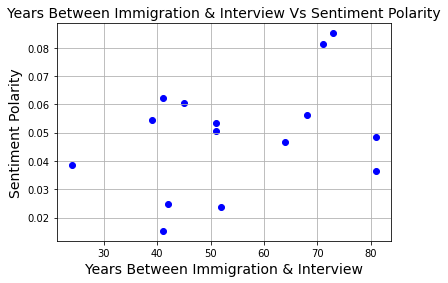

In [ ]:
## Reference
## - https://datatofish.com/multiple-linear-regression-python/

## Create data visualization
import matplotlib.pyplot as plt
plt.scatter(df['yrs_imm2int'], df['polarity'], color ='blue')
plt.title('Years Between Immigration & Interview Vs Sentiment Polarity', fontsize = 14)
plt.xlabel('Years Between Immigration & Interview', fontsize = 14)
plt.ylabel('Sentiment Polarity', fontsize = 14)
plt.grid(True)
plt.show()

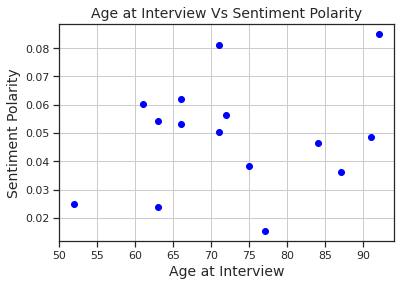

In [ ]:
## Create data visualization
import matplotlib.pyplot as plt
plt.scatter(df['age_int'], df['polarity'], color ='blue')
plt.title('Age at Interview Vs Sentiment Polarity', fontsize = 14)
plt.xlabel('Age at Interview', fontsize = 14)
plt.ylabel('Sentiment Polarity', fontsize = 14)
plt.grid(True)
plt.show()

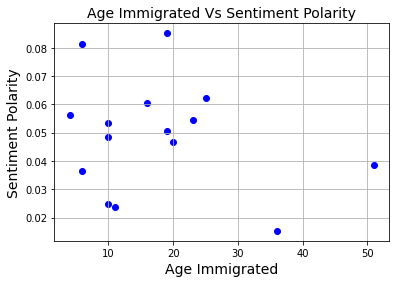

In [ ]:
## Create data visualization
import matplotlib.pyplot as plt
plt.scatter(df['age_imm'], df['polarity'], color ='blue')
plt.title('Age Immigrated Vs Sentiment Polarity', fontsize = 14)
plt.xlabel('Age Immigrated', fontsize = 14)
plt.ylabel('Sentiment Polarity', fontsize = 14)
plt.grid(True)
plt.show()

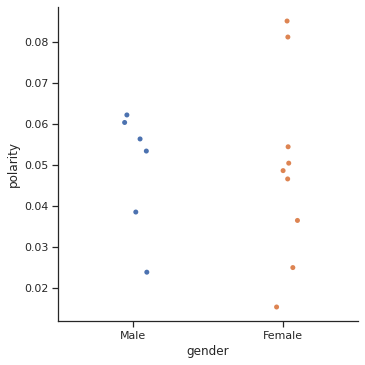

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="gender", y="polarity", data=df)

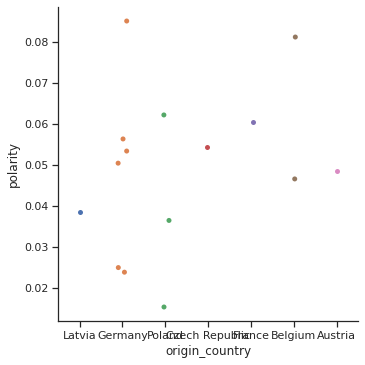

In [ ]:
sns.catplot(x="origin_country", y="polarity", data=df)

# IV. Linear Regression Model

In [ ]:
## Reference
## - SML 310, Professor Jonathan Hanke, Precept 9/26
import numpy as np
from sklearn.linear_model import LinearRegression


# Create Linear Regression Model
## Let's construct the independent and dependent variables
X = df['yrs_imm2int']
Y = df['polarity']


## Performs a split for us of training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## DIAGNOSTICS ON TEST-TRAIN SPLIT
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

## Convert the two feature sets to 2-dimensional numpy objects  
X_train_np = X_train.to_numpy().reshape(-1, 1)
X_test_np = X_test.to_numpy().reshape(-1, 1)

## Make and train a linear model
lm = LinearRegression()
lm.fit(X=X_train_np, y=Y_train)


(12,)
(3,)
(12,)
(3,)


0.14354228653607426

In [ ]:
## Check the coefficient(s) and intercept
print(lm.coef_) ## Very weak correlation coefficient
print(lm.intercept_)

[0.00046508]
0.02673565375365148
<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [ ]:
## Reference
## - https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
## - https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

# Create Multivariable Linear Regression Model
## To include a categorical variable in a regression model, the variable has to be encoded as a binary variable (dummy variable)


# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['gender']= le.fit_transform(df['gender']) 
df['origin_country']= le.fit_transform(df['origin_country'])
df['location_int']= le.fit_transform(df['location_int'])

## Let's construct the independent and dependent variables
X = df[['yrs_imm2int', 'age_imm', 'age_int', 'gender', 'origin_country', 'location_int']]
Y = df['polarity']


## Performs a split for us of training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## DIAGNOSTICS ON TEST-TRAIN SPLIT
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

## Convert the two feature sets to 2-dimensional numpy objects 
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

## Make and train a linear model
lm = LinearRegression()
lm.fit(X=X_train_np, y=Y_train)
lm.score(X=X_train_np, y=Y_train)


(12, 6)
(3, 6)
(12,)
(3,)


0.2225268106134306

In [3]:
df

,id,name,yrs_imm2int,polarity,age_imm,age_int,gender,origin_country,location_int
0,a1,Alfred Berzins,24,0.038455,51,75,Male,Latvia,"NEW YORK CITY, NY"
1,a2,Anne Gasner,42,0.024892,10,52,Female,Germany,"NEW YORK CITY, NY"
2,a3,David Foelich,52,0.023768,11,63,Male,Germany,"NEW YORK CITY, NY"
3,a4,Golda Lasman,41,0.015264,36,77,Female,Poland,"HALLANDALE, FL"
4,a5,Lillian Kaplan,39,0.054390,23,63,Female,Czech Republic,"NEW YORK CITY, NY"
5,a6,Margarethe Suehl,51,0.050388,19,71,Female,Germany,"NEW YORK CITY, NY"
6,a7,Pierre Ferrand,45,0.060322,16,61,Male,France,"NEW YORK CITY, NY"
7,a8,Samuel Woznica,41,0.062160,25,66,Male,Poland,"NEW YORK CITY, NY"
8,a9,Walter Loebenber,51,0.053346,10,66,Male,Germany,"NEW YORK CITY, NY"
9,b1,Person B1,73,0.085098,19,92,Female,Germany,"NEW YORK CITY, NY"


In [ ]:
## Check the coefficient(s) and intercept
print(lm.coef_) ## Still a weak correlation coefficient
print(lm.intercept_)

[ 0.00220077  0.00222285 -0.00171737  0.00064655 -0.00086439  0.        ]
0.017477422272319132
<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


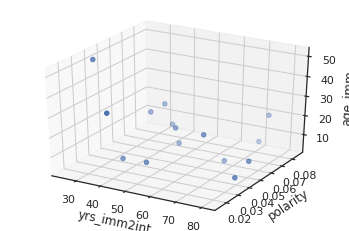

In [ ]:
## 3D Plot Visualization
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['yrs_imm2int'], df['polarity'], df['age_imm'])
threedee.set_xlabel('yrs_imm2int')
threedee.set_ylabel('polarity')
threedee.set_zlabel('age_imm')
plt.show()



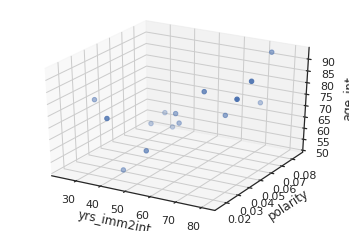

In [ ]:
## 3D Plot Visualization
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['yrs_imm2int'], df['polarity'], df['age_int'])
threedee.set_xlabel('yrs_imm2int')
threedee.set_ylabel('polarity')
threedee.set_zlabel('age_int')
plt.show()